### Capstone  Project
By Mónica Atiaga

Batch - DSNB1222

<h1>SHOE BRAND CAPSTONE PROJECT</h1>


## Phase  3                                                                                30 marks

* Now make only 1 dataframe of 3 csv file using concat/merge /join operation of pandas and start doing EDA .

* Do the complete EDA in details to explore the insights of data and write the detailed observations of each analysis .

## Phase 4                                                                                20 marks

* Write the complete Machine learning code to make predictions of price and star rating. Use appropriate models on their label basis. Remember you need to make 2 different predictions: price and star rating.

* Apply all the best techniques of scaling ,hyperparameter tuning, avoid underfitting or overfitting (bias/variance)

* At the end save the best model and convey on which basis you have chosen that model. 




#### Submission guidelines :

1. You need to submit  only 3 files in Github . Only Github link will be accepted .

2. File 1 :  webscraping phase 1 file

3. File 2 :   SQL Queries phase 2 file

4. File 3 : EDA and Machine Learning  file  .


#### Note:

1. Make one repository on github and send link on last day of submission date.
2. Do not submit direct file in LMS. Only Github link will be accepted.
3. No extension will be provided.
4. Marks criteria will be followed.
5. Plagiarism work/ Use of any AI tool  will not be accepted or cancelled.



In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# Read the CSV files into a DataFrame
df_table1 = pd.read_csv('datasets_final/Table1.csv', index_col=0)
df_table2 = pd.read_csv('datasets_final/Table2.csv', index_col=0)
df_table3 = pd.read_csv('datasets_final/Table3.csv', index_col=0)

### Merge the dataframes

In [3]:
# Concat the dataframes 
df_shoes = pd.concat([df_table1, df_table2, df_table3 ], axis=1)
df_shoes

ShoeName Category  no_colors  price_reduce  \
0                                   NaN    Women        1.0        115.00   
1                      Nike Gamma Force    Women        9.0         72.97   
2     Nike Court Vision Low Next Nature    Women        6.0         60.97   
3                      Nike Air Max 270    Women       12.0        120.97   
4                        Nike Air Max 1    Women        6.0        140.00   
...                                 ...      ...        ...           ...   
4417          Brown Sports Shoe for men      Men        1.0         57.56   
4418        PARIS KHAKI sneaker for men      Men        3.0         35.96   
4419       Dubai Khaki sneakers for men      Men        4.0         44.34   
4420              Navy sneakers for men      Men        2.0         23.72   
4421        Black Slip-on Shoes for men      Men        2.0         16.15   

       price   product_code  count_of_sizes color_1 color_2 color_3 color_4  \
0     115.00     DD1503-101              13   Black     NaN   White     NaN   
1      90.00     DX9176-101              15   Black    Blue   White     Red   
2      80.00     DH3158-107              15   Black    Blue   White     NaN   
3     160.00     DZ7736-002              15   Black    Blue   White     NaN   
4     140.00     DZ2628-102              13   Black    Blue   White     NaN   
...      ...            ...             ...     ...     ...     ...     ...   
4417   95.94  FGC0DY0S0082A               1     NaN     NaN     NaN     NaN   
4418   59.94  FGC0L4033131A               0     NaN    Blue     NaN     NaN   
4419   44.34  FGC0L4037301A               1   Black     NaN     NaN     NaN   
4420   39.54  FGC0Y9032792A               0   Black    Blue     NaN     NaN   
4421   21.54  FGC0Z7041652A               0   Black     NaN     NaN     NaN   

     other_color   product_code  n_reviews  size  comfort  quality  \
0            NaN     DD1503-101      617.0  49.0     78.0    44.66   
1           grey     DX9176-101      147.0  61.0     75.0    50.78   
2           pink     DH3158-107      199.0  59.0     78.0    46.67   
3          green     DZ7736-002        2.0   NaN      NaN      NaN   
4           grey     DZ2628-102       70.0  43.0     78.0    54.62   
...          ...            ...        ...   ...      ...      ...   
4417       brown  FGC0DY0S0082A        NaN   NaN      NaN      NaN   
4418       brown  FGC0L4033131A        NaN   NaN      NaN      NaN   
4419       green  FGC0L4037301A        NaN   NaN      NaN      NaN   
4420         NaN  FGC0Y9032792A        NaN   NaN      NaN      NaN   
4421        grey  FGC0Z7041652A        NaN   NaN      NaN      NaN   

      star_rating   product_code  
0             4.8     DD1503-101  
1             4.5     DX9176-101  
2             4.6     DH3158-107  
3             5.0     DZ7736-002  
4             4.6     DZ2628-102  
...           ...            ...  
4417          NaN  FGC0DY0S0082A  
4418          NaN  FGC0L4033131A  
4419          NaN  FGC0L4037301A  
4420          NaN  FGC0Y9032792A  
4421          NaN  FGC0Z7041652A  

[4422 rows x 19 columns]

In [4]:
df_shoes.columns

Index(['ShoeName', 'Category', 'no_colors', 'price_reduce', 'price',
       'product_code', 'count_of_sizes', 'color_1', 'color_2', 'color_3',
       'color_4', 'other_color', 'product_code', 'n_reviews', 'size',
       'comfort', 'quality', 'star_rating', 'product_code'],
      dtype='object')

In [5]:
# Set the columns names product_code to differenciate them
df_shoes.columns = ['ShoeName', 'Category', 'no_colors', 'price_reduce', 'price',
       'product_code', 'count_of_sizes', 'color_1', 'color_2', 'color_3',
       'color_4', 'other_color', 'product_code2', 'n_reviews', 'size',
       'comfort', 'quality', 'star_rating', 'product_code3']

In [6]:
# looking for differences in the data
df_shoes[~(df_shoes['product_code'].isna()) & ((df_shoes['product_code'] != df_shoes['product_code2']) | (df_shoes['product_code'] != df_shoes['product_code3']))]

Empty DataFrame
Columns: [ShoeName, Category, no_colors, price_reduce, price, product_code, count_of_sizes, color_1, color_2, color_3, color_4, other_color, product_code2, n_reviews, size, comfort, quality, star_rating, product_code3]
Index: []

The product_code matches in all three concatenated tables. Table1, Table2, and Table3 were concat into one dataset.

In [7]:
# Drop the repeated columns
df_shoes.drop(['product_code2', 'product_code3'], axis=1, inplace=True)

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [8]:
df = df_shoes.copy()

In [9]:
df.head()

ShoeName Category  no_colors  price_reduce  price  \
0                                NaN    Women        1.0        115.00  115.0   
1                   Nike Gamma Force    Women        9.0         72.97   90.0   
2  Nike Court Vision Low Next Nature    Women        6.0         60.97   80.0   
3                   Nike Air Max 270    Women       12.0        120.97  160.0   
4                     Nike Air Max 1    Women        6.0        140.00  140.0   

  product_code  count_of_sizes color_1 color_2 color_3 color_4 other_color  \
0   DD1503-101              13   Black     NaN   White     NaN         NaN   
1   DX9176-101              15   Black    Blue   White     Red        grey   
2   DH3158-107              15   Black    Blue   White     NaN        pink   
3   DZ7736-002              15   Black    Blue   White     NaN       green   
4   DZ2628-102              13   Black    Blue   White     NaN        grey   

   n_reviews  size  comfort  quality  star_rating  
0      617.0  49.0     78.0    44.66          4.8  
1      147.0  61.0     75.0    50.78          4.5  
2      199.0  59.0     78.0    46.67          4.6  
3        2.0   NaN      NaN      NaN          5.0  
4       70.0  43.0     78.0    54.62          4.6

In [10]:
df.tail()

ShoeName Category  no_colors  price_reduce  price  \
4417     Brown Sports Shoe for men      Men        1.0         57.56  95.94   
4418   PARIS KHAKI sneaker for men      Men        3.0         35.96  59.94   
4419  Dubai Khaki sneakers for men      Men        4.0         44.34  44.34   
4420         Navy sneakers for men      Men        2.0         23.72  39.54   
4421   Black Slip-on Shoes for men      Men        2.0         16.15  21.54   

       product_code  count_of_sizes color_1 color_2 color_3 color_4  \
4417  FGC0DY0S0082A               1     NaN     NaN     NaN     NaN   
4418  FGC0L4033131A               0     NaN    Blue     NaN     NaN   
4419  FGC0L4037301A               1   Black     NaN     NaN     NaN   
4420  FGC0Y9032792A               0   Black    Blue     NaN     NaN   
4421  FGC0Z7041652A               0   Black     NaN     NaN     NaN   

     other_color  n_reviews  size  comfort  quality  star_rating  
4417       brown        NaN   NaN      NaN      NaN          NaN  
4418       brown        NaN   NaN      NaN      NaN          NaN  
4419       green        NaN   NaN      NaN      NaN          NaN  
4420         NaN        NaN   NaN      NaN      NaN          NaN  
4421        grey        NaN   NaN      NaN      NaN          NaN

In [11]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (4422, 17)

The column headers in the dataset: Index(['ShoeName', 'Category', 'no_colors', 'price_reduce', 'price',
       'product_code', 'count_of_sizes', 'color_1', 'color_2', 'color_3',
       'color_4', 'other_color', 'n_reviews', 'size', 'comfort', 'quality',
       'star_rating'],
      dtype='object')


In [12]:
print(f"Number of Unique values in 'price': {df.price.nunique()}")
print(f"Number of Unique values in 'price_reduce': {df.price_reduce.nunique()}")
print(f"Number of Unique values in 'star_rating': {df.star_rating.nunique()}")

Number of Unique values in 'price': 95
Number of Unique values in 'price_reduce': 376
Number of Unique values in 'star_rating': 32


This dataset comprises 4,422 rows and 17 columns. Among these, the variables 'price'/'price_reduce' and 'star_rating' are designated as targets for distinct analytical approaches. The remaining 15 variables serve as independent variables, as outlined in Phase 01 of the Capstone Project and below.

We aim to analyze 'price'/'price_reduce' and 'star_rating' as regression problems during the Exploratory Data Analysis (EDA) phase. 

#### Description of the columns

- ShoeName: Represent the name of the shoe
- Category: Represen if the shoe belongs to the men's or Women's category, but some brands have a more detailed category. e.g. "Men's Football" or "Women Basketball"
- no_colors: number of colors in total available, could be more than the 5 colors specified in the data gathered as was specified
- price_reduce: shoe price with a discount applied, could considered the real price at the moment
- price: regular shoe price
- product_code: style or product code to identify the shoe
- count_of_sizes: number of sizes available 
- color_1: represent if the shoe is available in "Black" color
- color_2: represent if the shoe is available in a "Blue" color
- color_3: represent if the shoe is available in "White" color
- color_4: represent if the shoe is available in "Red" color
- ohter_color: other representative colors available for the shoe. e.g. "Green", "Yellow", "Gold", "Pink", etc.
- n_reviews: number of reviews 
- size:  metric to evaluate how fits the shoe and is given in percentage
- comfort:  metric to evaluate how comfortable the shoe is and is given in percentage
- quality:  metric to evaluate durability /quality/performance of the shoe and is given in percentage
- star_rating: metric from 0 to 5 


In [13]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4422 entries, 0 to 4421
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ShoeName        4421 non-null   object 
 1   Category        4422 non-null   object 
 2   no_colors       4205 non-null   float64
 3   price_reduce    4406 non-null   float64
 4   price           4406 non-null   float64
 5   product_code    4334 non-null   object 
 6   count_of_sizes  4422 non-null   int64  
 7   color_1         3300 non-null   object 
 8   color_2         1829 non-null   object 
 9   color_3         3389 non-null   object 
 10  color_4         1547 non-null   object 
 11  other_color     2995 non-null   object 
 12  n_reviews       3895 non-null   float64
 13  size            2916 non-null   float64
 14  comfort         2954 non-null   float64
 15  quality         3339 non-null   float64
 16  star_rating     3895 non-null   float64
dtypes: float64(8), int64(1), object(8

There are three types of data (float64, int64, and object ) present in the dataset, which corresponding features according to the data type will be listed as follows:

In [14]:
# List object variables
object_vars = df.select_dtypes(include='object').columns.tolist()
print(f"Object/Categorical variables:\n{object_vars}\n{len(object_vars)} in total\n")

# List int64 variables
int_vars = df.select_dtypes(include='int64').columns.tolist()
print(f"int64 variables:\n{int_vars}\n{len(int_vars)} in total\n")

# List float64 variables
float_vars = df.select_dtypes(include='float64').columns.tolist()
print(f"float64 variables:\n{float_vars}\n{len(float_vars)} in total\n")

Object/Categorical variables:
['ShoeName', 'Category', 'product_code', 'color_1', 'color_2', 'color_3', 'color_4', 'other_color']
8 in total

int64 variables:
['count_of_sizes']
1 in total

float64 variables:
['no_colors', 'price_reduce', 'price', 'n_reviews', 'size', 'comfort', 'quality', 'star_rating']
8 in total



## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [15]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
ShoeName                  1          0.02
Category                  0          0.00
no_colors               217          4.91
price_reduce             16          0.36
price                    16          0.36
product_code             88          1.99
count_of_sizes            0          0.00
color_1                1122         25.37
color_2                2593         58.64
color_3                1033         23.36
color_4                2875         65.02
other_color            1427         32.27
n_reviews               527         11.92
size                   1506         34.06
comfort                1468         33.20
quality                1083         24.49
star_rating             527         11.92

In [16]:
print(f"The dataset presents {df.isnull().sum().sum()} missing values.")

The dataset presents 14499 missing values.


Some columns present null values, so it is important to make a deep analysis to determine how to treat each column.
- The color columns have the highest percentage of null values, for example, column color_4(red) and color_2(blue) have 65.02% and 58.64% null values respectively. However, these columns (color_1, color_2, color_3, and color_4) represent the absence or presence of a determined color as an option, so these are 0/1 columns to represent whether the shoe is available or not in a specific color. Then, if the value is null will be considered 0 which means that color is not available.
- The other_color column, which has 32.27% null values, has assorted colors available for the shoe, so could be imputed with the data in the other color columns.
- The missing values in no_colors could be imputed from the data in color columns. As well, the missing values in n_reviews, size, comfort, quality, and star_rating could be imputed with the mean.
- the product_code column will be analyzed with other columns with missing values, if a row has more than 50% missing values perhaps is better to drop it.

The aim of the project is to build a model to predict the price and the star rating based on the data gathered from differents sites like Nike, Adidas, Puma, and WoodLand. Therefore, the null values in this columns will be treated specially.

### 1.2.2 Heatmap with missing values

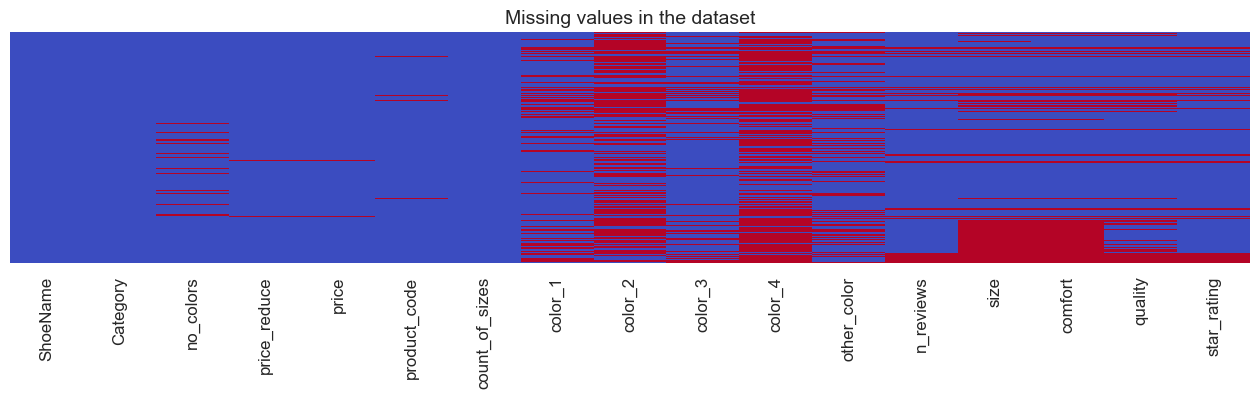

In [17]:
# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.1)  
sns.set_palette('vlag')
plt.figure(figsize=(16,3))

# Let's visualize it using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm', cbar=False)
plt.title('Missing values in the dataset', fontsize=14);

### 1.2.3 Correcting no_colors
We will use the data in columns color_1, color_2, color_3, color_4, and other_color to fill the null values of no_colors since this column represents the number of available colors per shoe. Perhaps, during the web scraping process, this info could not be gathered.

In [18]:
# Counts non-null values in row, color columns
def count_colors(row):
    val = np.sum(~row.isna())
    return (val if val!=0 else None)

# If the value is nan then calculates the number of colors present in the colors columns
df['no_colors'] = df.apply(lambda row: row['no_colors'] if pd.notna(row['no_colors']) else count_colors(row[['color_1', 'color_2', 'color_3', 'color_4', 'other_color']]), axis=1)

In [19]:
print(f" After correcting n_colors we still have {df['no_colors'].isna().sum()} records with missing values.")

 After correcting n_colors we still have 13 records with missing values.


### 1.2.4 Rows with no info

In [20]:
# Calculate the number of missing values by row
df['missing_by_row'] = df.isna().sum(axis=1)

# Show the records according with the missing values by row
df['missing_by_row'].value_counts().to_frame().sort_index(ascending=False)

missing_by_row
11              62
10             144
9               60
8              146
7              206
6              316
5              319
4              310
3              650
2              820
1              702
0              687

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. 

There are two groups with 10 and 11 null values corresponding to 144 and 62 rows, 206 in total that represents 4.66% of the data. Then, we will set the threshold as 10 and drop these 206 rows.

In [21]:
df[df['missing_by_row'] >= 10].isnull().sum().to_frame("Null values")

Null values
ShoeName                  0
Category                  0
no_colors                 0
price_reduce              0
price                     0
product_code             62
count_of_sizes            0
color_1                 206
color_2                 206
color_3                 206
color_4                 206
other_color             206
n_reviews               206
size                    206
comfort                 206
quality                 206
star_rating             206
missing_by_row            0

The rows to drop have null values in columns: product_code, color_1, color_2, color_3, color_4, other_color, n_reviews, size, comfort, quality, and star_rating.

We will set the threshold as 10 and drop all the rows with 10 or more null values.

In [22]:
# Drop the rows with 10 or more missing values per row.
threshold = 10
df = df[df['missing_by_row'] < threshold]

# Drop column missing_by_row
df.drop('missing_by_row', axis=1, inplace=True)

print(f"The new dimension of the dataset is {df.shape}")

The new dimension of the dataset is (4216, 17)


####  Check for missing values

In [23]:
df.isnull().sum().sum()

12173

The rest of the missing values will be treated in further sections, but first, we will do EDA.

## 1.3 Features Analysis
### 1.3.1 Unique values

In [24]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values

# List of categorical variables
display(info_df[(info_df['type'] == 'object')])
display(info_df[(info_df['type'] != 'object')])


No. of unique values    type
ShoeName                      2225  object
Category                        70  object
product_code                  3577  object
color_1                          1  object
color_2                          1  object
color_3                          1  object
color_4                          1  object
other_color                     18  object

No. of unique values     type
no_colors                         27  float64
price_reduce                     374  float64
price                             94  float64
count_of_sizes                    28    int64
n_reviews                        490  float64
size                             636  float64
comfort                          650  float64
quality                         1209  float64
star_rating                       32  float64

In [25]:
df['ShoeName'].value_counts()

NMD_R1 Shoes                                59
Avryn Shoes                                 40
Ultraboost Light Running Shoes              39
Superstar Shoes                             31
X_PLRBOOST Shoes                            24
                                            ..
Nike Offcourt (NFL Detroit Lions)            1
Nike Offcourt (NFL Los Angeles Rams)         1
Nike Offcourt (NFL Seattle Seahawks)         1
Nike Offcourt (NFL Tampa Bay Buccaneers)     1
Black Slip-on Shoes for men                  1
Name: ShoeName, Length: 2225, dtype: int64

Regarding the dataset's unique values:

- The 'product_code' column exhibits high cardinality with 3,577 unique values among the 4,422 rows, making up roughly 80.9% of the data. While it may not significantly contribute to the model, it will be utilized for imputing some missing values. However, it is advisable to consider dropping this feature post imputation to streamline the dataset.

- The 'ShoeName' column also presents high cardinality, featuring 2,225 unique values out of 4,422 records, more than 50%. An examination of unique values reveals instances where multiple shoes share the same name. Further analysis is warranted to determine if encoding based on characteristics is applicable.

- The columns 'color_1', 'color_2', 'color_3', and 'color_4' contain only a single unique value each, representing specific colors. These will be transformed into binary columns (0/1).

- The project specification doesn't specify whether the Price considered for the prediction model should be the entire price or the reduced price. During Phase 01 when data was collected, both prices were fetched since the reduced price could be considered the actual or final price.

**'price'/'price_reduce' - Regression Problem:** 'price' is the target variable with 94 unique values among the 4,422 total dataset entries. This suggests a regression problem, given that the target variable is continuous and numerical.

**'star_rating' - Regression Problem:** 'star_rating' is another target variable with 32 unique values among the 4,422 total dataset entries. Given the substantial number of unique values, 32 in this case, we will also treat this as a regression problem.

#### 1.3.1.1 Price and Price_reduce unique values

In [26]:
# Inspect the unique values of the target variable
column = 'price'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}\n")
print(f"Unique values: {sorted(df[column].unique())}")

Feature price:
140.00    374
110.00    328
160.00    274
100.00    254
120.00    254
         ... 
51.54       1
63.00       1
119.94      1
58.74       1
21.54       1
Name: price, Length: 95, dtype: int64

Unique values: [21.54, 23.94, 25.0, 25.14, 26.0, 26.34, 27.54, 28.0, 28.74, 29.94, 30.0, 31.14, 32.34, 33.54, 34.74, 35.0, 35.94, 39.54, 40.0, 43.14, 44.34, 45.0, 45.54, 47.94, 50.0, 51.54, 53.94, 55.0, 58.74, 59.94, 60.0, 63.0, 63.54, 65.0, 65.94, 70.0, 71.94, 75.0, 75.54, 77.94, 80.0, 83.94, 85.0, 89.94, 90.0, 95.0, 95.94, 100.0, 101.94, 105.0, 107.94, 110.0, 115.0, 119.94, 120.0, 125.0, 130.0, 131.94, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 167.94, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 220.0, 225.0, 230.0, 240.0, 250.0, 260.0, 270.0, 275.0, 280.0, 285.0, 295.0, 300.0, 305.0, 320.0, 400.0, nan, 330.0, 350.0, 450.0, 600.0]


In [27]:
# Inspect the unique values of the target variable
column = 'price_reduce'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}\n")

Feature price_reduce:
90.00     123
120.00    121
140.00    113
56.00      94
80.00      86
         ... 
84.99       1
73.00       1
47.00       1
111.00      1
16.15       1
Name: price_reduce, Length: 375, dtype: int64



The target variables 'price' and 'price_reduce' has 95 and 375 unique values of the 4,422 rows in the dataset. In order to predict this feature we need to build a regression model.

#### 1.3.1.2 Star rating unique values

In [28]:
# Inspect the unique values of the target variable
column = 'star_rating'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {df[column].unique()}")
print(f"# unique values: {df[column].nunique()}")

Feature star_rating:
4.6    503
4.7    503
4.5    439
5.0    403
0.0    390
4.4    345
4.8    332
4.3    217
4.0    149
4.2    145
4.9    126
4.1     70
3.0     53
3.9     36
3.8     36
3.5     32
3.7     29
3.3     15
3.6     15
1.0     14
2.0     11
3.4      8
3.1      7
2.5      4
3.2      3
2.3      3
1.9      2
2.7      1
2.6      1
2.8      1
1.8      1
1.6      1
Name: star_rating, dtype: int64
Unique values: [4.8 4.5 4.6 5.  4.7 4.4 0.  1.  4.  4.3 4.1 3.5 3.9 4.9 3.3 3.  nan 4.2
 3.8 3.6 3.7 2.7 2.  3.2 2.5 3.4 2.6 2.8 1.8 3.1 2.3 1.6 1.9]
# unique values: 32


The target variable 'star_rating' has 32 unique values of the 4422 rows in the dataset. In order to predict this feature we will build a regression model.

#### 1.3.1.3 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [35]:
# Separating Numerical and Categorical columns
categorical_col =  df.select_dtypes(include='object').columns.tolist()
numerical_col =  df.select_dtypes(include=np.number).columns.tolist()

# Remove the target variables since they will be analyzed separately
numerical_col.remove('price')
numerical_col.remove('price_reduce')
numerical_col.remove('star_rating')

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['ShoeName', 'Category', 'product_code', 'color_1', 'color_2', 'color_3', 'color_4', 'other_color']

Numerical Columns:
 ['no_colors', 'count_of_sizes', 'n_reviews', 'size', 'comfort', 'quality']



#### Categorical columns

In [36]:
for i, column in enumerate(categorical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature ShoeName:
NMD_R1 Shoes                                59
Avryn Shoes                                 40
Ultraboost Light Running Shoes              39
Superstar Shoes                             31
Superstar XLG Shoes                         24
                                            ..
Nike Offcourt (NFL Detroit Lions)            1
Nike Offcourt (NFL Los Angeles Rams)         1
Nike Offcourt (NFL Seattle Seahawks)         1
Nike Offcourt (NFL Tampa Bay Buccaneers)     1
Black Slip-on Shoes for men                  1
Name: ShoeName, Length: 2226, dtype: int64
# unique values: 2225

2.Feature Category:
Men                                 1417
Women                                861
Men's Originals                      309
Women's Originals                    172
Women's Running                      104
                                    ... 
Men's Y-3                              1
Women's HIIT                           1
Men's adidas by Stella McCartney       1
Men's Tr

#### Numerical columns

In [37]:
for i, column in enumerate(numerical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature no_colors:
2.0     1079
1.0     1019
3.0      579
4.0      351
5.0      254
6.0      197
7.0      154
8.0       88
9.0       68
10.0      57
11.0      49
22.0      40
17.0      39
12.0      36
50.0      30
18.0      27
45.0      23
14.0      22
13.0      20
15.0      17
NaN       13
34.0      13
16.0      10
39.0      10
28.0       8
24.0       5
23.0       4
19.0       4
Name: no_colors, dtype: int64
# unique values: 27

2.Feature count_of_sizes:
0     431
12    323
1     311
13    307
2     261
15    244
10    234
3     220
17    217
6     197
4     189
11    163
5     148
7     128
9     120
16    119
8     117
14    115
19    107
18     91
20     53
21     35
22     35
23     23
25     12
26      7
24      7
27      2
Name: count_of_sizes, dtype: int64
# unique values: 28

3.Feature n_reviews:
0.0       390
NaN       321
1.0       244
2.0       160
3.0       125
         ... 
329.0       1
2540.0      1
228.0       1
390.0       1
702.0       1
Name: n_reviews, Length: 49

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [38]:
# Summary statistics of numerical columns
stats = df.describe()
stats

no_colors  price_reduce        price  count_of_sizes     n_reviews  \
count  4203.000000   4200.000000  4200.000000     4216.000000   3895.000000   
mean      4.662384     96.501731   130.832981        8.874526    357.563543   
std       6.754693     49.207574    57.874860        6.393588   1291.539132   
min       1.000000     12.000000    21.540000        0.000000      0.000000   
25%       2.000000     61.160000    90.000000        3.000000      4.000000   
50%       3.000000     88.000000   120.000000        9.000000     30.000000   
75%       5.000000    120.000000   160.000000       14.000000    172.000000   
max      50.000000    450.000000   600.000000       27.000000  11565.000000   

              size      comfort    quality  star_rating  
count  2916.000000  2954.000000  3339.0000  3895.000000  
mean     49.611717    82.099804        inf     4.032914  
std       9.151360    11.545312        NaN     1.421609  
min      10.000000     0.000000     0.0000     0.000000  
25%      47.000000    76.617000    61.8200     4.200000  
50%      50.000000    82.758600    83.3300     4.500000  
75%      52.941200    88.194400    89.2287     4.700000  
max     100.000000   100.000000        inf     5.000000

In [39]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

ShoeName Category product_code color_1 color_2 color_3 color_4  \
count           4215     4216         4190    3300    1829    3389    1547   
unique          2225       70         3577       1       1       1       1   
top     NMD_R1 Shoes      Men       ID4122   Black    Blue   White     Red   
freq              59     1417            3    3300    1829    3389    1547   

       other_color  
count         2995  
unique          18  
top           grey  
freq          1774

**Observations**
- The dataset contains null values, and the column 'quality' must be reviewed because it has inf values.

Next, we will analyze the skewness present in the columns, and infer the present of outliers.

In [40]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

quality                  inf
n_reviews         327.563543
price              10.832981
price_reduce        8.501731
no_colors           1.662384
count_of_sizes     -0.125474
size               -0.388283
star_rating        -0.467086
comfort            -0.658796
dtype: float64

The mean value is larger than the median(50%) in columns 'quality', 'n_reviews', 'price', 'price_reduce', and 'no_colors' columns. Therefore, the data could be skewed to the right.  

In the columns 'count_of_sizes', 'size', 'star_rating', and 'comfort' the median(50%) is larger than the mean, then the data could be skewed to the left.

In [41]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

n_reviews         8624.358193
price              353.417300
price_reduce       255.083122
size                32.085563
no_colors           31.828230
count_of_sizes       5.338299
star_rating         -1.876131
comfort             -5.190428
quality                   NaN
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features 'n_reviews', 'price', and 'price_reduce' columns listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [42]:
# Searching for duplicated values
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 29 duplicate rows, which represent 0.688% of the data.


The dataset have duplicate values.

In [43]:
# Drop duplicated rows 
df.drop_duplicates(inplace=True)

# checking the new dimension of the dataset
print(f"After dropping duplicates, the rows and columns in the dataset: {df.shape}")
print(f"Now, There are {df.duplicated().sum()} duplicates in the dataset.")

After dropping duplicates, the rows and columns in the dataset: (4187, 17)
Now, There are 0 duplicates in the dataset.


Now the dataset has 4187 rows and 17 columns.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Price / Price_-reduce feature

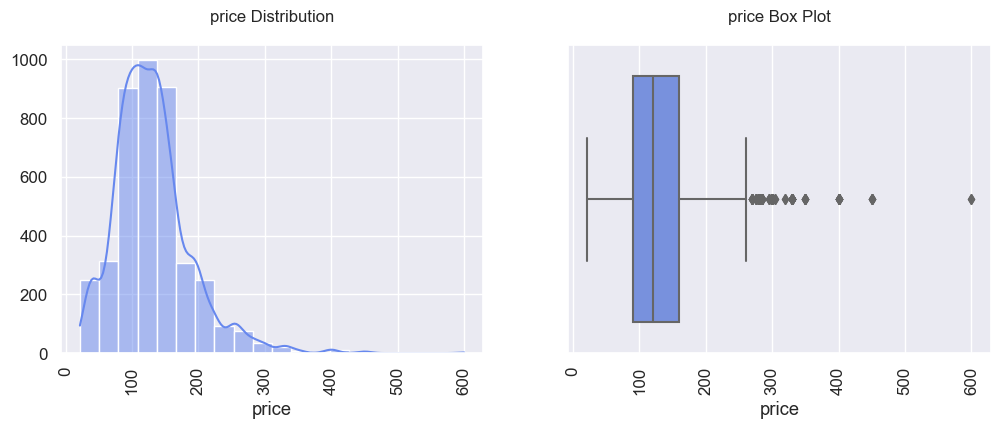

Skewness of price : 1.3934063070306926


In [44]:
#Visualize target distribution
col = 'price'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'price' is skewed to the right and presents outliers in the Box plot.

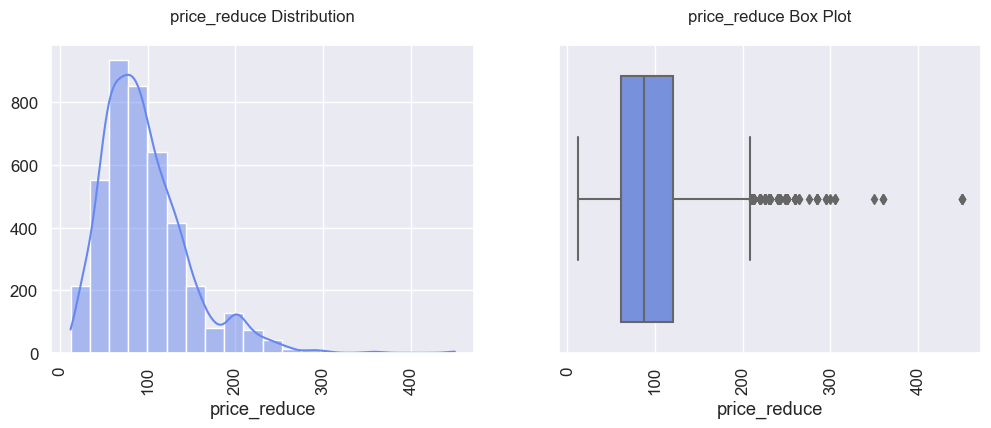

Skewness of price_reduce : 1.4294089405513029


In [45]:
#Visualize target distribution
col = 'price_reduce'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'price_reduce' is skewed to the right and presents outliers in the Box plot.

#### 1.4.1.2 Star rating feature

In [46]:
def show_percentage(ax, total, fontsize=10):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f}%"
        x = p.get_x() + p.get_width() / 2 + 0.04
        y = p.get_height()
        ax.annotate(percentage, (x , y + 20), fontsize=fontsize, ha='center')

In [47]:
# Distribution of target
df['star_rating'].value_counts().to_frame()

star_rating
4.6          497
4.7          497
4.5          437
5.0          400
0.0          390
4.4          341
4.8          329
4.3          216
4.0          149
4.2          144
4.9          126
4.1           69
3.0           53
3.9           36
3.8           36
3.5           32
3.7           28
3.6           15
3.3           14
1.0           14
2.0           11
3.4            8
3.1            7
2.5            4
3.2            3
2.3            3
1.9            2
2.7            1
2.6            1
2.8            1
1.8            1
1.6            1

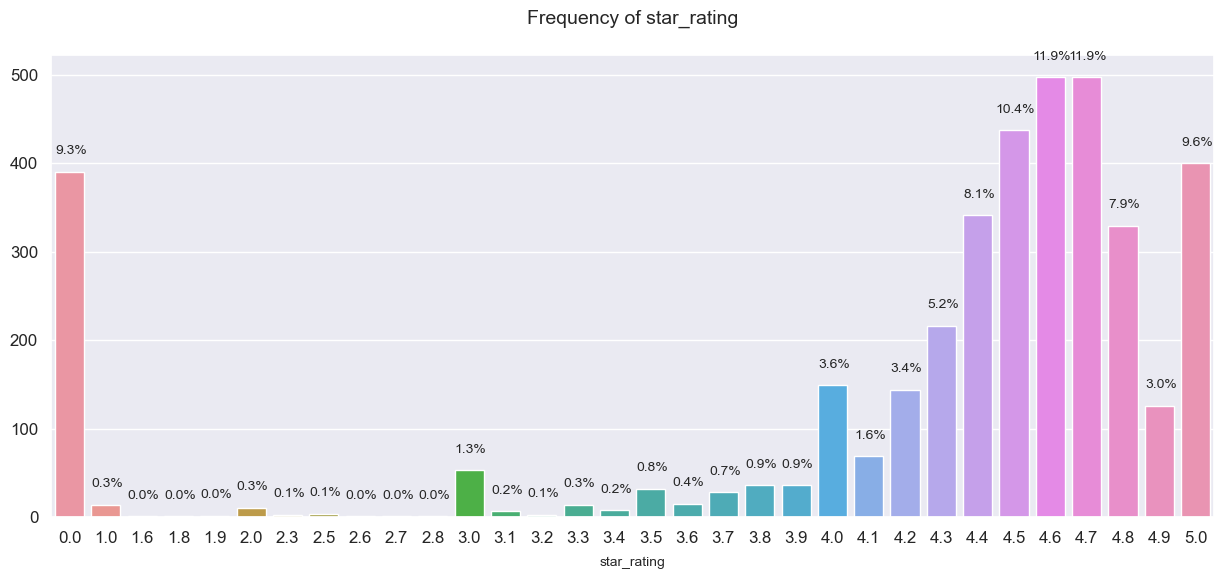

In [48]:
# Set the custom palette
sns.set_palette('vlag')

# Visualize the frequency of star_rating
col = 'star_rating'
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Out of the total dataset, almost 500 entries (11.9%) fall within star_rating 4.6 and 4.7, followed by 437 entries (10.4%) in star_rating 4.5, 400 entries (9.5%) in star_rating 5.0, and 390 entries (9.3%) in star_rating 0.0.  

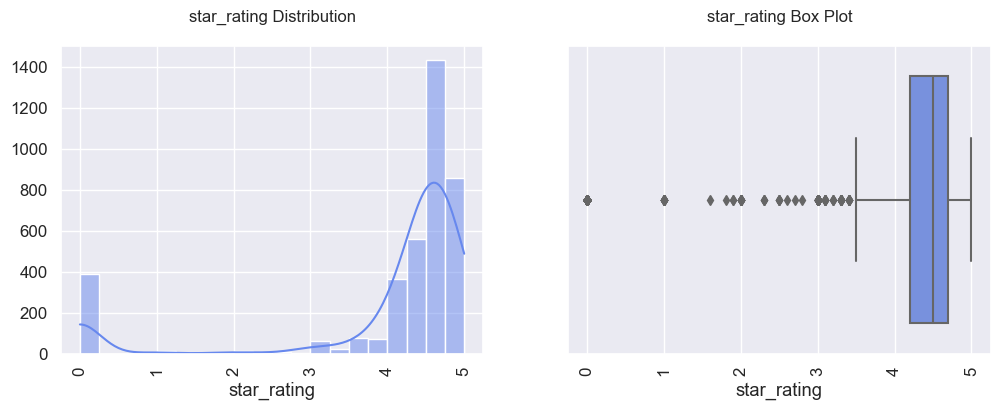

Skewness of star_rating : -2.2537438573929096


In [49]:
#Visualize target distribution
col = 'star_rating'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'star_rating' is skewed to the left and presents outliers in the Box plot.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [50]:
# List of categorical columns that look like categories
for i,col in enumerate(categorical_col):
    print(f"{i+1}. {col}:   {df[col].nunique()} unique values")

1. ShoeName:   2225 unique values
2. Category:   70 unique values
3. product_code:   3577 unique values
4. color_1:   1 unique values
5. color_2:   1 unique values
6. color_3:   1 unique values
7. color_4:   1 unique values
8. other_color:   18 unique values


The columns 'ShoeName'**(1)**, 'product_code'**(3)** exhibit high cardinality issues, despite being categorical variables. Consequently, these features will be adjusted in data visualizations. 

#### ShoeName (1)

This column exhibits high cardinality. To address this, we plan to visualize the counts for the top 25 most representative cities and list the counts for the remaining 131 cities. This approach aims to provide a concise representation of the data while highlighting the prevalence of the most frequent cities.

NMD_R1 Shoes                                     58
Avryn Shoes                                      39
Ultraboost Light Running Shoes                   38
Superstar Shoes                                  31
Superstar XLG Shoes                              24
X_PLRBOOST Shoes                                 24
Ultraboost 1.0 Shoes                             22
Adilette Comfort Slides                          21
OZWEEGO Shoes                                    20
NMD_V3 Shoes                                     20
Nike Air Force 1 '07                             18
Stan Smith Shoes                                 18
Hyperturf Adventure Shoes                        17
Predator Accuracy.1 Firm Ground Soccer Cleats    16
Adizero SL Running Shoes                         15
4DFWD 2 Running Shoes                            13
Pureboost 22 Running Shoes                       12
Five Ten Freerider Pro Mountain Bike Shoes       12
NMD_S1 Shoes                                     12
Nike Phantom

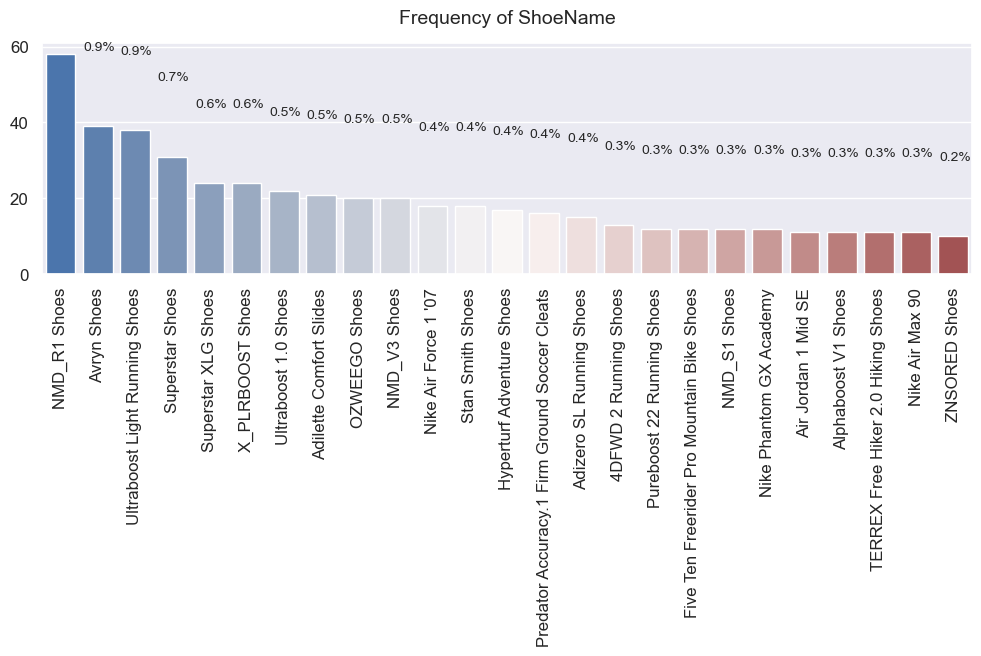

In [51]:
# Visualize the frequency of ShoeName(1)
col = 'ShoeName'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
display(df_counts[:25])
ax = sns.barplot(x=df_counts[:25].index, y=df_counts[:25].values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

In [52]:
# List the rest of the Shoe Names.
display(df_counts[25:])

Barricade Tennis Shoes                          10
Ultra 4D Running Shoes                          10
Adilette Shower Slides                          10
Racer TR23 Shoes                                10
The Velosamba Made with Nature Cycling Shoes    10
                                                ..
Nike Offcourt (NFL Las Vegas Raiders)            1
Nike Offcourt (NFL Detroit Lions)                1
Nike Offcourt (NFL Los Angeles Rams)             1
Nike Offcourt (NFL Seattle Seahawks)             1
Black Slip-on Shoes for men                      1
Name: ShoeName, Length: 2200, dtype: int64

The dataset comprises observations for 2225 names.

#### Category (2)
This feature exhibits a high cardinality too. Therefore, we will generalize into two principal categories: Men and Women.

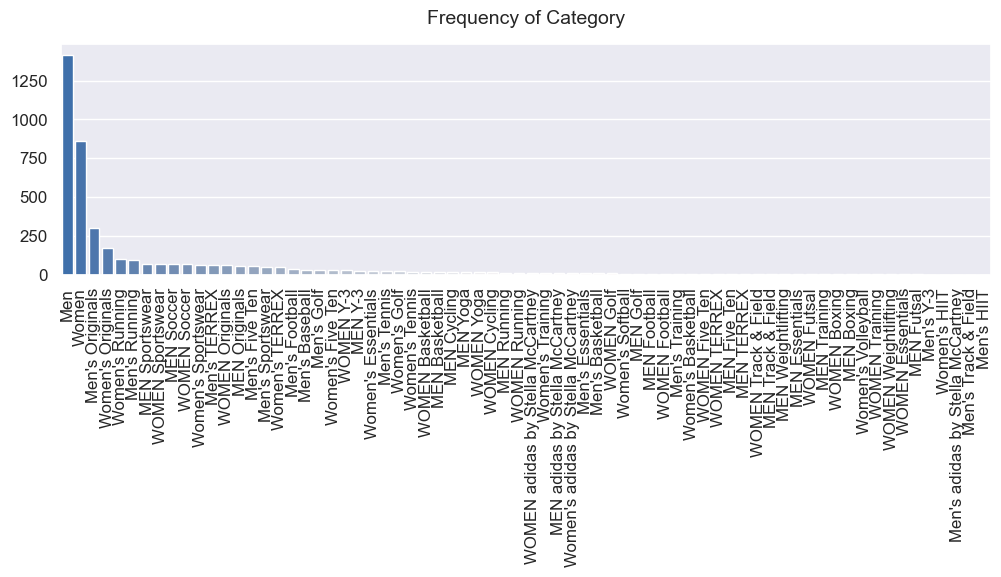

In [53]:
# Visualize the frequency of Category(2)
col = 'Category'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')

plt.xticks(rotation=90)
plt.xlabel('', size=6, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Observationally, the presence of Men's categories seems to outweigh that of Women's categories. To facilitate a more streamlined analysis, we intend to preprocess the 'Category' column, consolidating it into a broader classification with two distinct values: Men and Women.

In [54]:
# Regular Expression 'Men' or 'Women'
pattern = re.compile(r'Men|Women', flags=re.IGNORECASE)

def get_general_category(category):
    match = re.search(pattern, category)
    if match:
        return match.group(0).upper()
    else:
        return 'Other'

df['Category_gral'] = df['Category'].apply(get_general_category)    
df.sample(5)

ShoeName         Category  \
1539                     Nike Pegasus 40 (Oregon State)              Men   
406                           Nike Alpha Huarache 8 Pro            Women   
4085  KING PRO FG/AG Men's Soccer CleatsPersian Blue...              Men   
3788  Suede Classic Selflove Women's SneakersAsh Gra...            Women   
1810                       ULTRABOOST 22  Running Shoes  Women's Running   

      no_colors  price_reduce  price product_code  count_of_sizes color_1  \
1539        1.0         98.97  140.0   DZ5954-100              21   Black   
406         2.0         85.97  100.0   CW4439-011               0   Black   
4085        3.0        100.00  100.0    107566_02              16   Black   
3788        2.0         44.99   80.0    393031_02              12     NaN   
1810       10.0         95.00  190.0       GX6670              14   Black   

     color_2 color_3 color_4 other_color  n_reviews      size   comfort  \
1539     NaN   White     NaN      orange        0.0       NaN       NaN   
406      NaN     NaN     NaN        grey       30.0  100.0000  100.0000   
4085    Blue   White     NaN       green        2.0       NaN       NaN   
3788     NaN   White     NaN         NaN        0.0       NaN       NaN   
1810     NaN   White     Red        grey     1586.0   50.5549   89.0932   

       quality  star_rating Category_gral  
1539       NaN          0.0           MEN  
406   100.0000          4.6         WOMEN  
4085   50.0000          4.5           MEN  
3788       NaN          0.0         WOMEN  
1810   91.9294          4.7         WOMEN

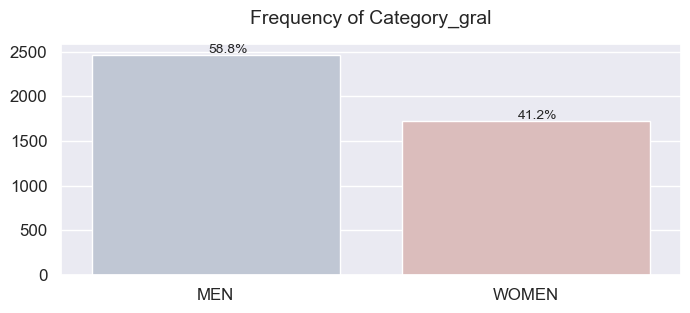

In [55]:
# Visualize the frequency of Category_-gral
col = 'Category_gral'
plt.figure(figsize=(8, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=6, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Of the total shoes in the dataset, 58.8% belong to the Men's category, while the remaining 41.2% fall under the Women's category.

#### product_code (3)
This column presents challenges associated with high cardinality, even though it is a categorical variable. Therefore, we will abstain from conducting data visualizations on it.

#### Color 1 - Black (4)

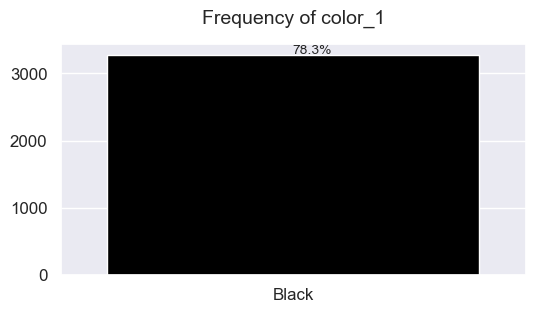

In [56]:
# Visualize the frequency of Has Table Color_1(4)
col = 'color_1'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='black')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color black is available for 78.3% of the shoes, while the remaining models do not offer this color option.

1. ShoeName:   2225 unique values
2. Category:   70 unique values
3. product_code:   3577 unique values
4. color_1:   1 unique values
5. color_2:   1 unique values
6. color_3:   1 unique values
7. color_4:   1 unique values
8. other_color:   18 unique values

#### Color_2 - Blue (5)

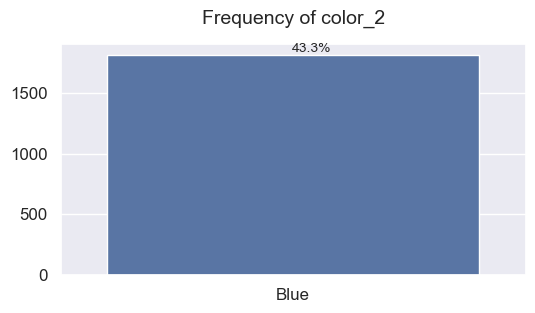

In [57]:
# Visualize the frequency of Has Table Color_2(5)
col = 'color_2'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='b')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color blue is available for 43.3% of the shoes, while the remaining models do not offer this color option.

#### Color 3 - White (6)

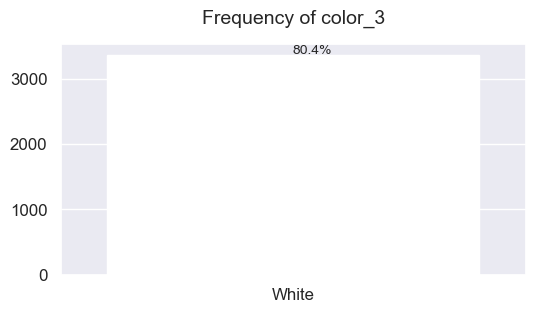

In [58]:
# Visualize the frequency of Has Table Color_3(6)
col = 'color_3'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='white')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color white is available for 80.4% of the shoes, while the remaining models do not offer this color option.

#### Color_4 - Red (7)

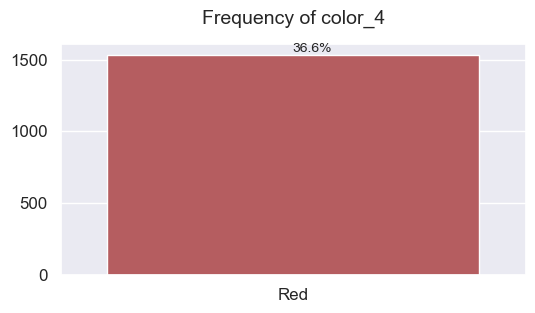

In [59]:
# Visualize the frequency of Has Table Color_4(7)
col = 'color_4'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, color='r')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The color red is available for 36.6% of the shoes, while the remaining models do not offer this color option.

#### other_color (8)

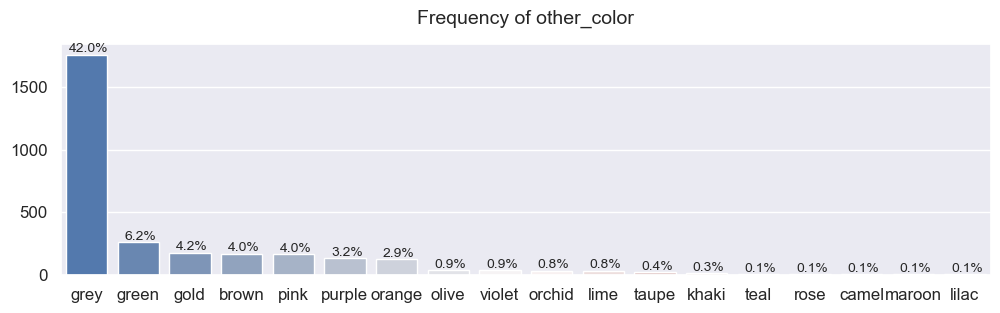

In [60]:
# Visualize the frequency of Has Online other_color(8)
col = 'other_color'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The prevailing color in the 'other_color' column is grey, constituting 42.0%. Following closely are green at 6.2%, gold at 4.2%, brown at 4.0%, pink at 4.0%, and so forth.

#### Numerical columns

In [61]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. no_colors
2. count_of_sizes
3. n_reviews
4. size
5. comfort
6. quality


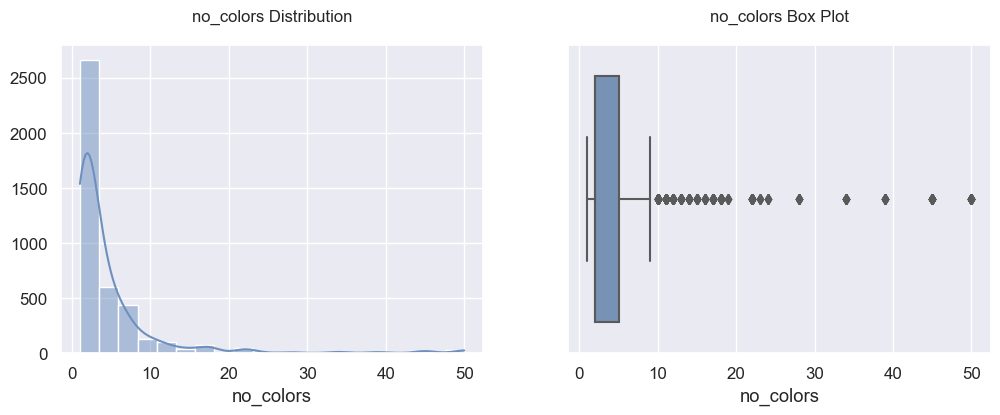

Skewness of no_colors : 4.3501733116472865


In [62]:
#Visualize (1) no_colors
col = 'no_colors'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of no_colors
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'no_colors' exhibits a rightward skewness. A Box plot indicates the presence of outliers in this variable.  

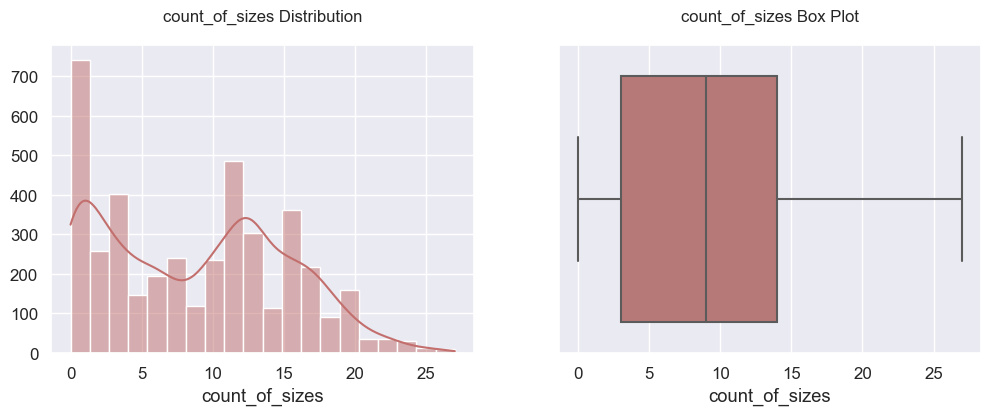

Skewness of count_of_sizes : 0.20177226635619083


In [63]:
#Visualize (2) count_of_sizes
col = 'count_of_sizes'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of count_of_sizes
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'count_of_sizes' is right-skewed. A box plot does not indicate the presence of outliers in this variable.

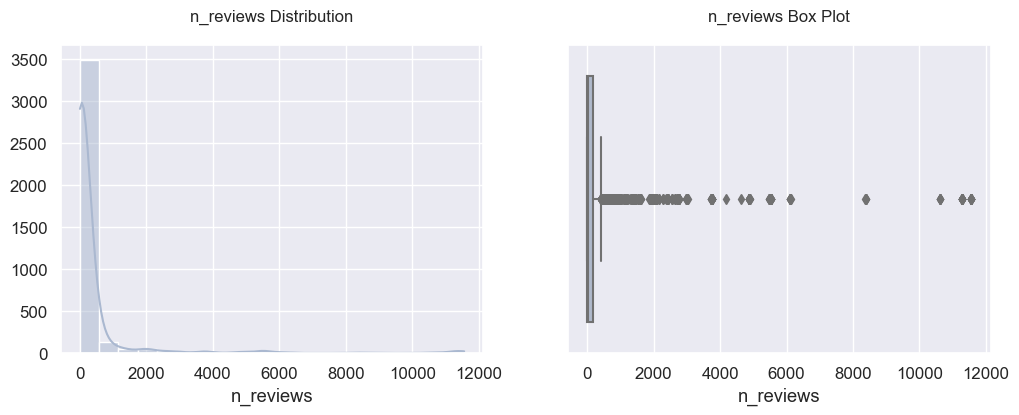

Skewness of n_reviews : 6.4926268543005845


In [64]:
#Visualize (3) n_reviews
col = 'n_reviews'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of n_reviews
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'n_reviews' is skewed to the right. A Box plot indicates the presence of outliers in this variable.

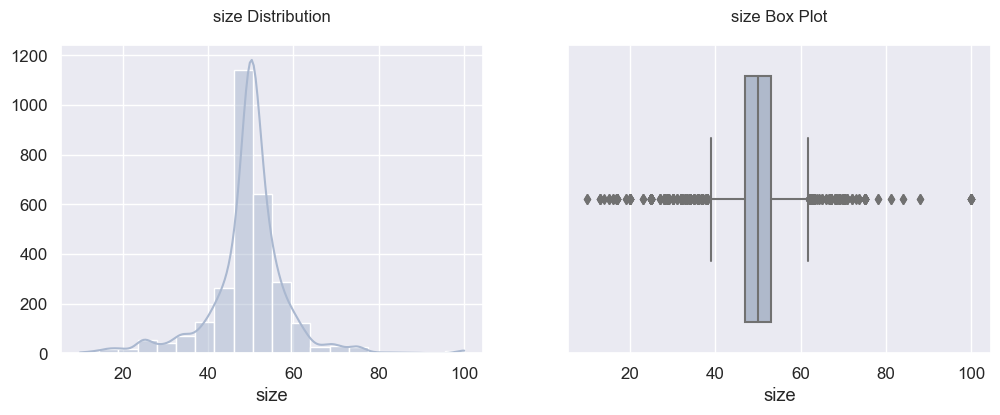

Skewness of size : -0.015037334756479502


In [65]:
#Visualize (4) size
col = 'size'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of size
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'size' appears to be almost normal. However, a box plot reveals the presence of outliers in this variable.

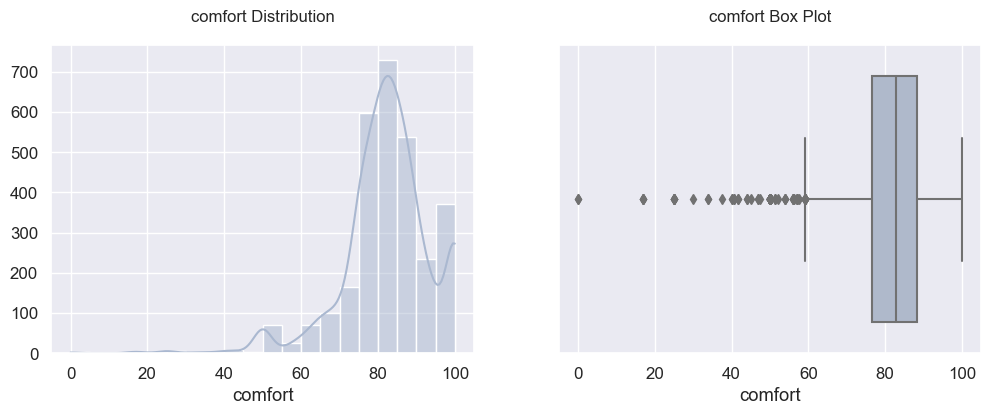

Skewness of comfort : -1.3229543055661768


In [66]:
#Visualize (5) comfort
col = 'comfort'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of comfort
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'comfort' is skewed to the left. A Box plot indicates the presence of outliers in this variable.

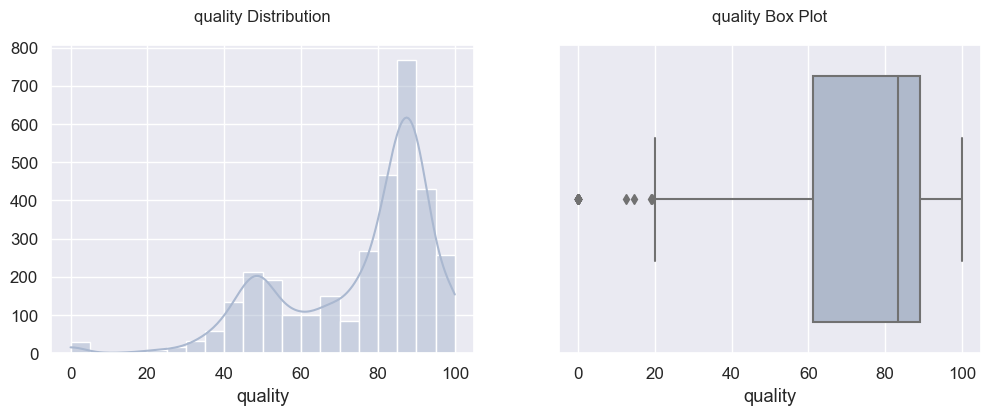

Skewness of quality : nan


In [67]:
#Visualize (6) quality
col = 'quality'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of quality
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'quality' is skewed to the left. A Box plot indicates the presence of few outliers in this variable.

#### 1.4.1.4 Univariate Boxplot

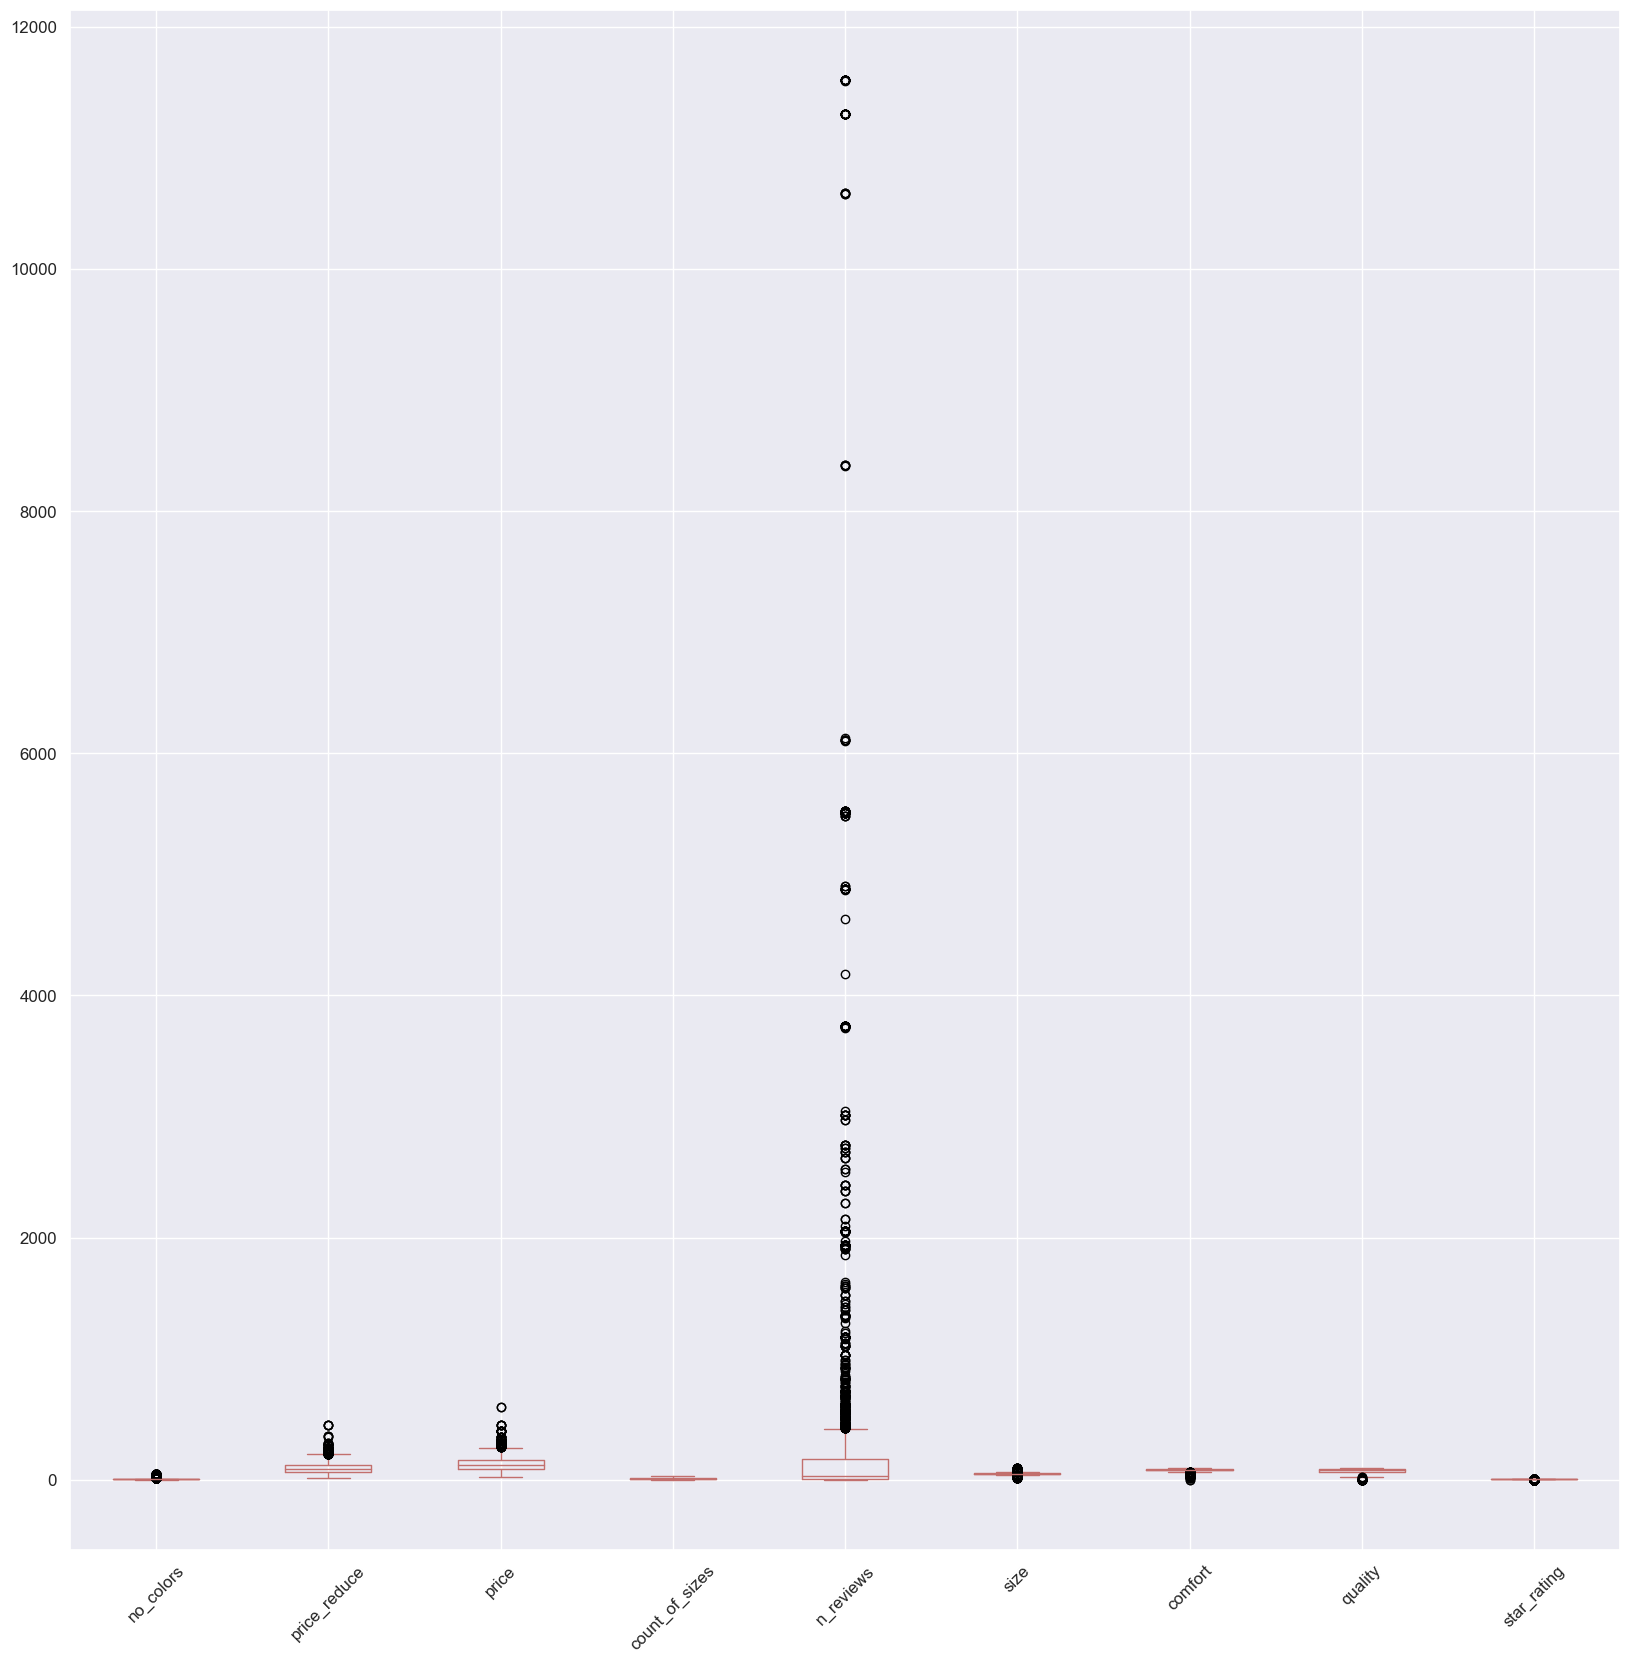

In [68]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,20), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis. Next, we will draw the boxplot without 'n_reviews' columns to appreciate better the distribution.

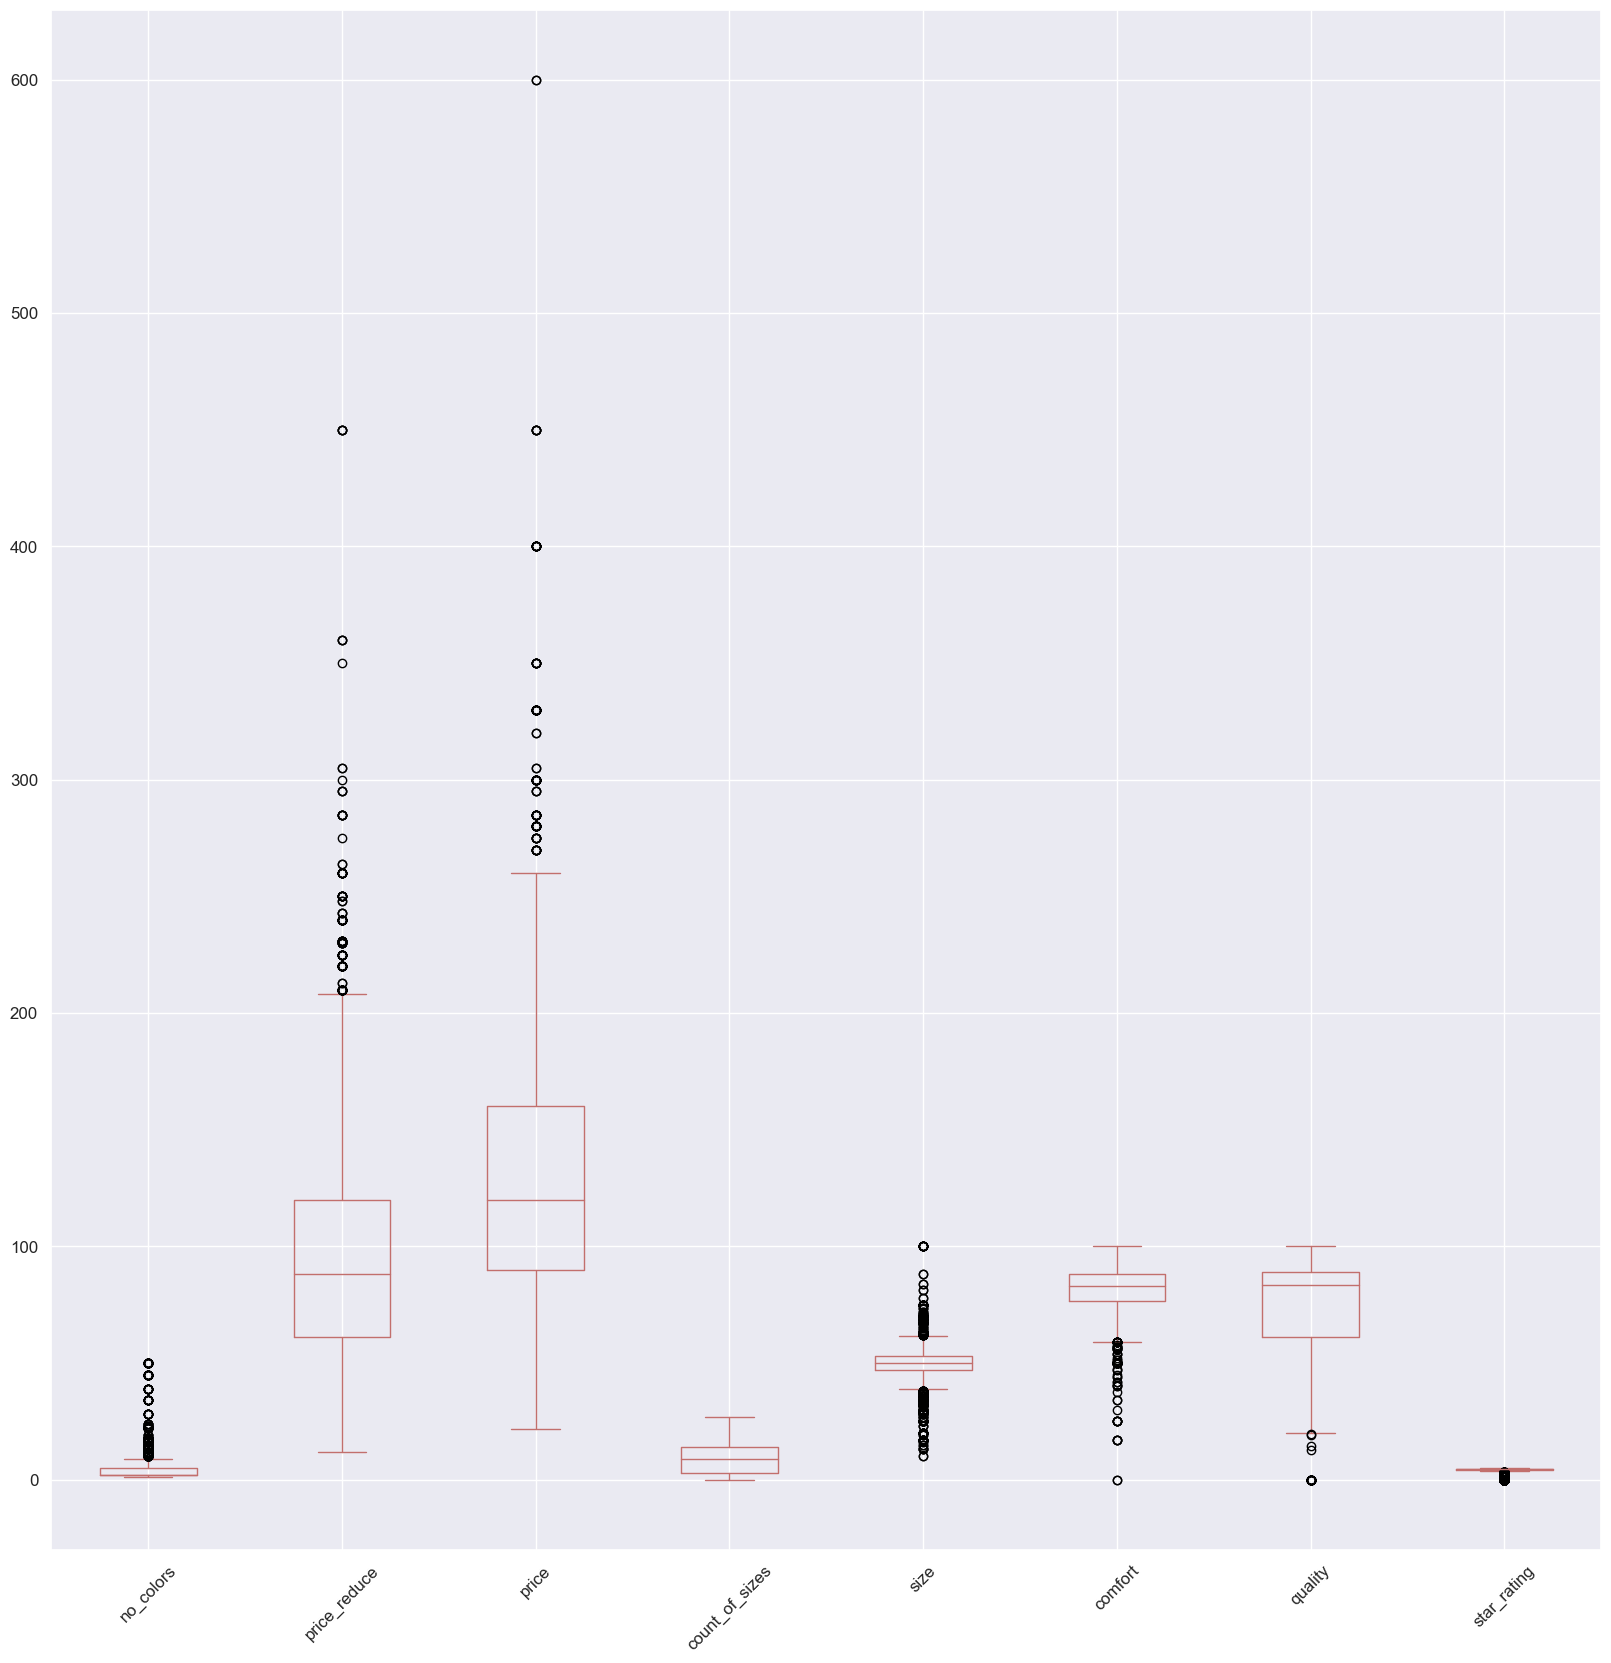

In [69]:
# Draw a boxplot for each independent variable 
df.drop('n_reviews', axis=1).boxplot(figsize=(20,20), color='#c26f6d')
plt.xticks(rotation=45)
plt.show()

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 BoxPlot Analysis:  Finding outliers and comparing  

##### Plotting functions

In [70]:
def boxplot_by_category(col, category_col, xlabel, cat_label, figsize, palette, xscale=''):
    plt.figure(figsize=figsize)
    sns.set_palette(palette)
    sns.boxplot(data=df, x=col, y=category_col)
    plt.ylabel(cat_label)
    plt.xlabel(xlabel)
    if xscale != '':
        plt.xscale(xscale)
    plt.title(f"BoxPlot of {col} vs. {cat_label}")
    plt.show()

#### 1.4.2.1.1 Category
#### Price distribution according to Category

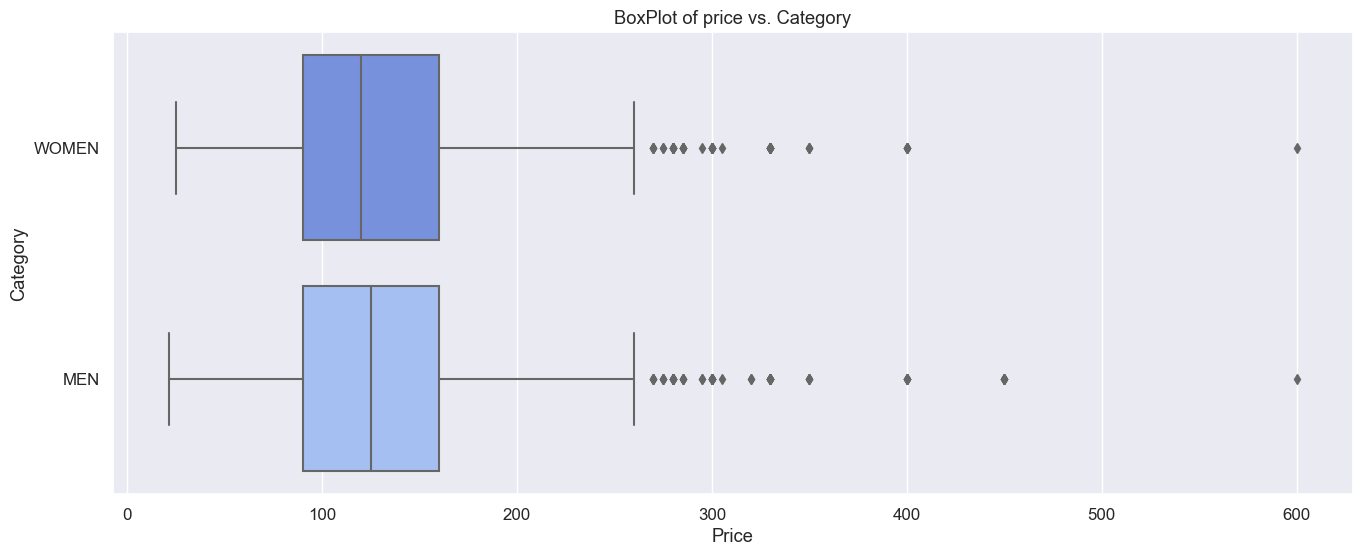

In [71]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'Category_gral'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Category', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Category

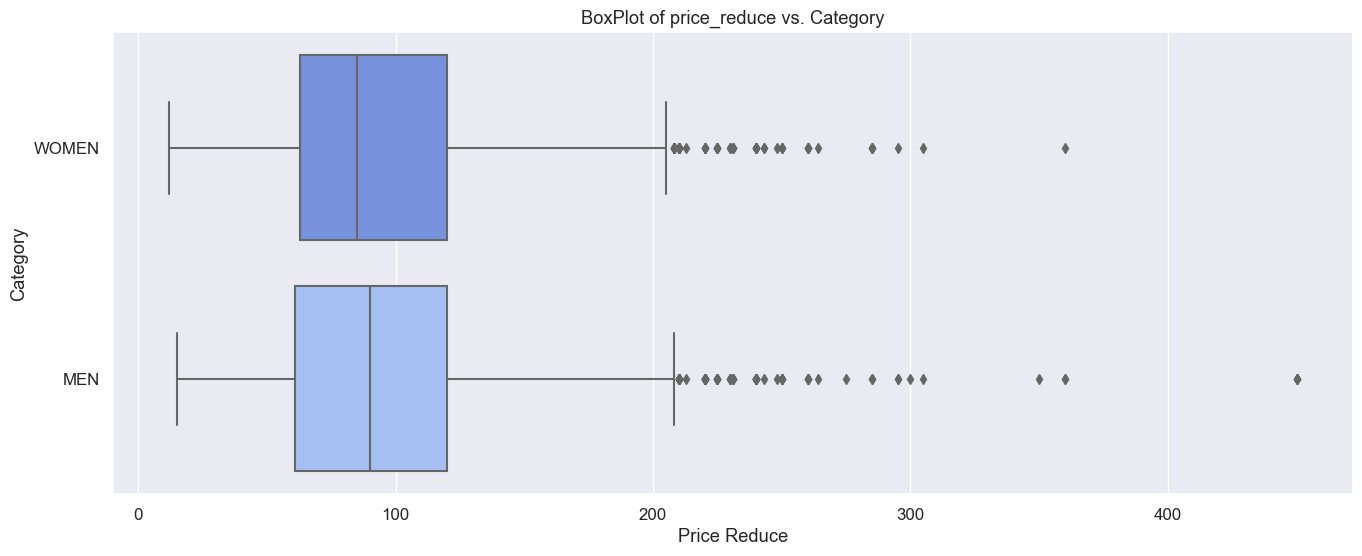

In [72]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'Category_gral'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Category', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Category

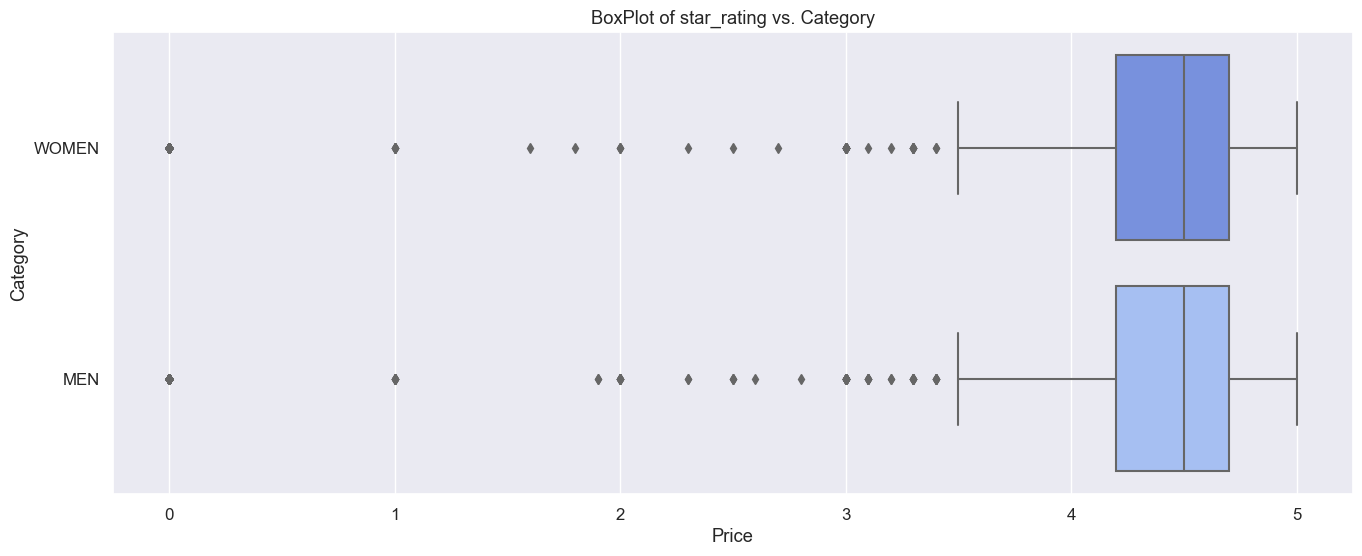

In [73]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'Category_gral'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Category', figsize=(16,6), palette='coolwarm', xscale='')

#### Create binary columns from of 'color_1', 'color_2', 'color_3', 'color_4' 

In [74]:
df['color_1_'] = df['color_1'].apply(lambda x: 'Black' if pd.notna(x) and x=='Black' else f'Not Black')
df['color_2_'] = df['color_2'].apply(lambda x: 'Blue' if pd.notna(x) and x=='Blue' else f'Not Blue')
df['color_3_'] = df['color_3'].apply(lambda x: 'White' if pd.notna(x) and x=='White' else f'Not White')
df['color_4_'] = df['color_4'].apply(lambda x: 'Red' if pd.notna(x) and x=='Red' else f'Not Red')

df.tail(5)

ShoeName Category  no_colors  price_reduce  price  \
4417     Brown Sports Shoe for men      Men        1.0         57.56  95.94   
4418   PARIS KHAKI sneaker for men      Men        3.0         35.96  59.94   
4419  Dubai Khaki sneakers for men      Men        4.0         44.34  44.34   
4420         Navy sneakers for men      Men        2.0         23.72  39.54   
4421   Black Slip-on Shoes for men      Men        2.0         16.15  21.54   

       product_code  count_of_sizes color_1 color_2 color_3  ... n_reviews  \
4417  FGC0DY0S0082A               1     NaN     NaN     NaN  ...       NaN   
4418  FGC0L4033131A               0     NaN    Blue     NaN  ...       NaN   
4419  FGC0L4037301A               1   Black     NaN     NaN  ...       NaN   
4420  FGC0Y9032792A               0   Black    Blue     NaN  ...       NaN   
4421  FGC0Z7041652A               0   Black     NaN     NaN  ...       NaN   

     size  comfort  quality  star_rating  Category_gral   color_1_  color_2_  \
4417  NaN      NaN      NaN          NaN            MEN  Not Black  Not Blue   
4418  NaN      NaN      NaN          NaN            MEN  Not Black      Blue   
4419  NaN      NaN      NaN          NaN            MEN      Black  Not Blue   
4420  NaN      NaN      NaN          NaN            MEN      Black      Blue   
4421  NaN      NaN      NaN          NaN            MEN      Black  Not Blue   

       color_3_ color_4_  
4417  Not White  Not Red  
4418  Not White  Not Red  
4419  Not White  Not Red  
4420  Not White  Not Red  
4421  Not White  Not Red  

[5 rows x 22 columns]

#### 1.4.2.1.2 Color: Black

#### Price distribution according to Color: Black

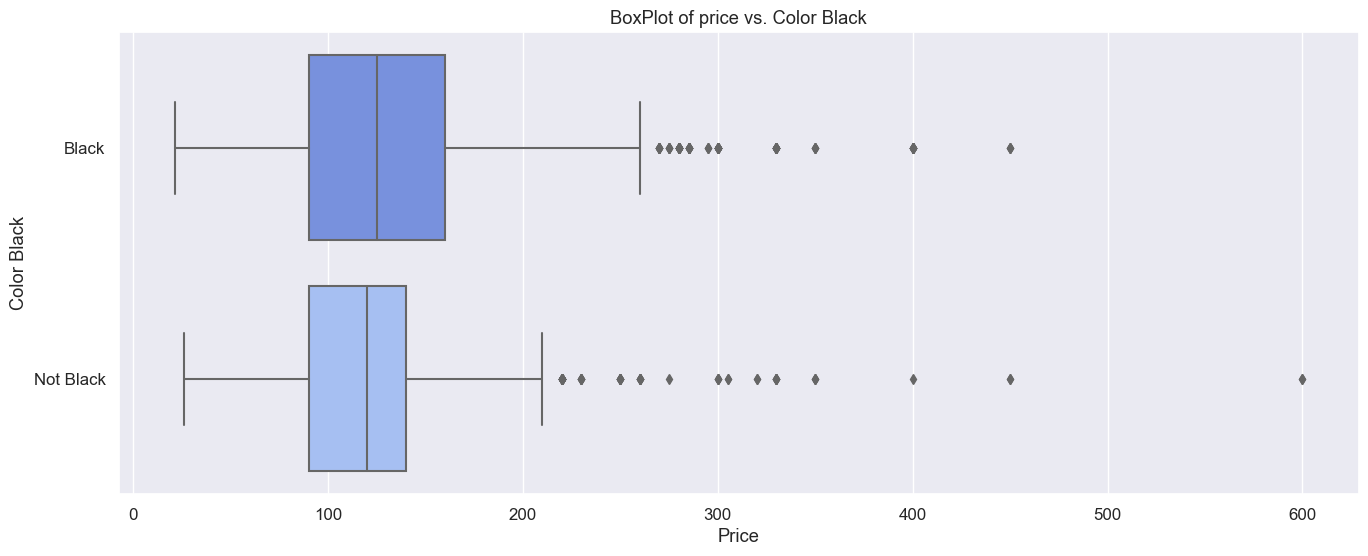

In [75]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_1_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Black', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: Back

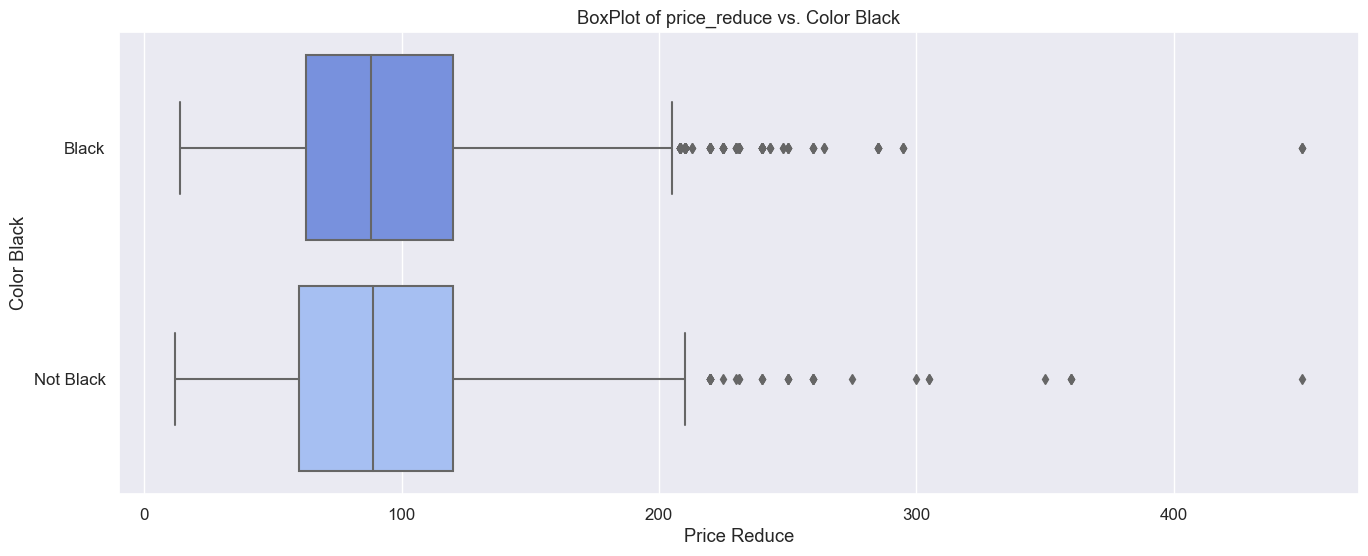

In [76]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_1_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color Black', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: Black

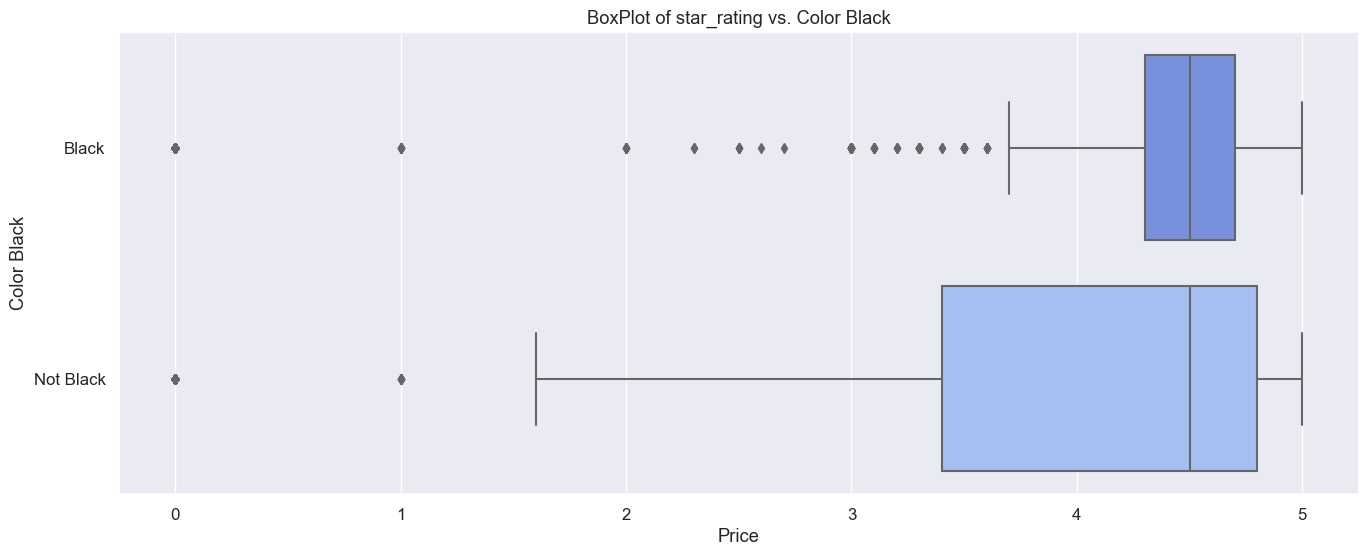

In [77]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_1_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Black', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.3 Color: Blue

#### Price distribution according to Color: Blue

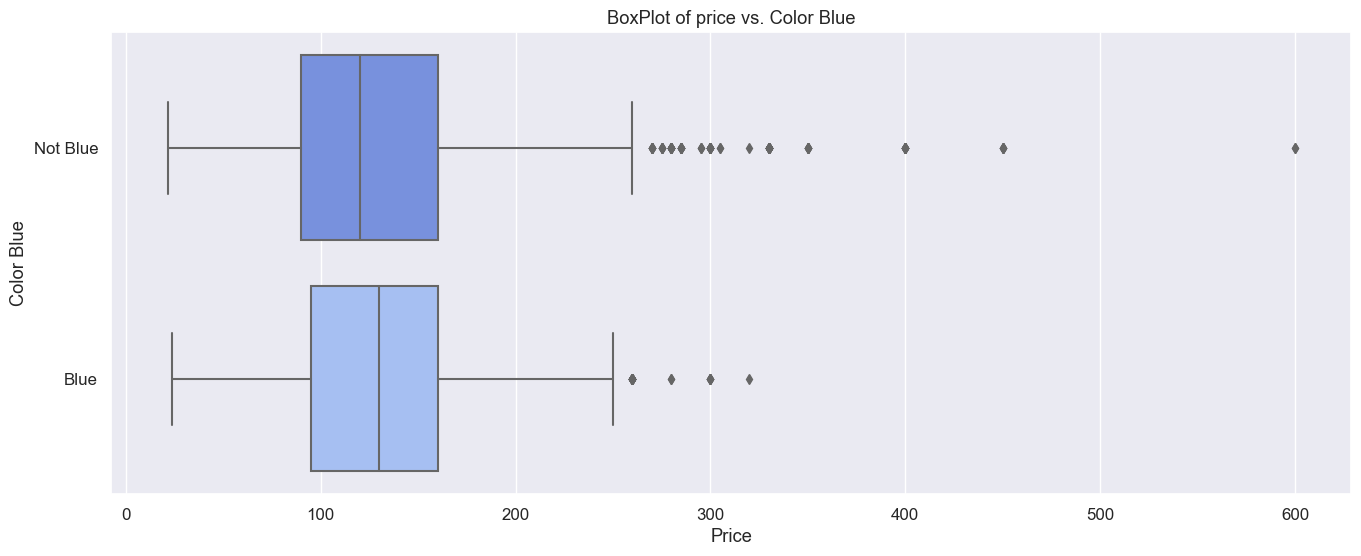

In [78]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_2_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Blue', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: Blue

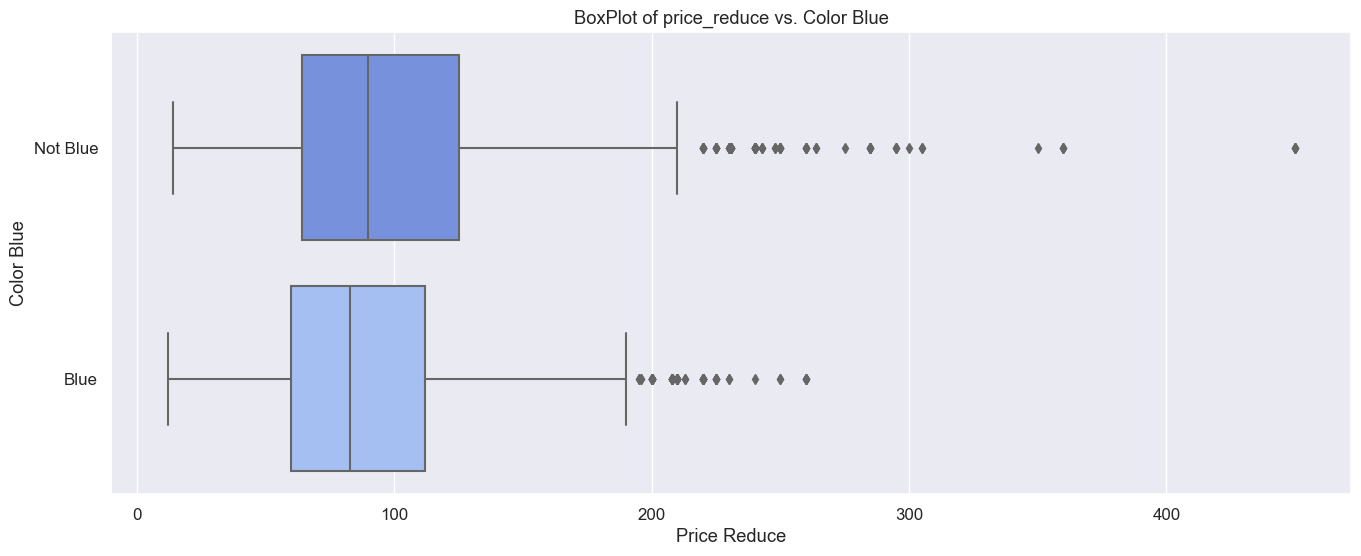

In [79]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_2_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color Blue', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: Blue

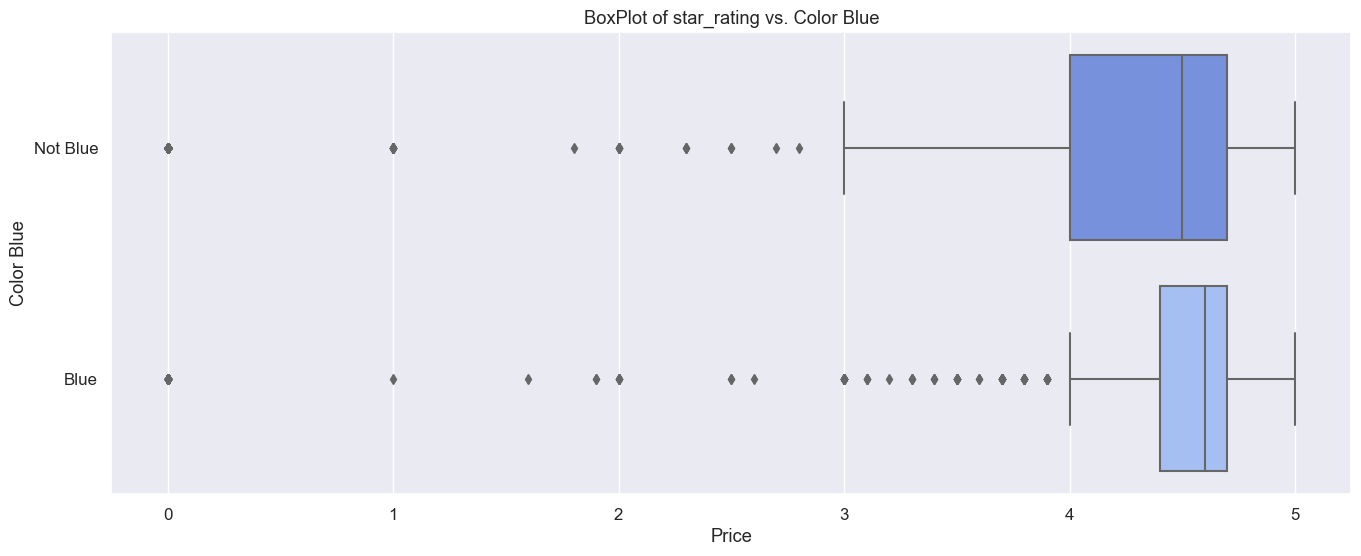

In [80]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_2_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Blue', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.4 Color. White

#### Price distribution according to Color: White

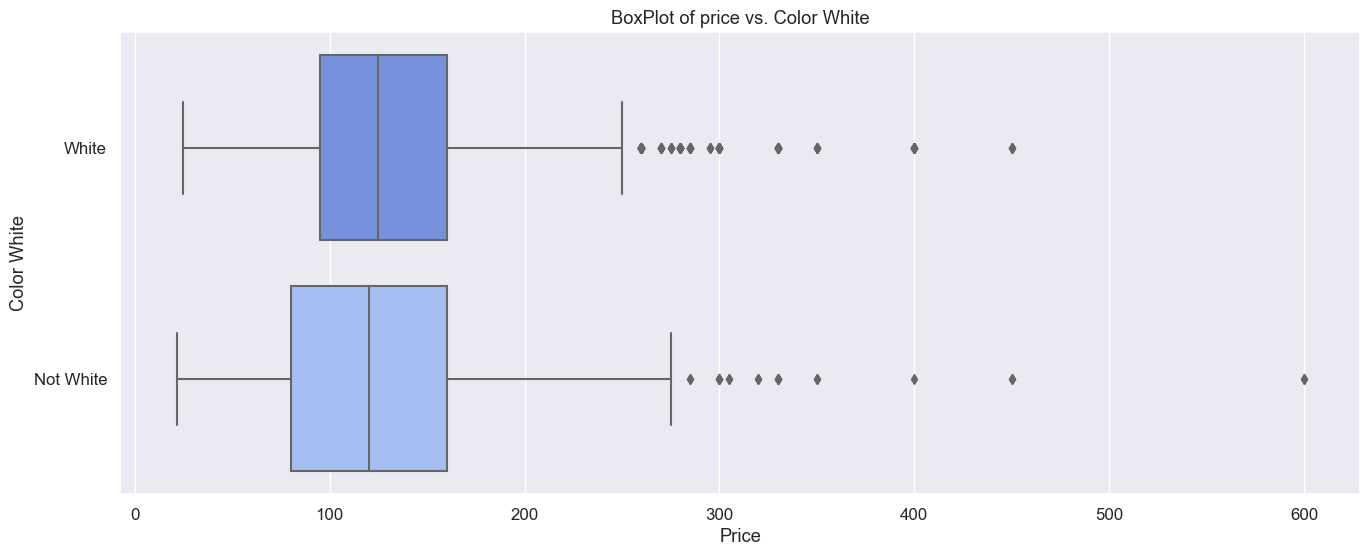

In [81]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_3_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color White', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: White

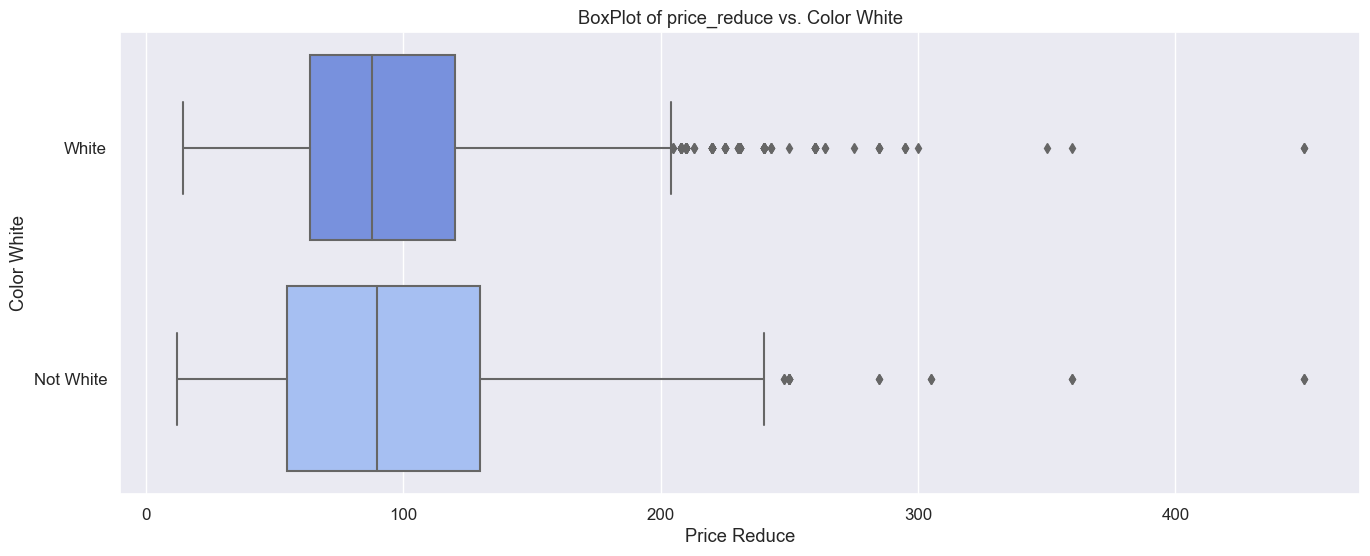

In [82]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_3_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color White', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: White

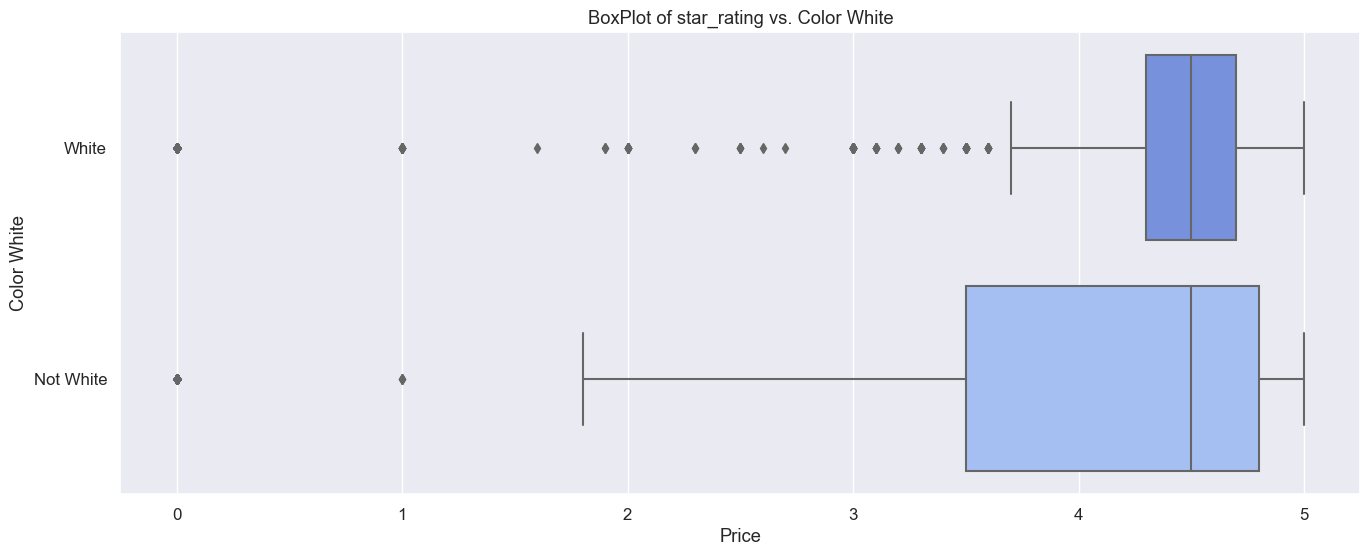

In [83]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_3_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color White', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.5 Color: Red
#### Price distribution according to Color: Red

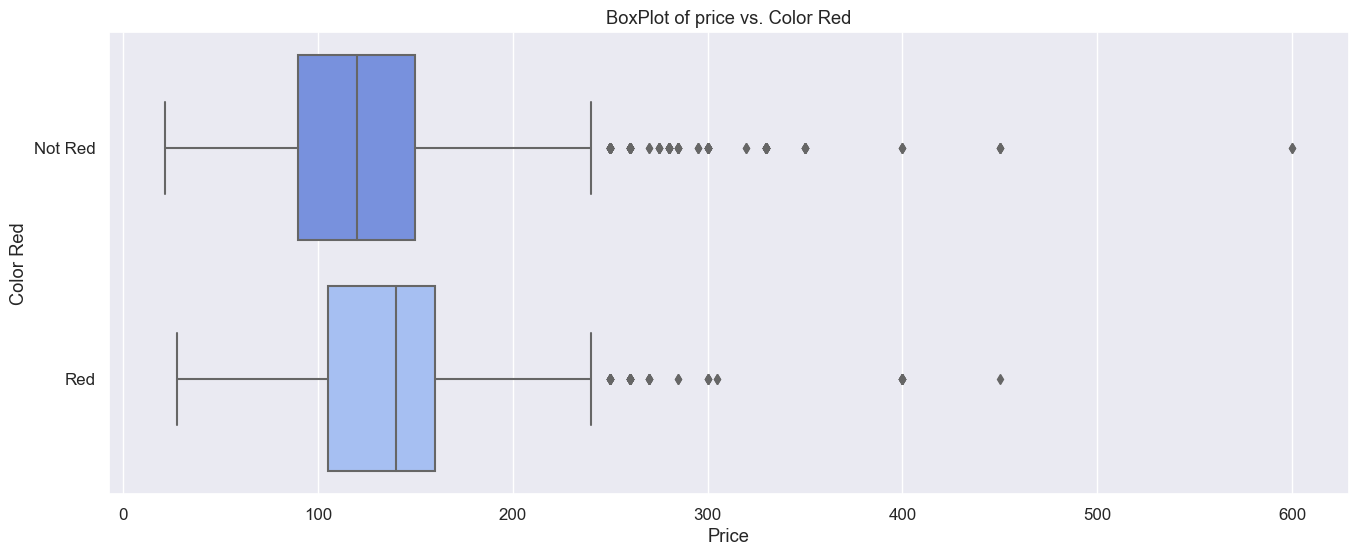

In [84]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'color_4_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Red', figsize=(16,6), palette='coolwarm', xscale='')

#### Price_reduce distribution according to Color: Red

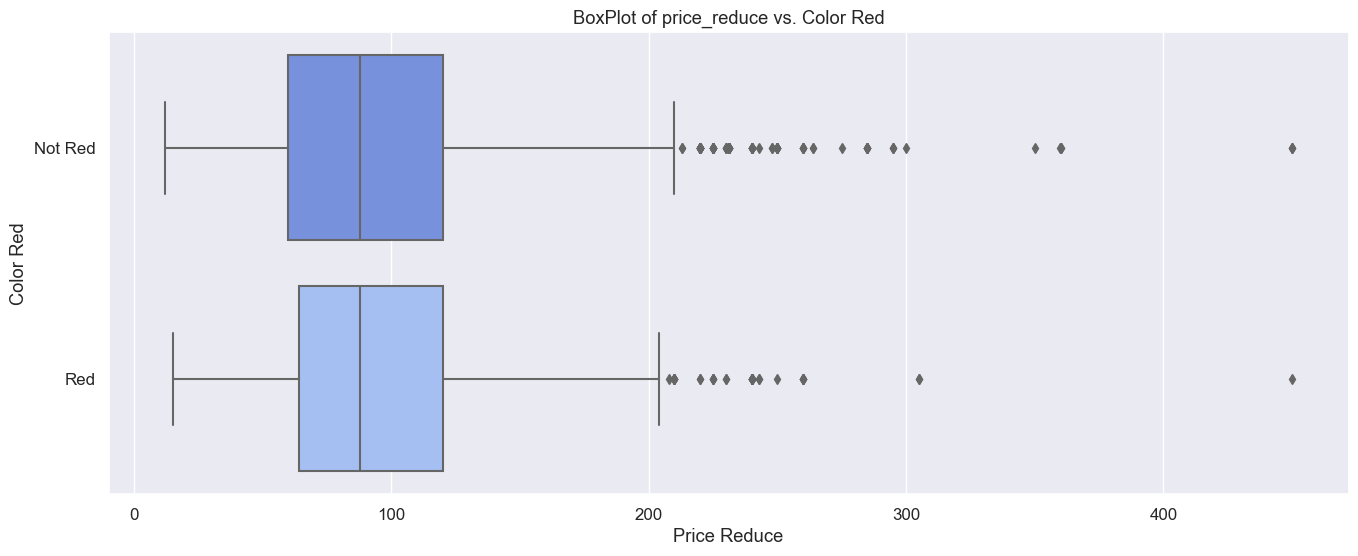

In [85]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'color_4_'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color Red', figsize=(16,6), palette='coolwarm', xscale='')

#### Star Rating distribution according to Color: Red

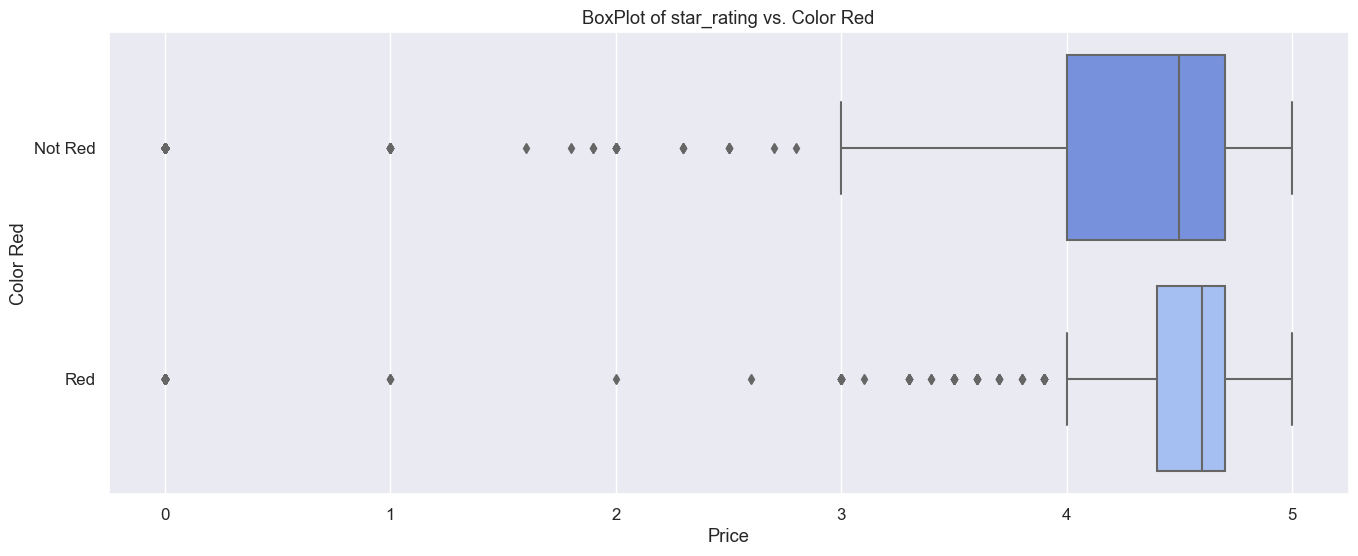

In [86]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'color_4_'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color Red', figsize=(16,6), palette='coolwarm', xscale='')

#### 1.4.2.1.6 Other_column

#### Price distribution according to Other Colors

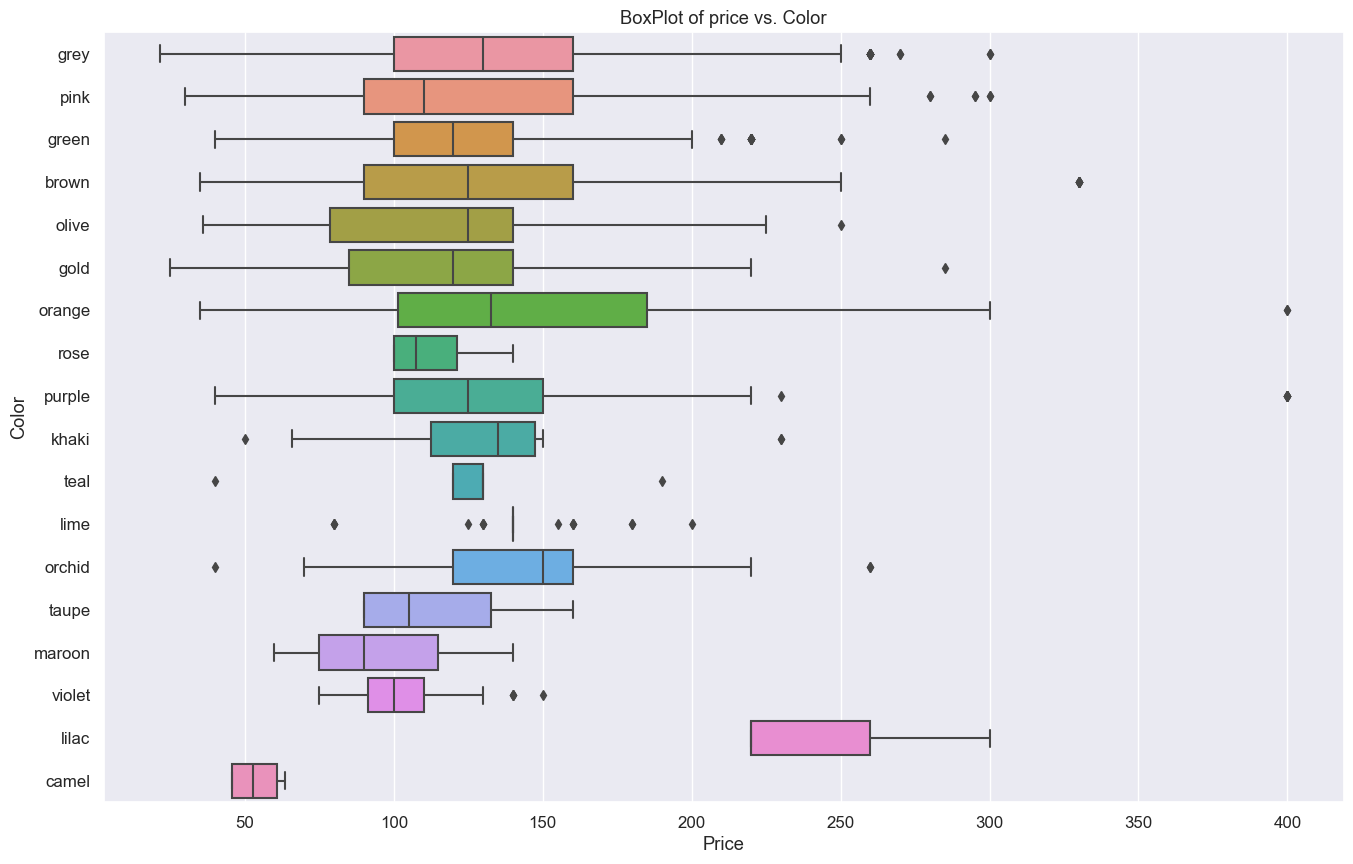

In [87]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price'
category_col= 'other_color'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color', figsize=(16,10), palette='coolwarm', xscale='')

#### Price_reduce distribution according to other_color

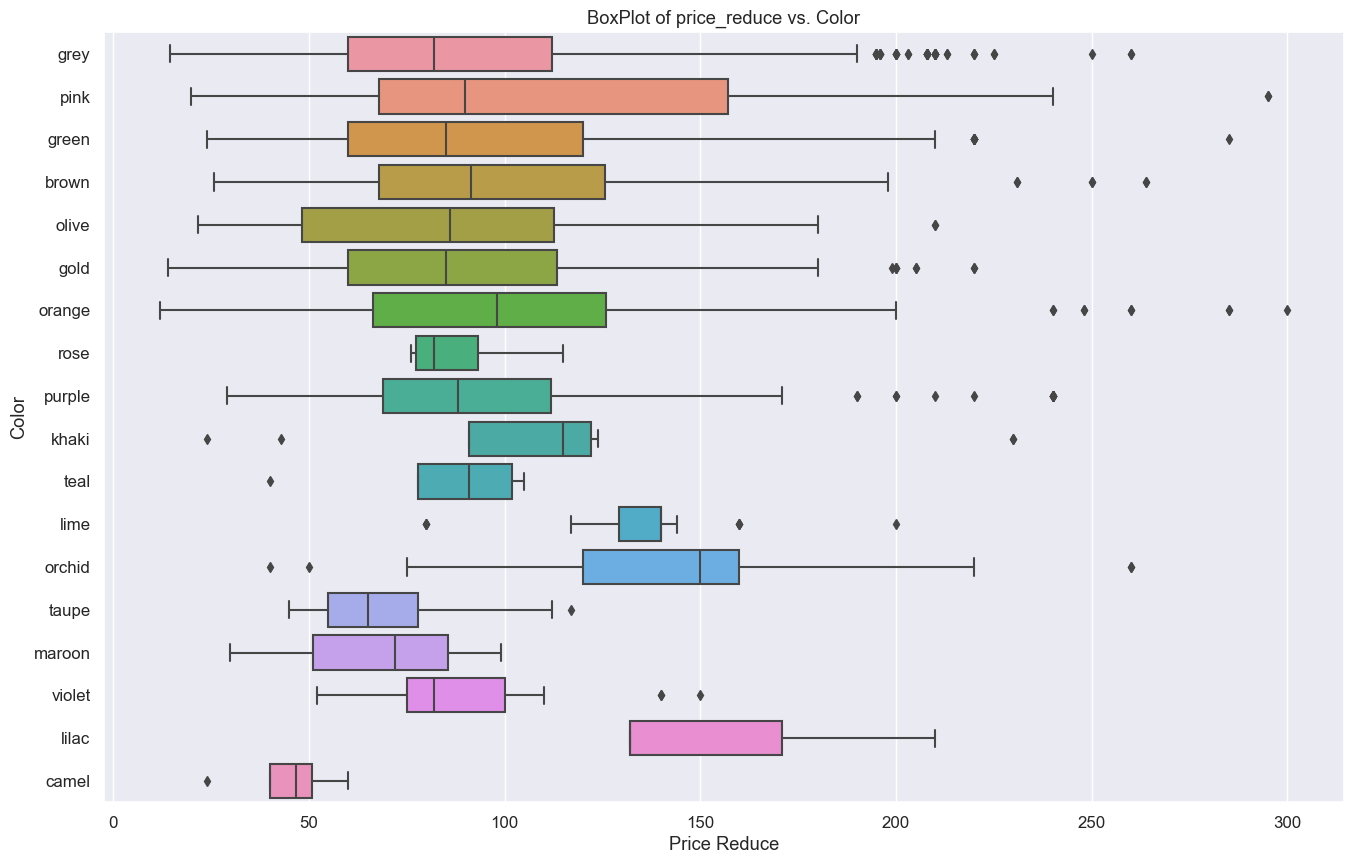

In [88]:
# Visualizing and comparing each independent variable with target
# Columns price 
col = 'price_reduce'
category_col= 'other_color'

boxplot_by_category(col, category_col,  xlabel='Price Reduce', cat_label='Color', figsize=(16,10), palette='coolwarm', xscale='')

#### Star Rating distribution according to other_color

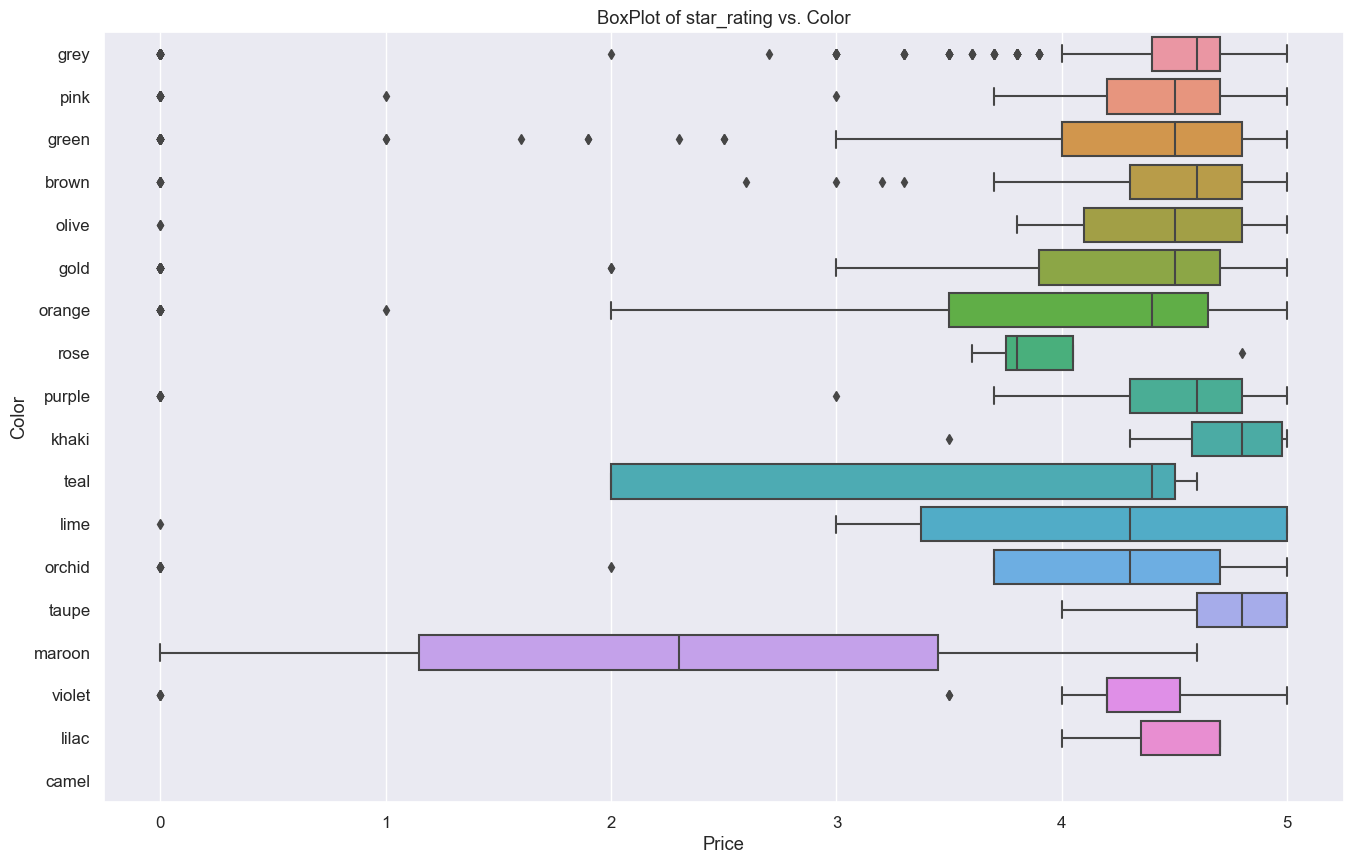

In [89]:
# Visualizing and comparing each independent variable with target
# Columns star_rating
col = 'star_rating'
category_col= 'other_color'

boxplot_by_category(col, category_col,  xlabel='Price', cat_label='Color', figsize=(16,10), palette='coolwarm', xscale='')

In [90]:
def plot_scatter_target_r_according_to(x_col, y_col, category_col, xlabel, ylabel, cat_label, title, palette):
    '''Draw a scatter plot comparing <x_col> with <y_col> variable.'''
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1)  

    # Plot scatterplot
    sns.scatterplot(x=x_col, y=y_col, hue=category_col, data=df, palette=palette)

    # visual presentation
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title(cat_label if cat_label else category_col)
    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    if title:
        plt.title(title)
    else:
        plt.title(f'{xlabel if xlabel else x_col} vs. {ylabel if ylabel else y_col} according to {cat_label if cat_label else category_col}')
    plt.show()

#### 1.4.2.2.a Analyzing the Relationship Between Price and Color Variety Across Categories: A Scatter Plot Exploration

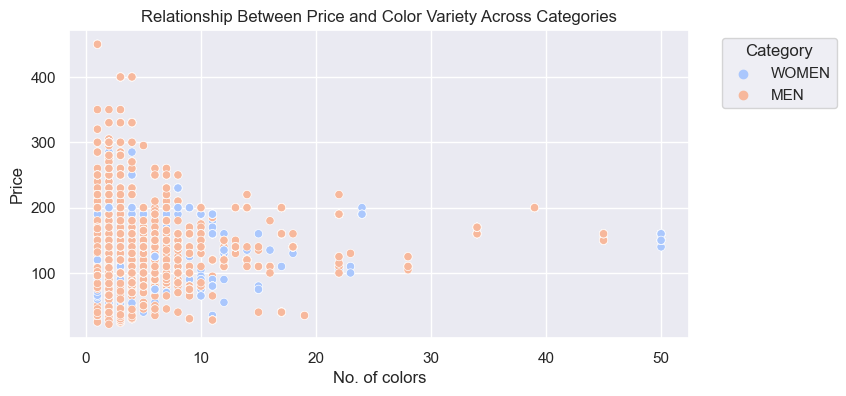

In [91]:
col = 'no_colors'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='No. of colors', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Color Variety Across Categories', 
                                   palette='coolwarm')

Shoes within the Men's category generally exhibit higher prices compared to women's shoes, particularly those with limited color options. On the other hand, Women's shoe prices typically fall within a moderate range, yet those with fewer color options usually have a higher price than those offering a more extensive color selection.

#### 1.4.2.2.b Analyzing the Impact of Color Variety on Discounted Prices Across Categories

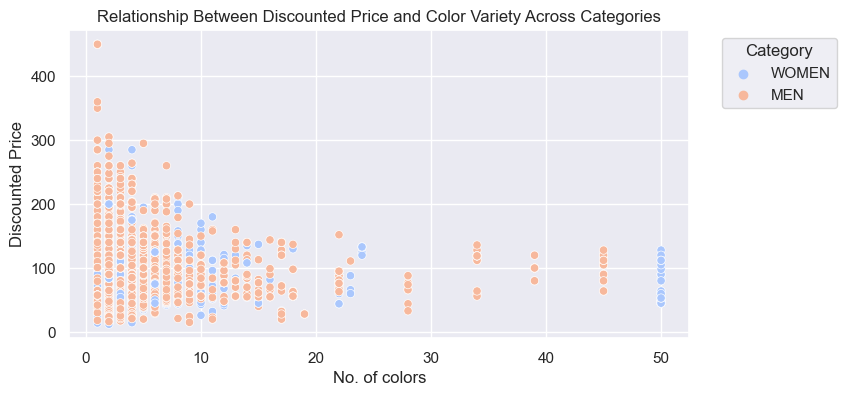

In [92]:
col = 'no_colors'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='No. of colors', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Color Variety Across Categories', 
                                   palette='coolwarm')

Compared to the preceding plot, the general trends remain consistent: the Men's category continues to showcase higher prices in contrast to women's shoes, and those with restricted color options command higher prices than their counterparts with a broader color selection. However, it is noteworthy that a significant number of observations consistently stay below 100 or in close proximity to 100.

#### 1.4.2.2.c Analyzing the Relationship Between Star Rating and Color Variety Across Categories

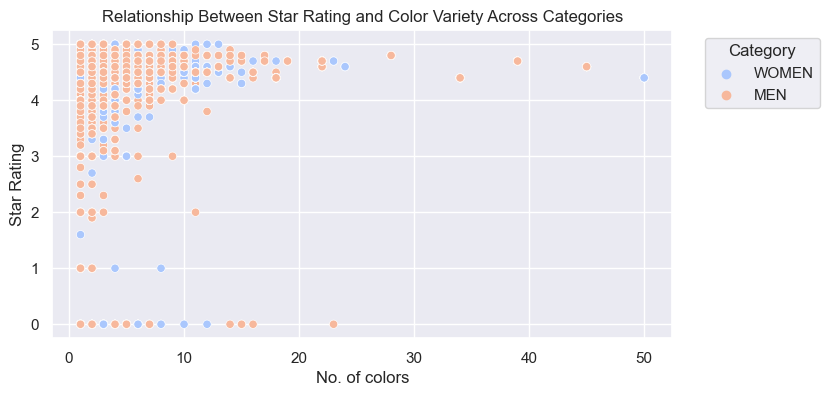

In [93]:
col = 'no_colors'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='No. of colors', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Color Variety Across Categories', 
                                   palette='coolwarm')

Most men's and women's shoes generally receive ratings higher than 4, irrespective of the number of colors available. However, some observations with notably low ratings stand out, particularly for shoes with a limited color variety. This could be attributed to the fact that these shoes typically fall within a higher price range, leading customers to have elevated expectations. On the contrary, shoes offering a broad spectrum of colors consistently exhibit ratings that do not dip below 4.

#### 1.4.2.3.a Analyzing the Relationship Between Price and the Count of Sizes Across Categories: A Scatter Plot Exploration

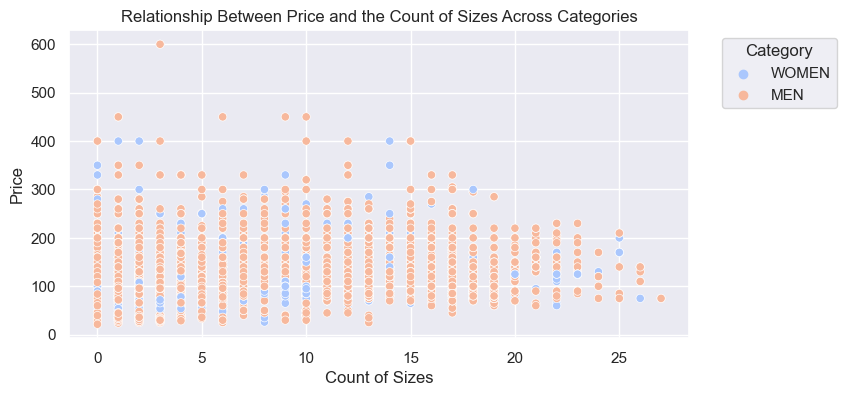

In [94]:
col = 'count_of_sizes'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='Count of Sizes', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and the Count of Sizes Across Categories', 
                                   palette='coolwarm')

Some men's shoes with higher prices tend to have limited available sizes, although this is a minor occurrence with only a few observations. Similarly, this pattern is observed with women's shoes, with the distinction that women's shoes generally tend to have lower prices overall.

#### 1.4.2.3.b Analyzing the Impact of the Count of Sizes on Discounted Prices Across Categories

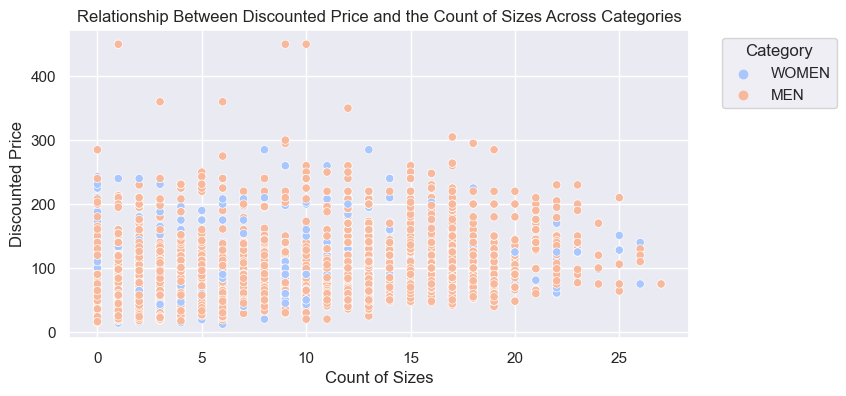

In [95]:
col = 'count_of_sizes'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='Count of Sizes', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and the Count of Sizes Across Categories', 
                                   palette='coolwarm')

Compared to the previous plot, the conclusions are similar.

#### 1.4.2.3.c Analyzing the Relationship Between Star Rating and the Count of Sizes Across Categories

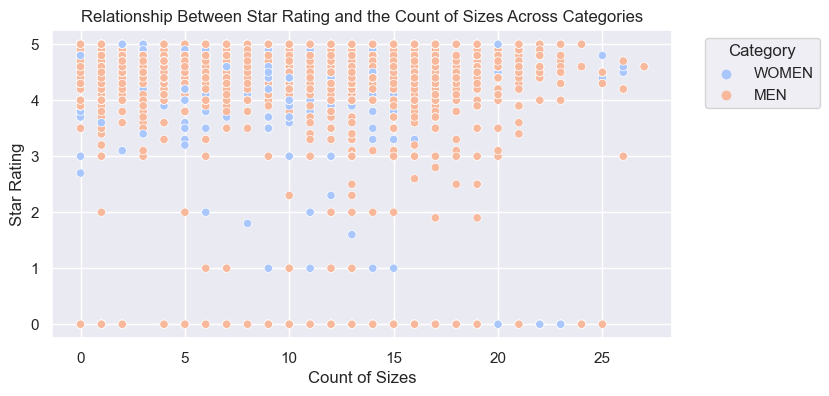

In [96]:
col = 'count_of_sizes'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='Count of Sizes', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and the Count of Sizes Across Categories', 
                                   palette='coolwarm')

The count of available sizes does not have a significant impact on the star rating score, except in some specific cases. One noticeable trend is that lower ratings, particularly those below 1, tend to be associated with men's shoes.

#### 1.4.2.4.a Analyzing the Relationship Between Price and Number of Reviews Across Categories: A Scatter Plot Exploration

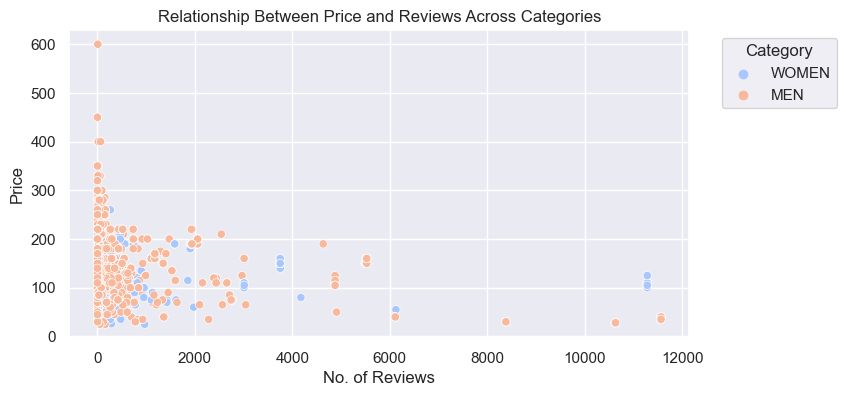

In [97]:
col = 'n_reviews'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='No. of Reviews', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Reviews Across Categories', 
                                   palette='coolwarm')

The most expensive men's shoes tend to have zero reviews, and as the shoe price decreases, they tend to accumulate more reviews. A similar pattern is observed with women's shoes.

#### 1.4.2.4.b Analyzing the Impact of Number of Reviews on Discounted Prices Across Categories

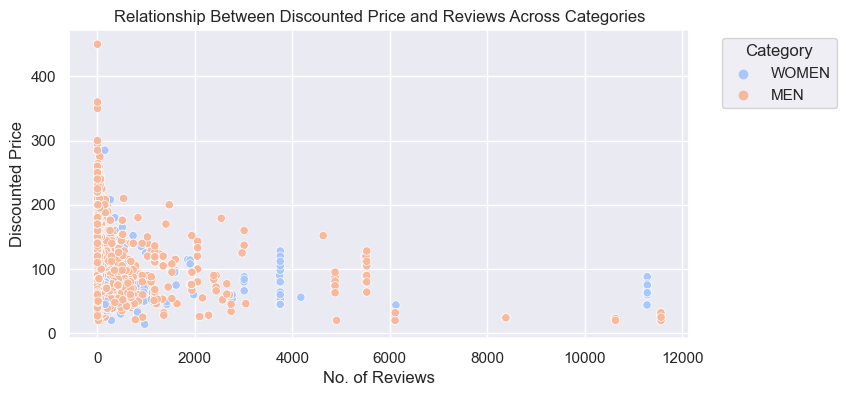

In [98]:
col = 'n_reviews'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='No. of Reviews', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Reviews Across Categories', 
                                   palette='coolwarm')

Compared to the previous plot, despite preseting a similar pattern, we can observe that discounted shoes with prices ranging from 50 to 100 tend to have more reviews.

#### 1.4.2.4.c Analyzing the Relationship Between Star Rating and Number of Reviews Across Categories

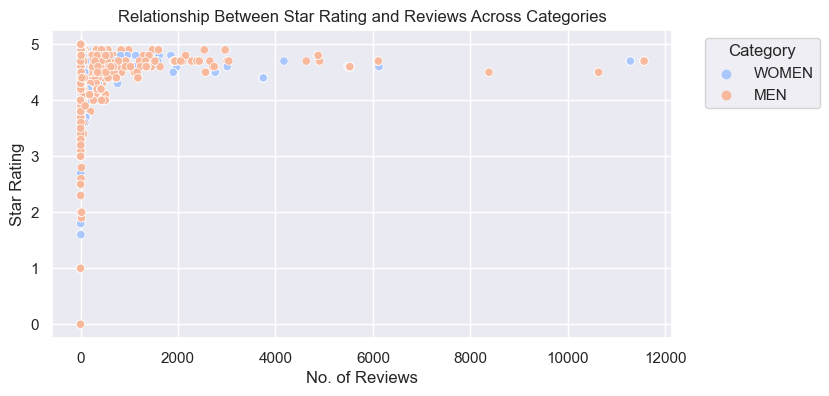

In [99]:
col = 'n_reviews'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='No. of Reviews', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Reviews Across Categories', 
                                   palette='coolwarm')

In general, the star ratings received by both women's and men's shoes tend to be above 4, consistently maintaining that range even when there are numerous reviews. There are a few instances with lower star ratings, but these are typically associated with shoes that have very few reviews.

#### 1.4.2.5.a Analyzing the Relationship Between Price and Quality, Comfort and Size Across Categories: A Scatter Plot Exploration

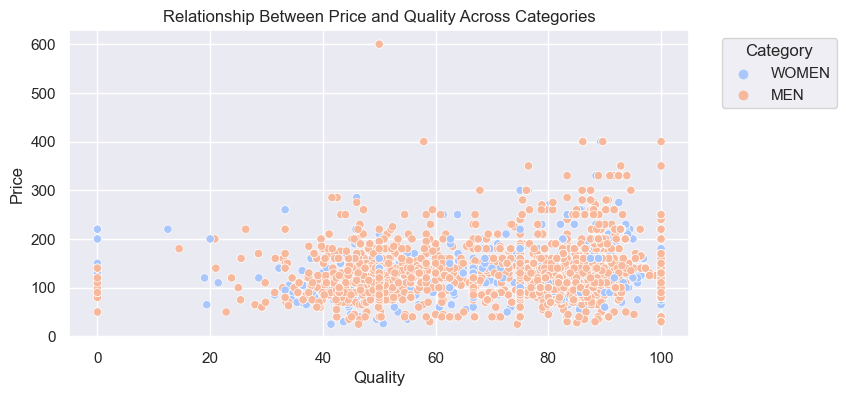

In [100]:
col = 'quality'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='Quality', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Quality Across Categories', 
                                   palette='coolwarm')

There is a slight tendency for shoes, especially men's, to have a higher quality rating as their price increases.

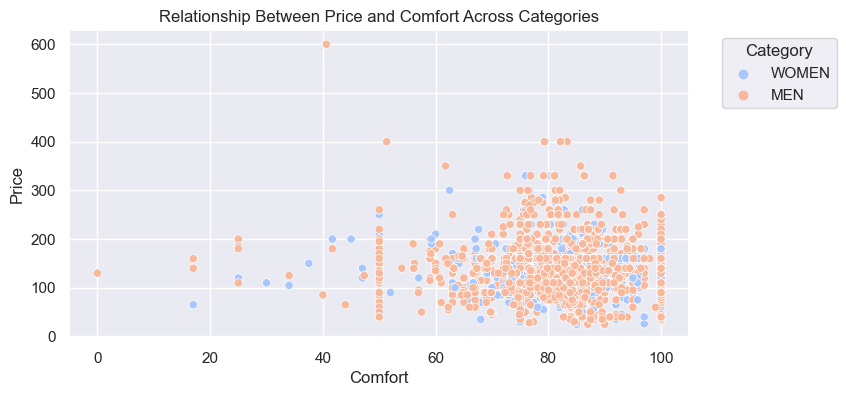

In [101]:
col = 'comfort'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='Comfort', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and Comfort Across Categories', 
                                   palette='coolwarm')

Comparing with the preceding plot, there is a similar pattern when evaluating comfort, with the difference that men's shoes tend to have a comfort rating generally above 50%. In contrast, women's shoes do show observations with comfort ratings between 20% and 45%, especially for shoes in the moderate price range.

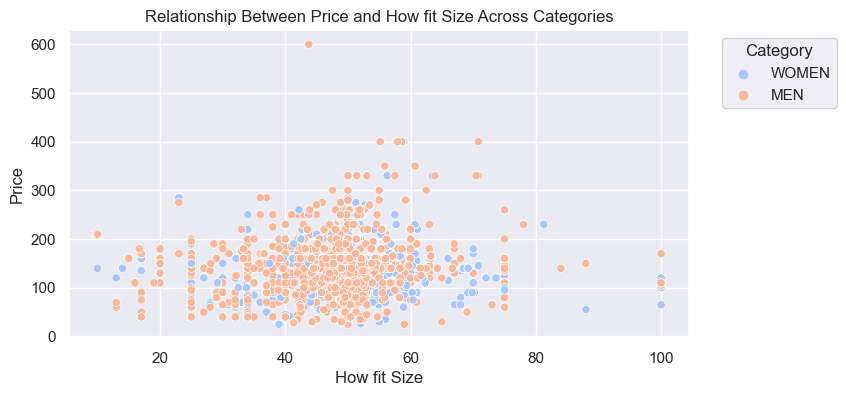

In [102]:
col = 'size'
plot_scatter_target_r_according_to(col, y_col='price', category_col='Category_gral',
                                   xlabel='How fit Size', ylabel='Price', cat_label='Category',
                                   title='Relationship Between Price and How fit Size Across Categories', 
                                   palette='coolwarm')

The more valuable shoes, especially those for men, tend to have a rating between 40% and 60% in terms of how well the shoe fits.

#### 1.4.2.5.b Analyzing the Impact of Quality, Comfort and Size on Discounted Prices Across Categories

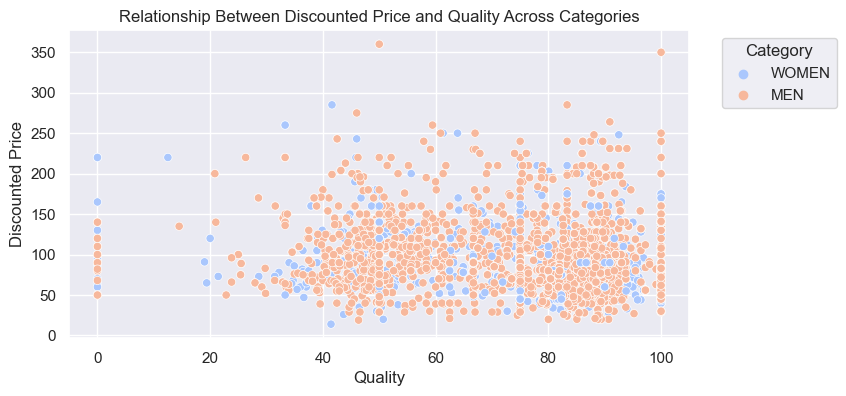

In [103]:
col = 'quality'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='Quality', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Quality Across Categories', 
                                   palette='coolwarm')

There is a slight trend indicating that shoes, particularly men's, tend to receive higher quality ratings as their prices increase, even when considering discounts.

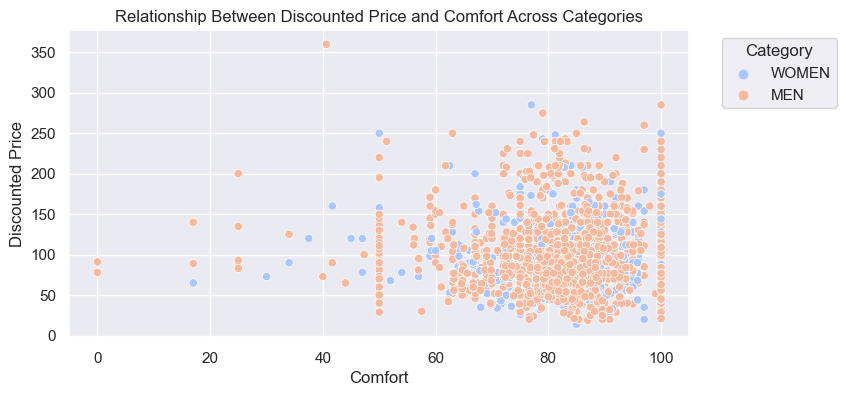

In [104]:
col = 'comfort'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='Comfort', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and Comfort Across Categories', 
                                   palette='coolwarm')

Comparing to the previous plot, a similar pattern emerges when evaluating comfort, with the difference that men's shoes tend to have a comfort rating generally above 50%. In contrast, observations for women's shoes include comfort ratings ranging from 20% to 45%, particularly for shoes in the moderate price range, even when considering discounts.

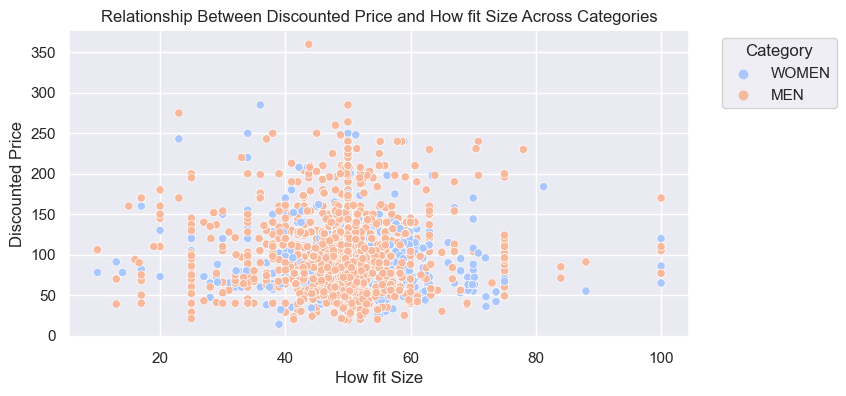

In [105]:
col = 'size'
plot_scatter_target_r_according_to(col, y_col='price_reduce', category_col='Category_gral',
                                   xlabel='How fit Size', ylabel='Discounted Price', cat_label='Category',
                                   title='Relationship Between Discounted Price and How fit Size Across Categories', 
                                   palette='coolwarm')

The more valuable shoes, especially those for men, tend to have a rating between 40% and 60% in terms of how well the shoe fits.

#### 1.4.2.5.c Analyzing the Relationship Between Star Rating and Quality, Comfort and Size Across Categories

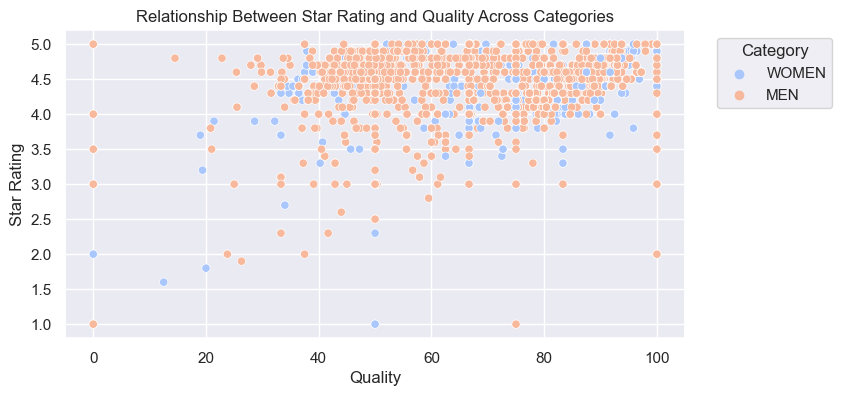

In [106]:
col = 'quality'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='Quality', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Quality Across Categories', 
                                   palette='coolwarm')

As expected, higher ratings correspond to higher quality evaluations. Beyond the 40% threshold, ratings fall within the range of 4.5 to 5.0. However, what we can observe is that there is a greater number of observations with low star ratings for women's shoes, and they also tend to have quality evaluations of less than 40%.

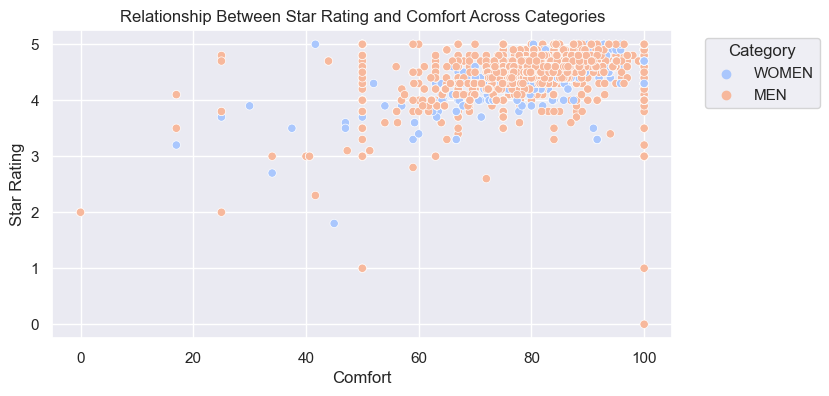

In [107]:
col = 'comfort'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='Comfort', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and Comfort Across Categories', 
                                   palette='coolwarm')

The highest comfort ratings correspond to star ratings above 3.5.

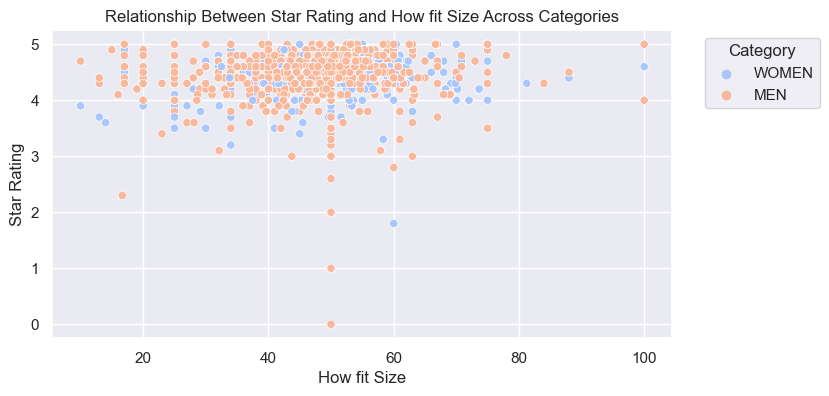

In [108]:
col = 'size'
plot_scatter_target_r_according_to(col, y_col='star_rating', category_col='Category_gral',
                                   xlabel='How fit Size', ylabel='Star Rating', cat_label='Category',
                                   title='Relationship Between Star Rating and How fit Size Across Categories', 
                                   palette='coolwarm')

The highest ratings regarding how well the shoe fits are generally in the range of 40% to 60%, with a star rating of over 4 in most cases. However, despite a high star rating, it doesn't necessarily imply in all cases that the shoe is rated as fitting well. This discrepancy could be due to missing data for this fitting parameter in some instances.

#### 1.4.2.6 Price  according to the Category and Other colors

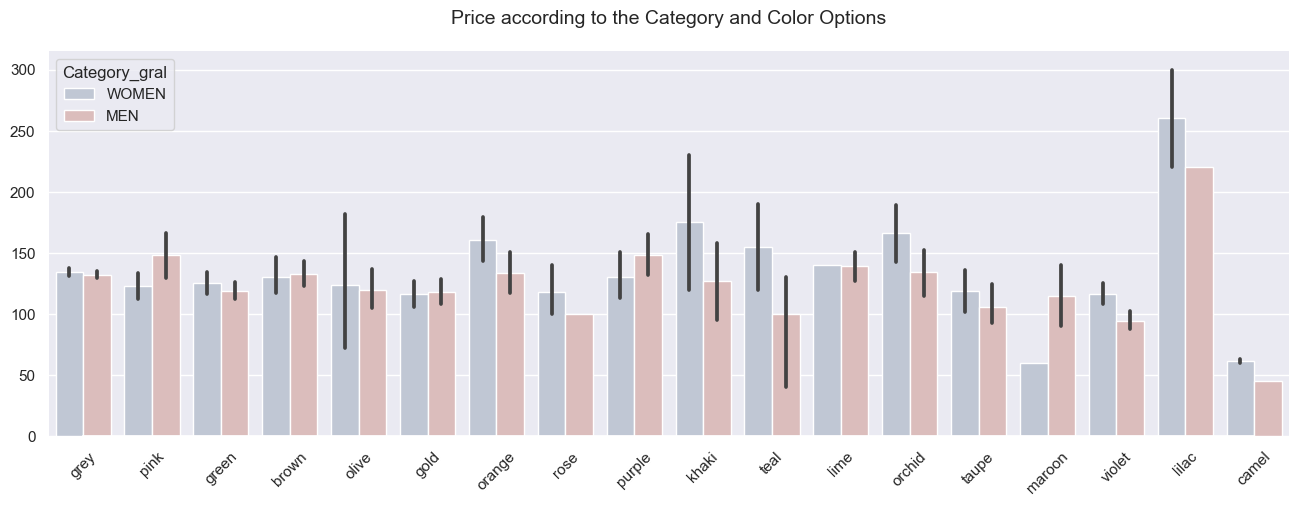

In [109]:
plt.figure(figsize=(16,5))
sns.barplot(x='other_color', y='price', hue='Category_gral', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
# plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Price according to the Category and Color Options', size=14, y=1.05)
plt.show()

Shoes in lilac tend to have a higher price, especially those designed for women. Meanwhile, shoes in camel colors tend to be priced lower, but once again, those for women are priced higher.

#### 1.4.2.7 Discounted Price  according to the Category and Other colors

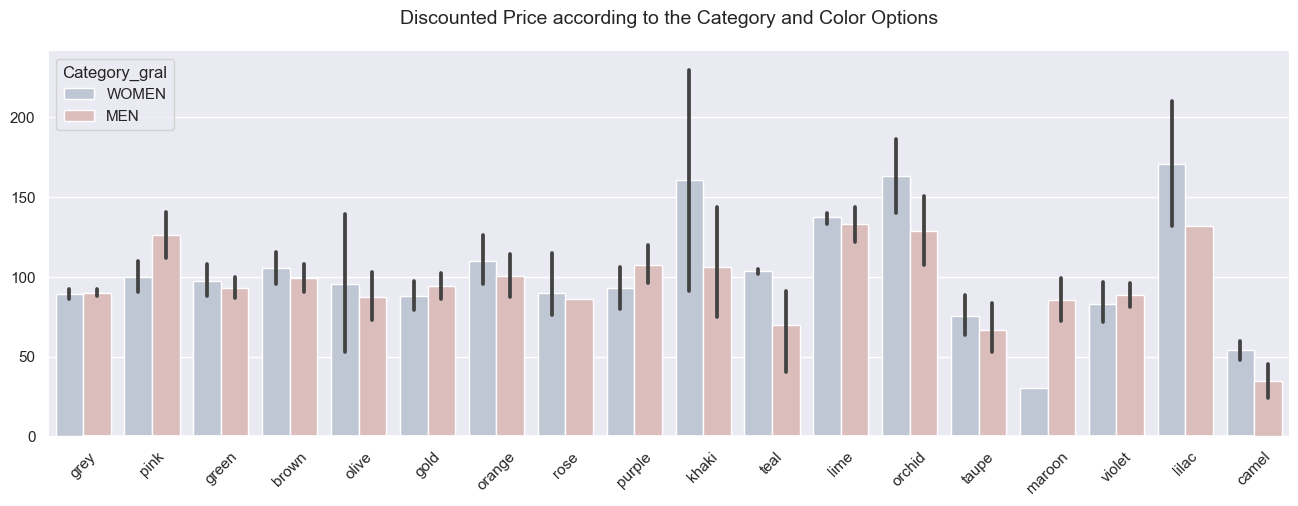

In [110]:
plt.figure(figsize=(16,5))
sns.barplot(x='other_color', y='price_reduce', hue='Category_gral', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
# plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Discounted Price according to the Category and Color Options', size=14, y=1.05)
plt.show()

Comparing with the regular price, we can observe differences in the patterns. We notice that lilac shoes consistently top the list for higher prices, but closely following are orchid and khaki, especially in the women's category.

#### 1.4.2.8 Star Rating  according to the Category and Other colors

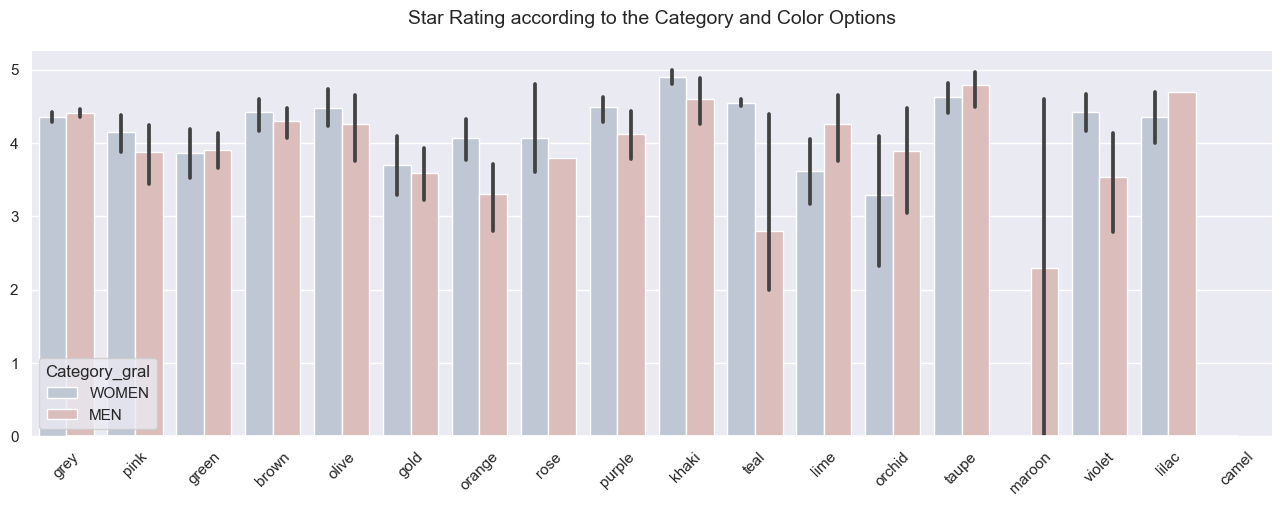

In [111]:
plt.figure(figsize=(16,5))
sns.barplot(x='other_color', y='star_rating', hue='Category_gral', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
# plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Star Rating according to the Category and Color Options', size=14, y=1.05)
plt.show()

The majority of shoes, both for men and women and across different color varieties, tend to have a star rating of around 4, with some exceptions. This is evident in cases such as men's brown and khaki shoes, which have a star rating lower than 3.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Pairplot

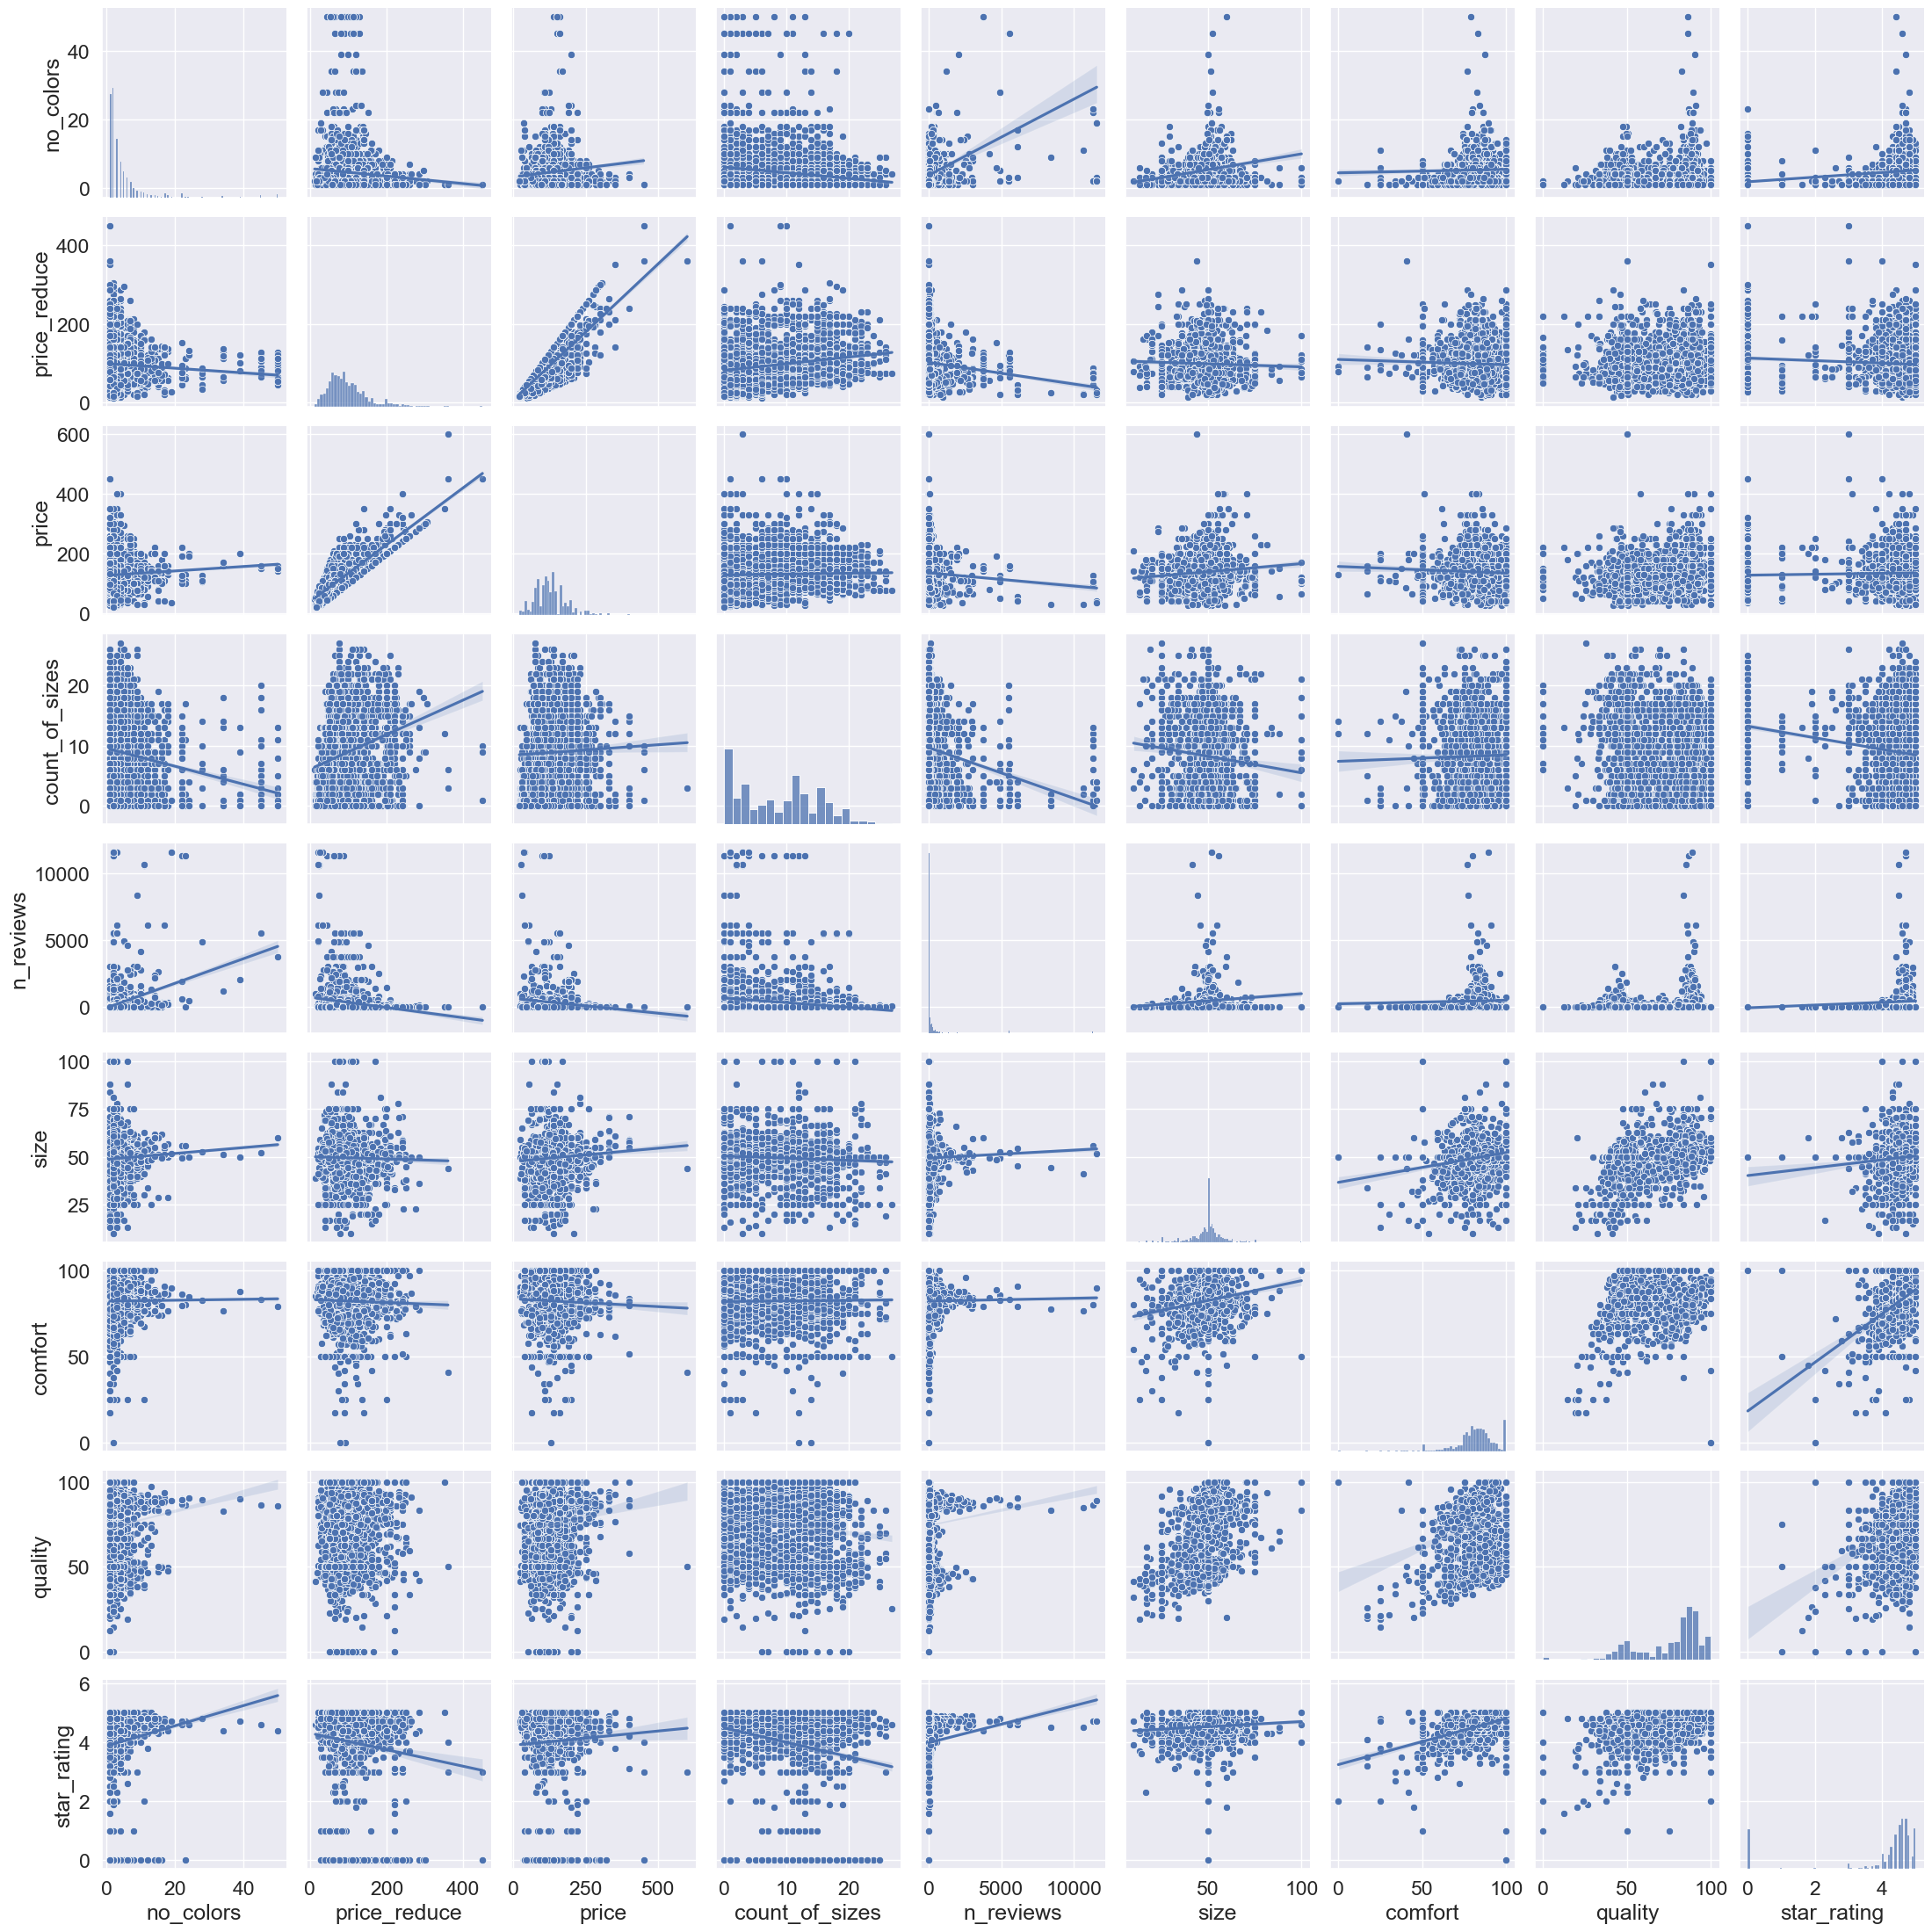

In [112]:
df_pp = df.drop(['color_1','color_2','color_3', 'color_4', 'Category'], axis=1)
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

We observe a positive correlation between 'star_rating' and 'price,' 'no_colors,' 'n_reviews,' and 'comfort,' as well as a negative correlation between 'star_rating' and 'price_reduce.'

When analyzing 'price,' we notice a positive correlation with 'price_reduce' and 'size.' Conversely, there is a negative correlation between 'price' and 'n_reviews.'

Turning our attention to 'price_reduce,' we identify a positive correlation with 'price.' Also, there is a negative correlation between 'price' and 'n_reviews.'

#### 1.4.3.2 Correlation between 'Average Cost for Two' and 'Price range' with independent variables

In [113]:
# Calculate the correlation between features
cor = df.corr()
cor

no_colors  price_reduce     price  count_of_sizes  n_reviews  \
no_colors        1.000000     -0.080546  0.088619       -0.156372   0.451422   
price_reduce    -0.080546      1.000000  0.814500        0.220618  -0.145249   
price            0.088619      0.814500  1.000000        0.031293  -0.098988   
count_of_sizes  -0.156372      0.220618  0.031293        1.000000  -0.171678   
n_reviews        0.451422     -0.145249 -0.098988       -0.171678   1.000000   
size             0.118973     -0.030835  0.086514       -0.079237   0.066317   
comfort          0.016776     -0.034683 -0.044817        0.019587   0.020778   
quality          0.175897     -0.111673  0.120746       -0.153453   0.125161   
star_rating      0.152078     -0.095076  0.038453       -0.216372   0.113458   

                    size   comfort   quality  star_rating  
no_colors       0.118973  0.016776  0.175897     0.152078  
price_reduce   -0.030835 -0.034683 -0.111673    -0.095076  
price           0.086514 -0.044817  0.120746     0.038453  
count_of_sizes -0.079237  0.019587 -0.153453    -0.216372  
n_reviews       0.066317  0.020778  0.125161     0.113458  
size            1.000000  0.189976  0.438381     0.083702  
comfort         0.189976  1.000000  0.267602     0.469181  
quality         0.438381  0.267602  1.000000     0.304906  
star_rating     0.083702  0.469181  0.304906     1.000000

In [114]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='price') &  (corr_df['Feature B'] != 'price')]

Feature A       Feature B  Corr coef
10     price    price_reduce   0.814500
31     price         quality   0.120746
38     price       no_colors   0.088619
40     price            size   0.086514
46     price     star_rating   0.038453
47     price  count_of_sizes   0.031293
59     price         comfort  -0.044817
68     price       n_reviews  -0.098988

Clearly, there is a correlation between 'price' and 'price_reduce' due to the nature of these features. However, when constructing the model, only one of these features will be considered as the target, and the other must be discarded.

In addition to this, the correlation analysis indicates a weak positive relationship between the target variable 'price' and the following features: 'quality,' 'no_colors,' and 'size.'

In [115]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='price_reduce') &  (corr_df['Feature B'] != 'price_reduce')]

Feature A       Feature B  Corr coef
9   price_reduce           price   0.814500
22  price_reduce  count_of_sizes   0.220618
55  price_reduce            size  -0.030835
58  price_reduce         comfort  -0.034683
63  price_reduce       no_colors  -0.080546
65  price_reduce     star_rating  -0.095076
70  price_reduce         quality  -0.111673
71  price_reduce       n_reviews  -0.145249

After the correlation analysis of the target feature 'price_reduce,' we can determine that it exhibits a weak positive relationship with 'count_of_sizes'.

In [116]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='star_rating') &  (corr_df['Feature B'] != 'star_rating')]

Feature A       Feature B  Corr coef
11  star_rating         comfort   0.469181
18  star_rating         quality   0.304906
27  star_rating       no_colors   0.152078
36  star_rating       n_reviews   0.113458
42  star_rating            size   0.083702
45  star_rating           price   0.038453
66  star_rating    price_reduce  -0.095076
79  star_rating  count_of_sizes  -0.216372

The correlation analysis reveals a moderately positive relationship between the target variable 'star_rating' and the following features: 'comfort,' 'quality,' 'no_colors,' and 'n_reviews.' Additionally, there is a negative correlation with 'count_of_sizes.'

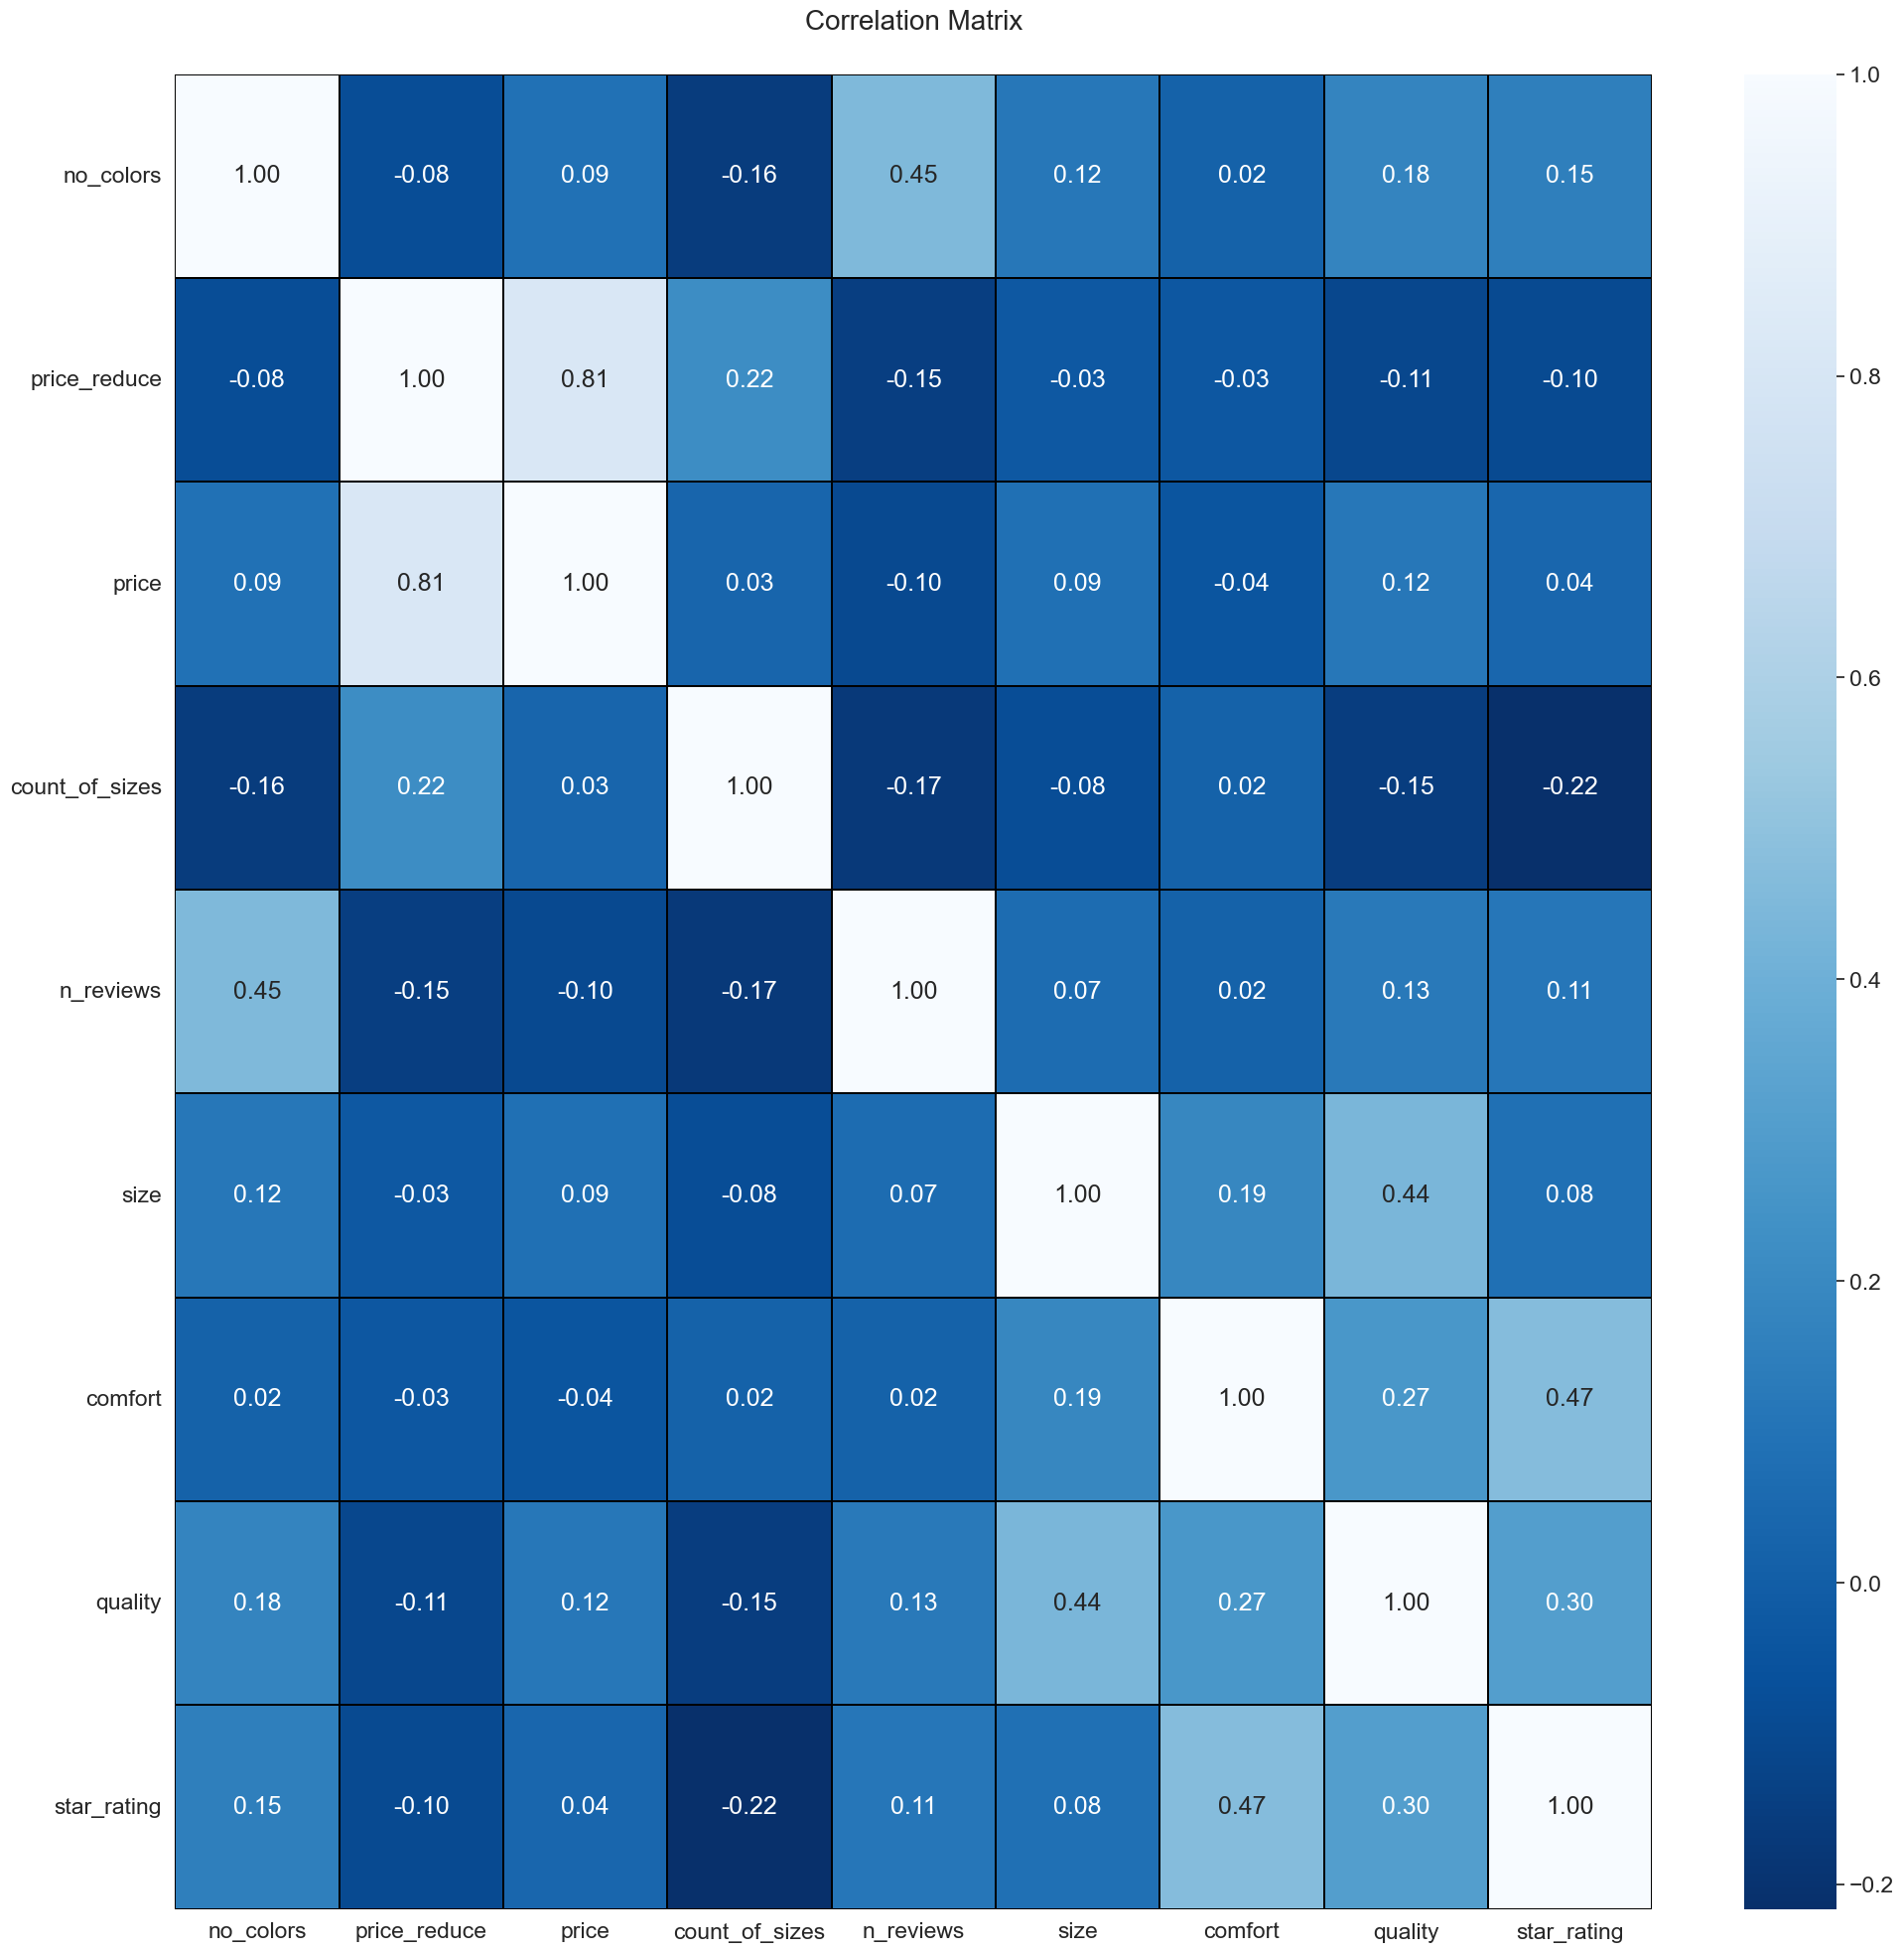

In [117]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.set(font_scale=1.5)

sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap illustrates the correlation matrix, revealing relationships between features as well as between features and the target variable.
- The heatmap illustrates both positive and negative correlations.
- The variable 'Price' shows a weak correlation with all other variables, except with 'price_reduce' due to the nature of these two features.
- The 'star_rating' variable exhibits a significant positive correlation with 'comfort' (+0.47), 'quality' (+0.30), and a negative correlation with 'count_of_sizes' (-0.22).
- The variable 'price_reduce' demonstrates a weak positive correlation with 'count_of_sizes' (+0.22).
- Other variables that show correlations include:
  * 'no_colors' with 'n_reviews' (+0.45)
  * 'quality' with 'size' (+0.44)

In [118]:
df.head()

ShoeName Category  no_colors  price_reduce  price  \
0                                NaN    Women        1.0        115.00  115.0   
1                   Nike Gamma Force    Women        9.0         72.97   90.0   
2  Nike Court Vision Low Next Nature    Women        6.0         60.97   80.0   
3                   Nike Air Max 270    Women       12.0        120.97  160.0   
4                     Nike Air Max 1    Women        6.0        140.00  140.0   

  product_code  count_of_sizes color_1 color_2 color_3  ... n_reviews  size  \
0   DD1503-101              13   Black     NaN   White  ...     617.0  49.0   
1   DX9176-101              15   Black    Blue   White  ...     147.0  61.0   
2   DH3158-107              15   Black    Blue   White  ...     199.0  59.0   
3   DZ7736-002              15   Black    Blue   White  ...       2.0   NaN   
4   DZ2628-102              13   Black    Blue   White  ...      70.0  43.0   

   comfort  quality  star_rating  Category_gral  color_1_  color_2_ color_3_  \
0     78.0    44.66          4.8          WOMEN     Black  Not Blue    White   
1     75.0    50.78          4.5          WOMEN     Black      Blue    White   
2     78.0    46.67          4.6          WOMEN     Black      Blue    White   
3      NaN      NaN          5.0          WOMEN     Black      Blue    White   
4     78.0    54.62          4.6          WOMEN     Black      Blue    White   

  color_4_  
0  Not Red  
1      Red  
2  Not Red  
3  Not Red  
4  Not Red  

[5 rows x 22 columns]

# 2. Preprocessing Data
## 2.1 Missing values
In Section 1.2, it was identified that the dataset contains missing values. In the following steps, we will address this issue.

In [120]:
df_backup1 = df.copy()

In [164]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
ShoeName                  1          0.02
Category                  0          0.00
no_colors                12          0.29
price_reduce             16          0.38
price                    16          0.38
product_code             26          0.62
count_of_sizes            0          0.00
color_1                 909         21.71
color_2                2373         56.68
color_3                 821         19.61
color_4                2654         63.39
other_color            1213         28.97
n_reviews               321          7.67
size                   1299         31.02
comfort                1261         30.12
quality                 876         20.92
star_rating             321          7.67
Category_gral             0          0.00
color_1_                  0          0.00
color_2_                  0          0.00
color_3_                  0          0.00
color_4_                  0          0.00

### 2.1.1 Impute other_color column with 'color_1', 'color_2', 'color_3', 'color_4'

In [165]:
# First obtain the indexes of the rows with other_column = null
indexes = df[df['other_color'].isna()].index
df.loc[indexes][['other_color','color_1', 'color_2', 'color_3', 'color_4' ]]

other_color color_1 color_2 color_3 color_4
0            NaN   Black     NaN   White     NaN
8            NaN   Black     NaN   White     NaN
18           NaN   Black     NaN   White     NaN
22           NaN   Black     NaN   White     NaN
59           NaN   Black     NaN   White     NaN
...          ...     ...     ...     ...     ...
4393         NaN   Black    Blue     NaN     Red
4394         NaN   Black     NaN   White     NaN
4395         NaN   Black    Blue     NaN     NaN
4400         NaN     NaN    Blue     NaN     NaN
4420         NaN   Black    Blue     NaN     NaN

[1213 rows x 5 columns]

In [166]:
colors_columns = ['color_1', 'color_2', 'color_3', 'color_4']
other_color_column = 'other_color'

# Iter according to priority
for color_column in colors_columns:
    # Fill null values in 'other_color' with color_column value 
    df[other_color_column] = df[other_color_column].combine_first(df[color_column])

In [167]:
df.loc[indexes][['other_color','color_1', 'color_2', 'color_3', 'color_4' ]]

other_color color_1 color_2 color_3 color_4
0          Black   Black     NaN   White     NaN
8          Black   Black     NaN   White     NaN
18         Black   Black     NaN   White     NaN
22         Black   Black     NaN   White     NaN
59         Black   Black     NaN   White     NaN
...          ...     ...     ...     ...     ...
4393       Black   Black    Blue     NaN     Red
4394       Black   Black     NaN   White     NaN
4395       Black   Black    Blue     NaN     NaN
4400        Blue     NaN    Blue     NaN     NaN
4420       Black   Black    Blue     NaN     NaN

[1213 rows x 5 columns]

#### Checking for remaining null values in other_color

In [168]:
print(f"There are still {df['other_color'].isna().sum()} null values in column other_color.")
df[df['other_color'].isna()][['other_color','color_1', 'color_2', 'color_3', 'color_4' ]]

There are still 75 null values in column other_color.


other_color color_1 color_2 color_3 color_4
153          NaN     NaN     NaN     NaN     NaN
333          NaN     NaN     NaN     NaN     NaN
448          NaN     NaN     NaN     NaN     NaN
848          NaN     NaN     NaN     NaN     NaN
851          NaN     NaN     NaN     NaN     NaN
...          ...     ...     ...     ...     ...
4174         NaN     NaN     NaN     NaN     NaN
4176         NaN     NaN     NaN     NaN     NaN
4188         NaN     NaN     NaN     NaN     NaN
4203         NaN     NaN     NaN     NaN     NaN
4219         NaN     NaN     NaN     NaN     NaN

[75 rows x 5 columns]

For the remaining 75, we will use the mode to impute the null values

In [169]:
# Calculate the mode of the 'other_color' column
most_frequent_value = df['other_color'].mode()[0]

# Impute the missing values in 'other_color' with the most frequent value
df['other_color'] = df['other_color'].fillna(most_frequent_value)

### 2.1.2 Impute price and price_reduce
We will utilize the product_code to initially impute the price. Subsequently, we will employ the detailed category for the remaining null values.

In [170]:
# impute the null values of price and price_reduce based on the 'product_code'
df['price'] = df['price'].fillna(df.groupby('product_code')['price'].transform('mean'))

# then by category
df['price'] = df['price'].fillna(df.groupby('Category')['price'].transform('mean'))

In [171]:
# Impute null values in 'price_reduce' with values from 'price' column
df['price_reduce'] = df['price_reduce'].fillna(df['price'])

### 2.1.3 Impute the numerical columns

We wil use the 'Category' column to group and calculate the mean in order to impute null values in following columns: 'no_colors','n_reviews', 'size', 'comfort', 'quality', 'star_rating'

In [172]:
df_backup2 = df.copy()

In [177]:
df = df_backup2.copy()

In [178]:
columns_to_impute = ['no_colors', 'n_reviews', 'size', 'comfort', 'quality', 'star_rating']

for col in columns_to_impute:
    df[col] = df[col].fillna(df.groupby('Category')[col].transform('mean'))

In [179]:
# LIst the remaining null values.
df[['no_colors', 'n_reviews', 'size', 'comfort', 'quality', 'star_rating']].isna().sum().to_frame('Remaining null values')

Remaining null values
no_colors                        1
n_reviews                        0
size                             1
comfort                          1
quality                        437
star_rating                      0

The remaining null values in quality will be impute with the average of the mean.

In [183]:
# Calculate the mean
mean_quality = df['quality'].mean()

# Fill the null values in 'quality' with the mean 
df['quality'].fillna(mean_quality, inplace=True)

Same in 'no_colors', 'size', and 'comfort'. Remains just one value per column.

In [185]:
for col in ['no_colors', 'size', 'comfort']:
    # Calculate the mean
    mean_val = df[col].mean()

    # Fill the null values with the mean 
    df[col].fillna(mean_val, inplace=True)

### 2.1.4 Deleting columns that were replaced

The columns 'color_1', 'color_2', 'color_3', and 'color_3' were replaced with binary columns named 'color_1_', 'color_2_', 'color_3_', and 'color_3_'. Additionally, the 'Category' column was generalized as 'Category_gral'. Consequently, we will proceed to drop these columns.

In [188]:
df.drop(['color_1','color_2','color_3', 'color_4', 'Category'], axis=1, inplace=True)

In [189]:
df.head()

ShoeName  no_colors  price_reduce  price  \
0                                NaN        1.0        115.00  115.0   
1                   Nike Gamma Force        9.0         72.97   90.0   
2  Nike Court Vision Low Next Nature        6.0         60.97   80.0   
3                   Nike Air Max 270       12.0        120.97  160.0   
4                     Nike Air Max 1        6.0        140.00  140.0   

  product_code  count_of_sizes other_color  n_reviews       size    comfort  \
0   DD1503-101              13       Black      617.0  49.000000  78.000000   
1   DX9176-101              15        grey      147.0  61.000000  75.000000   
2   DH3158-107              15        pink      199.0  59.000000  78.000000   
3   DZ7736-002              15       green        2.0  46.057604  81.911765   
4   DZ2628-102              13        grey       70.0  43.000000  78.000000   

     quality  star_rating Category_gral color_1_  color_2_ color_3_ color_4_  
0  44.660000          4.8         WOMEN    Black  Not Blue    White  Not Red  
1  50.780000          4.5         WOMEN    Black      Blue    White      Red  
2  46.670000          4.6         WOMEN    Black      Blue    White  Not Red  
3  60.303841          5.0         WOMEN    Black      Blue    White  Not Red  
4  54.620000          4.6         WOMEN    Black      Blue    White  Not Red

### 2.1.5 Impute ShoeName and product_code

In [192]:
for col in ['ShoeName', 'product_code']:
    
    # Calculate the mode 
    most_frequent_value = df[col].mode()[0]

    # Fill the null values with the mode 
    df[col].fillna(most_frequent_value, inplace=True)

### 2.1.6 Last check for missing values

In [194]:
 df.isnull().sum().sum()

0

No missing values to remove.

In [ ]:
Aqui

## 2.2 Feature Engineering

### 2.2.3 Encoding binary columns

<!-- df_backup2 = df.copy() -->

In [ ]:
# Listing the unique values to encode 
features = ['Has Table booking', 'Has Online delivery', 'Is delivering now',]
for col in features:
    print(f"Unique values for {col}: {df[col].unique()}")
    
    # Encoding the YES/NO categorical values
    df[col] = df[col].map({'No': 0, 'Yes': 1})
    
    # Listing the encoded values to encode 
    print(f"Encoded values for {col}: {df[col].unique()}\n")

The columns 'Has Table Booking', 'Has Online Delivery', and 'Is Delivering Now' have been encoded with values of 1 to represent 'Yes' and 0 to represent 'No'.

### 2.2.4 Encoding categorical columns 

To encode the categorical features we will use LabelEncoder.

During the Exploratory Data Analysis (EDA), it became evident that there is a correspondence relationship between 'Rating color' and 'Rating text.' Consequently, we have decided to retain only the 'Rating text' feature. Additionally, given that we already have the encoded numerical representation of 'Country' through the 'Country Code' in the dataset, we will drop the 'Rating color' and 'Country' columns.

In [ ]:
# Add 'Country' and 'Rating color' columns in the list of columns to drop
cols_to_drop.append('Country')
cols_to_drop.append('Rating color')

encoding_col = [ 'City', 'Currency', 'Rating text']
encoding_col

In [ ]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_col:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: \n{category_mappings[col]}\n")
    
display(df.head())
display(df.tail())

We have converted the categorical columns into numerical columns using LabelEncoder method.  

### 2.2.5   Feature engineering: Clustering Longitude and Latitud

To reduce dimensionality and capture location patterns, we plan to employ unsupervised learning clustering algorithms, specifically KMeans. However, before applying KMeans, we need to determine the optimal value for K, the number of clusters. We will use two techniques for this purpose: the Elbow Method and the Silhouette Score.

##### Silhouette Score
The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Choose the K that maximizes the silhouette score, corresponding to the peak in the silhouette score plot.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit KMeans for a range of K values
k_values = range(2, 11)
silhouette_scores = []
location_columns = ['Longitude', 'Latitude']

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[location_columns])
    silhouette_scores.append(silhouette_score(df[location_columns], labels))

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()


##### Elbow Method:

After fitting the KMeans algorithm with a range of K values, for each K, compute the sum of squared distances from each point to its assigned center. Plot the sum of squared distances against K, and look for the "elbow" point in the plot, where the rate of decrease sharply changes.

The "elbow" is where you might see a bend or a significant change in the slope of the curve.


In [ ]:
# Fit KMeans for a range of K values
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[location_columns])
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()


##### Create the clusters 
We applied the KMeans algorithm with a range of K=6 values to create the 'LocationCluster' based on the 'Latitude' and 'Longitude' columns.

In [ ]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K, random_state=42)
df['LocationCluster'] = kmeans.fit_predict(df[location_columns])

In [ ]:
df['LocationCluster'].value_counts()

##### Plotting the clusters

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10, 6))

for cluster in range(K):
    cluster_data = df[df['LocationCluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1)) 
plt.show()


In [ ]:
# Add 'Longitude' and 'Latitud' column in the list of columns to drop
cols_to_drop.append('Longitude')
cols_to_drop.append('Latitude')
print(f"Columns to drop: {cols_to_drop}")

### 2.2.6 Grouping and Aggregating Categories based on 'Cuisines' feature

Grouping or Aggregating Categories: You can group or aggregate categories that share similar characteristics. This can reduce the number of unique values and make the variable more manageable.

<!-- df_backup3 = df.copy() -->

In [ ]:
# Get all the unique categories of cuisines
all_cuisines = set()
for cuisines in df['Cuisines'].str.split(', '):
    all_cuisines.update(cuisines)

# Create binary columns for each category of cuisines
for cuisine in all_cuisines:
    df[cuisine] = df['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

# Add 'Cuisines' column in the list of columns to drop
cols_to_drop.append('Cuisines')

In [ ]:
# Show the new features
display(df[list(all_cuisines)])

### 2.2.7 Drop unnecessary columns

In [ ]:
# List object variables
df.select_dtypes(include='object').columns.tolist()

<!-- df_backup4 = df.copy() -->

In [ ]:
# Drop all non-needed columns
print(f"Following columns: {cols_to_drop} will be dropped.")
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"The new dimension of the dataset: {df.shape}")

In [ ]:
df.head()

Now, the studied dataframe has 9542 rows and 159 columns.

## 2.3  Removing outliers

<!-- df_backup5 = df.copy() -->

In [ ]:
features_with_outliers = ['Average Cost for two', 'Aggregate rating','Votes']
features_with_outliers

We selected the features with outliers from the Univariate Analysis and considered only the continuous ones. The outliers in the target variable would not be removed.

In [ ]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z

In [ ]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")

df = df_new.copy()
df

Since we can not afford to lose more than 10% of the data, we have selectively retained the continuous variables with outliers based on the Univariate Analysis. Adopting a threshold of 3, the data culling process resulted in a loss of only 1.98%. As a consequence, our current dataset comprises 9,353 rows and 159 columns.

## 2.4 Skewness Correction

In [ ]:
# Checking the skewness in the data - we do not considere the created columns based on Cuisine since are categorical
df_skew = df.drop(list(all_cuisines),axis=1).skew().sort_values(ascending=False).to_frame("Skew")
df_skew

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

We do not considere the created columns based on Cuisine since are categorical

In [ ]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[abs(df_skew['Skew']) > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

We will focus on the numerical columns 'Aggregate rating','Average Cost for Two' and 'Votes.' It's important to note that 'Average Cost for Two' serves as the target variable for the initial prediction task. Therefore, any transformations applied to it during modeling should be reversed after making predictions.

In [ ]:
skew_columns = ['Aggregate rating', 'Average Cost for two', 'Votes']
skew_columns

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [ ]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness.

In [ ]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

In [ ]:
df_comp

For each skewness column, we obtain the better transform method. We can observe as follows:
* cube-root transform method is better for columns 'Average Cost for two' and 'Votes'.
* do no apply any transform method is better for columns 'Aggregate rating', 'Votes'.

<!-- df_backup6 = df.copy() -->

In [ ]:
# Cube-root method Transform  
df['Average Cost for two'] = np.cbrt(df['Average Cost for two'])
df['Votes'] = np.cbrt(df['Votes'])

In [ ]:
# This is the new skewness for the transformed columns
df[skew_columns].skew()

After updating the df dataset with the corresponding transform method, we can continue with the analysis.

In [ ]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label
#### 2.5.1.1 Separating features for regression model to predict Average Cost for two 

In [ ]:
# Separating the independent and target variables into x and y 
x = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

#### 2.5.1.2 Separating features for classification model to predict Price range

In [ ]:
# Separating the independent and target variables into x and y 
x2 = df.drop(['Price range'], axis=1)
y2 = df['Price range']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

### 2.5.2 Scaling Data
#### 2.5.2.1 Scaling the data for regression model to predict Average Cost for two

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model 1 to predict Average Cost for two {'*'*30}")
display(x.head())

#### 2.5.2.2 Scaling the data for classification model to predict Price range

In [ ]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for regression model 2 to predict Price range {'*'*30}")
display(x2.head())

## 2.6 Muticollinearity Analysis and Feature Selection


### 2.6.1 Checking Variance Inflation Factor (VIF)

#### 2.6.1.1 Checking VIF for regression model 1 to predict Average Cost for two 

In [ ]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Upon examining the Variance Inflation Factor (VIF) values, we identified certain features that exhibit multicollinearity:

- Malaysian (VIF: 32.260764)
- Malay (VIF: 31.944276)
- Indian (VIF: 14.534695)
- North Indian (VIF: 12.918888)

VIF values greater than 10 suggest a high correlation among these features. To address this issue, we will begin by dropping one of the columns. If the multicollinearity persists, we will then consider removing the column with the highest VIF.

Subsequently, we will analyze the correlation of the remaining features with the target variable in the context of our project.

In [ ]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'Average Cost for two') & (corr_df['Feature B'].isin(['Malaysian', 'Malay', 'Indian', 'North Indian'])) ]

In [ ]:
# Saving a backup of x
x_backup = x.copy()

In [ ]:
# Dropping the columns with multicollinearity
x = x.drop(['Malay', 'Indian'], axis=1) 

We drop the 'Malay' and 'Indian' columns to solve the multicollinearity problem since the first one was the second with higher VIF value, then the feature remaining highest VIF value.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Dropping the 'Malay' and 'Indian' columns solved the multicollinearity issue. We can now move ahead with model building. 

#### 2.6.1.1 Checking VIF for classification model to predict RainTomorrow

In [ ]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Upon examining the Variance Inflation Factor (VIF) values, we identified certain features that exhibit multicollinearity:

- Malaysian (VIF: 32.262503)
- Malay (VIF: 31.947120)
- Indian (VIF: 14.546492)
- North Indian (VIF: 12.941748) 

VIF values greater than 10 suggest a high correlation among these features. To address this issue, we will begin by dropping one of the columns. If the multicollinearity persists, we will then consider removing the column with the highest VIF.
Subsequently, we will analyze the correlation of the remaining features with the target variable in the context of our project.

In [ ]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'Price range') & (corr_df['Feature B'].isin(['Malaysian', 'Malay', 'Indian', 'North Indian'])) ]

In [ ]:
# Saving a backup of x
x2_backup = x2.copy()

In [ ]:
# Dropping the columns with multicollinearity
x2 = x2.drop(['Malay', 'Indian'] , axis=1) 

We drop the 'Malay' and 'Indian' columns to solve the multicollinearity problem since the first one was the second with higher VIF value, then the feature remaining highest VIF value.

In [ ]:
vif = pd.DataFrame()
vif['Features'] = x2.columns
vif['VIF values'] = [variance_inflation_factor(x2.values, i) for i in range(len(x2.columns))]

vif.sort_values(by='VIF values', ascending=False)

Dropping the 'Malay' and 'Indian' columns solved the multicollinearity issue. We can now move ahead with model building. 

## 2.7 Balancing the Dataset for Classification model
As we see previously in the Section 1.4.1.2. The dataset was imbalance. So, we are going to apply SMOTE for oversampling the data.

In [ ]:
# Count the frequencies of target
target_counts = y2.value_counts()

# Create a pie plot
sns.set(font_scale=1)
sns.set_palette('vlag')
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['1','2','3', '4'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Price range", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
x2.shape

In [ ]:
target_counts

After data processing, the dataset remains imbalanced, as depicted in the plot above.

In [ ]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(x2, y2)

In [ ]:
# Count the frequencies of target
target_counts = Y.value_counts()

# Create a pie plot
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['1','2','3', '4'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Price range", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
X.shape

The data is balanced, enabling the construction of machine learning classification models.

# 3. Modeling for predicting Average Cost for two

In [ ]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [ ]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [ ]:
%%time
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Linear Regression model achieved 83.84% as the R2 score.

Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

## 3.3 Regression Algoritms

In [ ]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [ ]:
eval_model

### 3.3.1 Linear Regression

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.2 Random Forest Regressor

In [ ]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.3 Decision Tree Regressor

In [ ]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.4 K Neighbors Regressor

In [ ]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.5 Gradient Boosting Regressor

In [ ]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.6 Lasso

In [ ]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.7 Ridge

In [ ]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

### 3.3.8 Support Vector Regressor

In [ ]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

In [ ]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

From the summary of the models results and comparing the cross-validation scores (CV_Mean) and R2 score (test), we conclude Random Forest Regressor is our best-performing model since the two metrics are very close (Difference: -3.307889e-03), this indicates that the model is performing consistently on both the test set and across different folds in cross-validation.

This consistency is a positive sign, suggesting that the model generalizes well to new data.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Random Forest Regressor

In [ ]:
random_state

In [ ]:
RandomForestRegressor().get_params()

In [ ]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

In [ ]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

These are the best parameters for training the model.

In [ ]:
best_model

## 3.5 Final Regression Model to predict Average Cost for two

In [ ]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

### 3.5.1 Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/avcost42_regressor_model.pkl")

### 3.5.2  Predicting the saved model

In [ ]:
# Lets load the saved model and get the predictions
model = joblib.load("models/avcost42_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)

# Since we transformed the target variable with the cube-root transform method
df_result['Predicted_final'] = np.power(prediction,3)
df_result['Original_final'] = np.power(np.array(y_test),3)

df_result.T

These are the predicted values in a dataset to compared the prediction with the test data with R2 score 90.504%.

Since we transformed the 'Average Costo for two' target variable with the cube-root transform method, we need to reverse the transformation with the predicted values, stored in Predicted_final.

# 4. Modeling for predicting Price range

## 4.1 Finding the best random state

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [ ]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 98.18% at random_state 93

## 4.2 Creating train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

## 4.3 Classification Algorithms¶

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [ ]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}

### 4.3.1 RandomForestClassifier 

In [ ]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

### 4.3.2 Extra Trees Classifier

In [ ]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

### 4.3.3 Logistic Regression

In [ ]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

### 4.3.4 Support Vector Machine Classifier

In [ ]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

### 4.3.5 Gradient Boosting Classifier

In [ ]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

### 4.3.6 AdaBoost Classifier

In [ ]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

### 4.3.7 Bagging Classifier

In [ ]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

## 4.4 Comparing models
### 4.4.1 Comparing accuracy of each model

In [ ]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

In [ ]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='vlag')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

The model with the best accuracy is RandomForestClassifier with 98.1572% of accuracy.

### 4.4.2 Cross validation score
In order to evaluate the performance of the models we are going to user Cross-validation technique.

In [ ]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [ ]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [ ]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff

In [ ]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

After applying cross-validation technique we observe the better cross-validation score is for RandomForestClassifier and the difference with accuracy score is 0.036468 confirming as follows:

**RandomForestClassifier is our best Model**

## 4.5 Hyper Parameter Tuning
### 4.5.1 Finding the best parameters for RandomForestClassifier

In [ ]:
random_state

In [ ]:
model = RandomForestClassifier()
model.get_params()

In [ ]:
np.arange(25, 310, 5)

In [ ]:
# RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
             'n_estimators': np.arange(100, 305, 5),  # 1.Vary the number of trees default 100
             'max_features': ['sqrt', 'log2', None], # 2. default 'sqrt'
             'max_depth': [None] + list(np.arange(80, 110, 10)),  # 3.maximum depth of trees default None 
             'max_leaf_nodes': [9, 12, 30], # 4. Restrics the grow of each tree default None,
             'min_samples_split': np.arange(2, 5),  # 6.minimum samples required to split default=2
    
#              'criterion':['gini','entropy'],
#              'random_state': [random_state, 50, 500, 1000],
#              'n_jobs': [-1, 1]
             }

# Build the model 
model = RandomForestClassifier()

In [ ]:
%%time 

# Perform search with cross validation
# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   random_state=random_state, n_jobs=-1)
# Fit the model 
random_search.fit(x_train, y_train)

In [ ]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model_ht = random_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
display(best_params)

These are the best parameters for training the model.

In [ ]:
best_model_ht

## 4.6 Final Model

In [ ]:
%%time
# Create the model with the best parameters
best_model = RandomForestClassifier (
                                   max_depth = None,
                                   max_features = None,
                                   max_leaf_nodes = 30, 
                                   min_samples_split = 2,
                                   n_estimators = 265,
)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

Above, the prediction model with the parameters we obtained as best parameters after the hyper-tunning process.

In [ ]:
# Create the model with the best parameters
best_model = RandomForestClassifier (
                                   max_depth = None,
                                   max_features = 'sqrt',
                                   max_leaf_nodes = None, 
                                   min_samples_split = 2,
                                   n_estimators = 265,
)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

Adjusting the following parameters we improve the accuracy_score to 98.48% for the prediction model for 'Price range', as follows:
- max_features = 'sqrt'
- max_leaf_nodes = None

## 4.6.1 Comparing ROC Curves and AUC Scores for Our Model Across Classes

Generate ROC curves and compare the Area Under the Curve (AUC) for each class to assess the performance of our selected model. This analysis aims to provide insights into the model's performance across different classes. We will utilize the OneVsRestClassifier approach.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
# Create the classifier
classifier = OneVsRestClassifier(best_model)

# Train the model
classifier.fit(x_train, y_train)

# Get the decision function scores for each class
y_score = classifier.predict_proba(x_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}

target = 'Price range'
classes = best_model.classes_

for i in range(len(clases)):
    fpr[i], tpr[i], _ = roc_curve(y_test == classes[i], y_score[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot the ROC curves
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# one color for each category
colors = ['b', 'g', 'r', 'c']

# Plot a roc curve for each category
for i, ax, color in zip(range(len(classes)), axes.flat, colors):
    class_name = classes[i]
    sns.lineplot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:0.2f}) for {target} {class_name}', ax=ax)
#     ax.set_xticks([])

# style plot
axes[1,0].set_xlabel('False Positive Rate', size=10, labelpad=8)
axes[1,1].set_xlabel('False Positive Rate', size=10, labelpad=8)

axes[0,0].set_ylabel('True Positive Rate', size=10, labelpad=8)
axes[1,0].set_ylabel('True Positive Rate', size=10, labelpad=8)

fig.suptitle('Receiver Operating Characteristic (ROC) for Best Model', fontsize=12, y=1)

plt.subplots_adjust(hspace=0.2)
plt.show()

Here, we are examining the Area Under the Curve (AUC) for each predicted class in our best-performing model. The AUC values for nearly all classes are either close to 1 or equal to 1, which is favorable. This indicates that the model exhibits high discriminatory capability or precision in distinguishing between different classes.

### 4.6.3 Saving the model

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/price_range_cl_model.pkl")

### 4.6.4  Predicting the saved model

In [ ]:
# Lets load the saved model and get the predictions
model = joblib.load("models/price_range_cl_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

These values represent the predictions on the fraction of the dataset reserved for testing, enabling a comparison with an accuracy of 98.477%.

**Final Conclusions:**

* The given dataset comprises 9551 rows and 22 columns; however, our univariate/bivariate analysis was conducted on only 19 features. Columns such as 'Restaurant ID', 'Address', and 'Switch to order menu' were dropped as they serve only for identification purposes and do not contribute value to the prediction model.


* We have two target variables: 'Average Cost for Two', which is continuous, prompting the development of a regression model, and 'Price Range,' a categorical variable with four possible values, requiring the creation of a classification model."


* The chosen regression model is the RandomForestRegressor, achieving a R2 score of 90.504% for predicting 'Average Cost for Two'.


* For the classification task, the RandomForestClassifier achieved an accuracy score of 98.477% in predicting 'Price Range'.


* The dataset do not present duplicates.


* Handling missing values resulted in the removal of 9 rows, constituting a minimal 0.09% loss of data.


* Outlier treatment involved eliminating 1.98% of the total records (189 rows). Treshold was set as 3.


* To mitigate potential multicollinearity issues, two columns were dropped from both the regression and classification model datasets.

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga